# Setup


In [4]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
import csv

# drive.mount('/content/drive', force_remount=True)  # Mount Google Drive

# try:
#     folder_path = f'/content/drive/MyDrive/Projeto-DI'
#     os.chdir(folder_path)
# except Exception as e:
#     folder_path = f'/content/drive/Shareddrives/Projeto-DI'
#     os.chdir(folder_path)

In [5]:
import numpy as np
import pandas as pd
import os
import re
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm
from sklearn.decomposition import PCA

# Definindo o BASE_DIR
BASE_DIR = os.getcwd()

# Caminho para a pasta de dados
DATA_DIR = os.path.join(BASE_DIR, 'data')
RAW_DATA_DIR = os.path.join(DATA_DIR, 'data_raw')
PROCESSED_DATA_DIR = os.path.join(DATA_DIR, 'data_preprocessed')

os.makedirs(RAW_DATA_DIR, exist_ok=True)
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)
print(f"BASE_DIR: {BASE_DIR}, DATA_DIR: {DATA_DIR}, RAW_DATA_DIR: {RAW_DATA_DIR}, PROCESSED_DATA_DIR: {PROCESSED_DATA_DIR}")

RANDOM_SEED = 99
np.random.seed(RANDOM_SEED)

BASE_DIR: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests, DATA_DIR: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/data, RAW_DATA_DIR: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/data/data_raw, PROCESSED_DATA_DIR: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/data/data_preprocessed


# Preparando Datasets
Executar **APENAS** se as pastas dentro de data/data_processed estiverem vazias


## UCI

In [ ]:
def split_and_save_uci_dataset(name, dataset, output_dir, anomaly_mask):

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    X = dataset
    y = anomaly_mask

    if y is None:
        raise Exception(f"Warning: Dataset {name} has no target variable. Saving only features.")

    anomaly_indices = y[anomaly_mask].index.tolist()
    normal_indices = y[~anomaly_mask].index.tolist()

    X_normal = X.loc[normal_indices]
    y_normal = y.loc[normal_indices]

    # 80/20 train/test split for normal data
    X_train, X_test_normal, y_train, y_test_normal = train_test_split(
        X_normal, y_normal, test_size=0.20, random_state=RANDOM_SEED
    )

    # Combine normal test data with all anomaly data for the final test set
    X_test = pd.concat([X_test_normal, X.loc[anomaly_indices]])
    y_test = pd.concat([y_test_normal, y.loc[anomaly_indices]])

    print(f"Train count: {len(X_train)}")
    print(f"Test count: {len(X_test)}")
    print(f"Anomaly count: {len(anomaly_indices)}")

    std_scaler = StandardScaler()
    std_scaler = std_scaler.fit(X_train)

    norm_X_train = std_scaler.transform(X_train)
    norm_X_test = std_scaler.transform(X_test)

    X_train = pd.DataFrame(norm_X_train, columns=X_train.columns)
    X_test = pd.DataFrame(norm_X_test, columns=X_test.columns)

    os.makedirs(os.path.join(output_dir, f"{name}"), exist_ok=True)

    X_train.to_csv(os.path.join(output_dir, f"{name}", "X_train.csv"), index=False)
    X_test.to_csv(os.path.join(output_dir, f"{name}", "X_test.csv"), index=False)

    y_train.to_csv(os.path.join(output_dir, f"{name}", "y_train.csv"), index=False)
    y_test.to_csv(os.path.join(output_dir, f"{name}", "y_test.csv"), index=False)

    print(f"Dataset {name} split and saved")

In [ ]:
dataset_ids = {
    "BNA": 267,
    "CTG": 193,
    "DCCC": 350,
    "HTRU2": 372,
    "MAGIC": 159,
    "MUSK": 75,
    "Occupancy": 357,
    "SPAM": 94,
    "SPF": 198,
}

uci_datasets = {}

for name, dataset_id in dataset_ids.items():
    try:
        dataset = fetch_ucirepo(id=dataset_id)
        uci_datasets[name] = dataset
        print(f"Dataset: {name} fetched.")
    except Exception as e:
        print(f"Error fetching dataset {name}: {e}")


In [ ]:
dataset_name = "BNA"
anomaly_mask = uci_datasets[dataset_name].data.targets["class"]==1
split_and_save_uci_dataset(dataset_name, uci_datasets[dataset_name].data.features, PROCESSED_DATA_DIR, anomaly_mask)

In [ ]:
dataset_name = "CTG"
anomaly_mask = uci_datasets[dataset_name].data.targets["NSP"]!=1
split_and_save_uci_dataset(dataset_name, uci_datasets[dataset_name].data.features, PROCESSED_DATA_DIR, anomaly_mask)

In [ ]:
dataset_name = "DCCC"
anomaly_mask = uci_datasets[dataset_name].data.targets["Y"]==1
split_and_save_uci_dataset(dataset_name, uci_datasets[dataset_name].data.features, PROCESSED_DATA_DIR, anomaly_mask)

In [ ]:
dataset_name = "HTRU2"
anomaly_mask = uci_datasets[dataset_name].data.targets["class"]==1
split_and_save_uci_dataset(dataset_name, uci_datasets[dataset_name].data.features, PROCESSED_DATA_DIR, anomaly_mask)

In [ ]:
dataset_name = "MAGIC"
anomaly_mask = uci_datasets[dataset_name].data.targets["class"]=="h"
split_and_save_uci_dataset(dataset_name, uci_datasets[dataset_name].data.features, PROCESSED_DATA_DIR, anomaly_mask)

In [ ]:
dataset_name = "MUSK"
anomaly_mask = uci_datasets[dataset_name].data.targets["class"]==1
split_and_save_uci_dataset(dataset_name, uci_datasets[dataset_name].data.features, PROCESSED_DATA_DIR, anomaly_mask)

In [ ]:
dataset_name = "Occupancy"
anomaly_mask = uci_datasets[dataset_name].data.targets["Occupancy"] == 1

if "date" in uci_datasets[dataset_name].data.features:
    uci_datasets[dataset_name].data.features.drop(["date"], axis="columns", inplace=True)

# por algum motivo tem os nomes das colunas na linha 8143, entao tem que tirar
uci_datasets[dataset_name].data.features = uci_datasets[dataset_name].data.features.apply(lambda x: pd.to_numeric(x, errors='coerce'))

nan_mask = uci_datasets[dataset_name].data.features.isnull().any(axis=1)
uci_datasets[dataset_name].data.features = uci_datasets[dataset_name].data.features[~nan_mask]
uci_datasets[dataset_name].data.targets = uci_datasets[dataset_name].data.targets[~nan_mask]
anomaly_mask = anomaly_mask[~nan_mask.values]

split_and_save_uci_dataset(dataset_name, uci_datasets[dataset_name].data.features, PROCESSED_DATA_DIR, anomaly_mask)

In [ ]:
dataset_name = "SPAM"
anomaly_mask = uci_datasets[dataset_name].data.targets["Class"]==1
split_and_save_uci_dataset(dataset_name, uci_datasets[dataset_name].data.features, PROCESSED_DATA_DIR, anomaly_mask)

In [ ]:
dataset_name = "SPF"
anomaly_mask = uci_datasets[dataset_name].data.targets["Other_Faults"]==1
split_and_save_uci_dataset(dataset_name, uci_datasets[dataset_name].data.features, PROCESSED_DATA_DIR, anomaly_mask)

##UNSW

In [ ]:
DATASET_NAME = "UNSW"

In [ ]:
# Baixando o dataset
TEMP_DIR = os.path.join(RAW_DATA_DIR, 'tmp')
ZIP_FILE_PATH = os.path.join(TEMP_DIR, DATASET_NAME + '.zip')
if not os.path.exists(ZIP_FILE_PATH):
    print("Baixando o dataset...")
    !mkdir -p {TEMP_DIR}
    !wget 'https://www.kaggle.com/api/v1/datasets/download/mrwellsdavid/unsw-nb15' -O {ZIP_FILE_PATH}

TMP_FOLDER = os.path.join(RAW_DATA_DIR, 'tmp')
if not os.path.exists(os.path.join(RAW_DATA_DIR, DATASET_NAME)):
    print("Descompactando o dataset...")
    !unzip {ZIP_FILE_PATH} -d {TMP_FOLDER}
    !rm -rf {ZIP_FILE_PATH}

    from_dir = TMP_FOLDER
    to_dir = os.path.join(RAW_DATA_DIR, DATASET_NAME)
    os.makedirs(to_dir, exist_ok=True)

    for root, dirs, files in os.walk(from_dir):
        for file_name in files:
            src_path = os.path.join(root, file_name)
            dest_path = os.path.join(to_dir, file_name)
            shutil.move(src_path, dest_path)

    shutil.rmtree(TMP_FOLDER)

In [ ]:
for root, dirs, files in os.walk(os.path.join(RAW_DATA_DIR, DATASET_NAME)):
    for file_name in files:
        if not (file_name.endswith('.csv')):
            os.remove(os.path.join(root, file_name))

In [ ]:
DATASET_DIR = os.path.join(RAW_DATA_DIR, DATASET_NAME)
df_columns = pd.read_csv(os.path.join(DATASET_DIR, "NUSW-NB15_features.csv"), encoding='ISO-8859-1')
column_names = df_columns['Name'].tolist()

df_list = []
for file in os.listdir(DATASET_DIR):
    if (file.endswith('1.csv') or file.endswith('2.csv') or file.endswith('3.csv') or file.endswith('4.csv')):
        df_aux = pd.read_csv(os.path.join(DATASET_DIR, file))
        df_aux.columns = column_names
        df_list.append(df_aux)


df = pd.concat(df_list, ignore_index=True)
del(df_list)
del(df_columns)
df.columns

In [ ]:
protocols = ["ssh", "ftp", "http", "smtp", "dns"]
task_datasets = {}
mask_datasets = {}

for protocol in protocols:
    mask_datasets[protocol] = (df[df['service'] == protocol].copy()['Label'] == 1)
    task_datasets[protocol] = df[df['service'] == protocol].copy().drop(columns=['service'])

    task_datasets[protocol] = task_datasets[protocol].select_dtypes(include=['number'])
    task_datasets[protocol].fillna(0, inplace=True)

print("FTP shape:", task_datasets['ftp'].shape)
print("SMTP shape:", task_datasets['smtp'].shape)
print("SSH shape:", task_datasets['ssh'].shape)
print("DNS shape:", task_datasets['dns'].shape)
print("HTTP shape:", task_datasets['http'].shape)

In [ ]:
for protocol in protocols:
  split_and_save_uci_dataset("UNSW_"+protocol, task_datasets[protocol], PROCESSED_DATA_DIR, mask_datasets[protocol])

## CICIDS-2017

In [ ]:
DATASET_NAME = "CICIDS_2017"
# Baixando o dataset
TEMP_DIR = os.path.join(RAW_DATA_DIR, 'tmp')
ZIP_FILE_PATH = os.path.join(TEMP_DIR, 'CIC_IDS_2017.zip')
if not os.path.exists(ZIP_FILE_PATH):
    print("Baixando o dataset...")
    !wget 'http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/CIC-IDS-2017/CSVs/MachineLearningCSV.zip' -O {ZIP_FILE_PATH}

if not os.path.exists(os.path.join(RAW_DATA_DIR, DATASET_NAME)):
    print("Descompactando o dataset...")
    !unzip {ZIP_FILE_PATH} -d {TEMP_DIR}

    from_dir = TEMP_DIR
    to_dir = os.path.join(RAW_DATA_DIR, DATASET_NAME)
    os.makedirs(to_dir, exist_ok=True)

    for root, dirs, files in os.walk(from_dir):
        for file_name in files:
            if file_name.endswith('.zip'):
                continue
            src_path = os.path.join(root, file_name)
            dest_path = os.path.join(to_dir, file_name)
            shutil.move(src_path, dest_path)

    shutil.rmtree(TEMP_DIR)

In [ ]:
DATASET_DIR = os.path.join(RAW_DATA_DIR, DATASET_NAME)
df_list = []

for file in os.listdir(DATASET_DIR):
    df_aux = pd.read_csv(os.path.join(DATASET_DIR, file))
    df_list.append(df_aux)
df = pd.concat(df_list, ignore_index=True)
df.columns = df.columns.str.strip()
df.columns

In [ ]:
# Descartando duplicadas
initial_len = df.shape[0]
df = df.drop_duplicates()
print(f'Tamanho inicial: {initial_len}, tamanho final {df.shape[0]} | Descartadas {initial_len - df.shape[0]} duplicadas')

# Descartando registros com valores NaN/Null/NA
initial_len = df.shape[0]
df = df.dropna()
print(f'Tamanho inicial: {initial_len}, tamanho final {df.shape[0]} | Descartados {initial_len - df.shape[0]} registros com valores NA')

df = df.reset_index(drop=True)

In [ ]:
changes = 0
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        max_finite_value = df[np.isfinite(df[column])][column].max()
        min_finite_value = df[np.isfinite(df[column])][column].min()
        df.loc[df[column] == np.inf, column] = max_finite_value
        df.loc[df[column] == -np.inf, column] = min_finite_value

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.20, stratify=df['Label'], random_state=RANDOM_SEED)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

X_train = df_train.drop('Label', axis='columns')
X_test = df_test.drop('Label', axis='columns')
y_test = df_test['Label'].apply(lambda c: 0 if c == 'BENIGN' else 1)

del df_train, df_test

def get_highly_correlated_features(correlation_matrix, threshold):
    correlated_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
                coefficient = correlation_matrix.iloc[i, j]
                correlated_pairs.append((pair, coefficient))
    return sorted(correlated_pairs, key= lambda pair: pair[1], reverse=True)

corr_matrix = X_train.corr().abs()
correlation_list = get_highly_correlated_features(corr_matrix, 0.95)

correlation_list[:10]

# Drop high correlated features in correlation list

f2drop = []
for feature_pair, _ in correlation_list:
    if feature_pair[0] not in f2drop and feature_pair[1] not in f2drop:
        f2drop.append(feature_pair[1])

f2drop
f2drop = f2drop + ['Destination Port']

X_train = X_train.drop(f2drop, axis='columns')
X_test = X_test.drop(f2drop, axis='columns')

std_scaler = StandardScaler()
std_scaler = std_scaler.fit(X_train)

norm_X_train = std_scaler.transform(X_train)
norm_X_test = std_scaler.transform(X_test)

X_train = pd.DataFrame(norm_X_train, columns=X_train.columns)
X_test = pd.DataFrame(norm_X_test, columns=X_test.columns)

# Salvando os arquivos processados

RESULT_DIR = os.path.join(PROCESSED_DATA_DIR, DATASET_NAME)
os.makedirs(RESULT_DIR, exist_ok=True)
X_train.to_csv(os.path.join(RESULT_DIR, 'X_train.csv'), index=False)
X_test.to_csv(os.path.join(RESULT_DIR, 'X_test.csv'), index=False)
y_test.to_csv(os.path.join(RESULT_DIR, 'y_test.csv'), index=False)

del X_train, X_test

## CIIDDS-001

In [ ]:
DATASET_NAME = "CIDDS-001"

In [ ]:
# Baixando o dataset
TEMP_DIR = os.path.join(RAW_DATA_DIR, 'tmp')
ZIP_FILE_PATH = os.path.join(TEMP_DIR, DATASET_NAME+'.zip')
if not os.path.exists(ZIP_FILE_PATH):
    print("Baixando o dataset...")
    !mkdir -p {TEMP_DIR}
    !wget 'https://www.hs-coburg.de/wp-content/uploads/2024/11/CIDDS-001.zip' -O {ZIP_FILE_PATH}

TMP_FOLDER = os.path.join(RAW_DATA_DIR, 'tmp')
if not os.path.exists(os.path.join(RAW_DATA_DIR, DATASET_NAME)):
    print("Descompactando o dataset...")
    !unzip {ZIP_FILE_PATH} -d {TMP_FOLDER}

    from_dir = TMP_FOLDER
    to_dir = os.path.join(RAW_DATA_DIR, DATASET_NAME)
    os.makedirs(to_dir, exist_ok=True)

    for root, dirs, files in os.walk(from_dir):
        for file_name in files:
            src_path = os.path.join(root, file_name)
            dest_path = os.path.join(to_dir, file_name)
            shutil.move(src_path, dest_path)

    shutil.rmtree(TMP_FOLDER)

In [ ]:
for root, dirs, files in os.walk(os.path.join(RAW_DATA_DIR, DATASET_NAME)):
    for file_name in files:
        if (file_name.endswith('.log') or file_name.endswith('.conf') or
            file_name.endswith('.pdf') or file_name.startswith('attack_logs')):
            os.remove(os.path.join(root, file_name))

In [ ]:
DATASET_DIR = os.path.join(RAW_DATA_DIR, DATASET_NAME)
df_list = []
for file in os.listdir(DATASET_DIR):
    if file.endswith('.csv'):
        df_aux = pd.read_csv(os.path.join(DATASET_DIR, file))
        df_list.append(df_aux)
df = pd.concat(df_list, ignore_index=True)
df.columns = df.columns.str.strip()
del(df_list)
df.columns

### Removendo colunas indesejadas

In [ ]:
columns_to_remove = [
    "Date first seen",
    "Src IP Addr",
    "Dst IP Addr",
    'Src Pt',
    'Dst Pt'
]
df.drop(columns=columns_to_remove, inplace=True, errors='ignore')


### Removendo dados nulos e duplicados

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.dtypes

### Tratando as colunas
As colunas restantes são:
```
Duration             float64
Proto                 object
Packets                int64
Bytes                 object
Flows                  int64
Flags                 object
Tos                    int64
class                 object
attackType            object
attackID              object
attackDescription     object
Bytes Numeric        float64
```

Tratamento:
- Proto:
    One Hot Encoding
- Bytes
    Converter para float
- Flags:
    Converter para binário + One Hot Encoding com os bits
- Tos:
    One Hot Encoding
- class:
    Remover as linhas que não sejam "normal, suspicious, attacker"
- attackType, attackID, attackDescription:
    Após a divisão treino/teste/validação, remover as colunas dos conjuntos de treino e validação.
    Remover do conjunto de teste, mas salvar os valores em test_attacks.csv

#### 1. Proto: One Hot Encoding

In [ ]:
# Removido, pois iremos tratar cada protocolo como um dataset diferente, agora.

#### 2. Bytes: Converter para float

In [ ]:
def convert_bytes(val):
    if isinstance(val, str) and 'M' in val:
        return float(val.replace('M', '')) * 1024 * 1024
    else:
        return float(val)

df["Bytes"] = df["Bytes"].apply(convert_bytes)
df["Bytes Numeric"] = pd.to_numeric(df["Bytes"], errors='coerce')
df.drop(columns=["Bytes"], inplace=True, errors='ignore')

#### 3. Flags: Converter para binário + One Hot Encoding com os bits
Alguns valores de Flags estão no formato:
..X.X. (string com 6 caracteres. Cada letra representa um bit e cada . representa 0)
0xNN onde NN é um número hexadecimal.

- Converter para um binário de 8 bits
- Criar uma nova coluna para cada bit
- Setar o valor 1 ou 0 de acordo com o valor do bit na coluna original

In [ ]:
def convert_flag_to_binary(flag):
    flag = flag.strip()
    if flag.startswith("0x"):
        try:
            num = int(flag, 16)
            return format(num, '08b')
        except:
            return "00000000"
    else:
        # Assume flag is a string like "..X.X." (6 characters)
        if len(flag) == 6:
            bits = ''.join('1' if ch != '.' else '0' for ch in flag)
            return "00" + bits  # pad with two zeros to form 8 bits
        elif len(flag) == 8:
            return ''.join('1' if ch != '.' else '0' for ch in flag)
        else:
            return ''.join('1' if ch != '.' else '0' for ch in flag)

df["flag_binary"] = df["Flags"].apply(convert_flag_to_binary)
for i in range(8):
    df[f'flag_bit_{i}'] = df["flag_binary"].str[i].astype(int)
df.drop(columns=["Flags", "flag_binary"], inplace=True, errors='ignore')

#### 4. Tos: One Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns=["Tos"], prefix="Tos")

#### 5. class: Remover as linhas que não sejam "normal, suspicious, attacker"

In [ ]:
df = df[df["class"].isin(["normal", "suspicious", "attacker"])].copy()

In [ ]:
# Conver normal to 0 and suspicious/attacker to 1
df["class"] = df["class"].replace({"normal": 0, "suspicious": 1, "attacker": 1}).infer_objects(copy=False)

In [ ]:
old_len = len(df)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
new_len = len(df)
print(f"Removed {old_len - new_len} duplicate rows.")

In [ ]:
df.dtypes

### Removendo colunas com alta correlação

In [ ]:
def get_highly_correlated_features(correlation_matrix, threshold):
    correlated_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
                coefficient = correlation_matrix.iloc[i, j]
                correlated_pairs.append((pair, coefficient))
    return sorted(correlated_pairs, key=lambda pair: pair[1], reverse=True)

# Separar por protocolo
protocols = ["ICMP", "TCP", "UDP"]
for protocol in protocols:
    print(f"Processando o protocolo {protocol}...")

    # Filtrar dados para o protocolo atual
    protocol_df = df[df["Proto"].str.contains(protocol, case=False)].copy()

    # Remover colunas correlacionadas
    df_without_attacks = protocol_df.drop(["attackType", "attackID", "attackDescription"], axis=1, errors='ignore')
    df_without_attacks = df_without_attacks[df_without_attacks["class"] == 0].copy()
    corr_matrix = df_without_attacks.corr().abs()
    correlation_list = get_highly_correlated_features(corr_matrix, 0.95)

    # Drop high correlated features in correlation list
    f2drop = []
    for feature_pair, _ in correlation_list:
        if feature_pair[0] not in f2drop and feature_pair[1] not in f2drop:
            f2drop.append(feature_pair[1])

    print(f"Features a serem removidas para {protocol}: {f2drop}")
    protocol_df.drop(columns=f2drop, inplace=True, errors='ignore')
    protocol_df.reset_index(drop=True, inplace=True)

    # Divisão 80/20 para treino/teste
    df_train = protocol_df[protocol_df["class"] == 0].sample(frac=0.8, random_state=RANDOM_SEED).reset_index(drop=True)
    df_test = protocol_df.drop(df_train.index).reset_index(drop=True)

    drop_cols = ['class', 'attackType', 'attackID', 'attackDescription']

    X_train = df_train.drop(columns=drop_cols, errors='ignore')
    y_train = df_train['class']  # should be all 0

    test_attacks = df_test[['attackType', 'attackID', 'attackDescription']].copy()
    dataset_name = f"{DATASET_NAME}_{protocol}"
    os.makedirs(os.path.join(PROCESSED_DATA_DIR, dataset_name), exist_ok=True)
    test_attacks.to_csv(os.path.join(PROCESSED_DATA_DIR, dataset_name, 'test_attacks.csv'), index=False)

    X_test = df_test.drop(columns=drop_cols, errors='ignore')
    y_test = df_test['class']

    # Normalização
    std_scaler = StandardScaler()
    std_scaler = std_scaler.fit(X_train)

    norm_X_train = std_scaler.transform(X_train)
    norm_X_test = std_scaler.transform(X_test)

    # Converter de volta para DataFrames
    X_train = pd.DataFrame(norm_X_train, columns=X_train.columns)
    X_test = pd.DataFrame(norm_X_test, columns=X_test.columns)

    # Salvar os arquivos processados
    RESULT_DIR = os.path.join(PROCESSED_DATA_DIR, dataset_name)
    X_train.to_csv(os.path.join(RESULT_DIR, 'X_train.csv'), index=False)
    X_test.to_csv(os.path.join(RESULT_DIR, 'X_test.csv'), index=False)
    y_test.to_csv(os.path.join(RESULT_DIR, 'y_test.csv'), index=False)

    print(f"Dataset {dataset_name} salvo com sucesso!")
    print(f"Tamanho do conjunto de treino: {len(X_train)}, teste: {len(X_test)}")

    # Liberar memória
    del X_train, X_test, df_train, df_test

print("Processamento por protocolo concluído!")

## Kitsune

In [ ]:
DATASET_NAME = "Kitsune"

In [ ]:
# Baixando o dataset
TEMP_DIR = os.path.join(RAW_DATA_DIR, 'tmp')
ZIP_FILE_PATH = os.path.join(TEMP_DIR, 'Kitsune.zip')
if not os.path.exists(ZIP_FILE_PATH):
    print("Baixando o dataset...")
    !wget 'https://www.kaggle.com/api/v1/datasets/download/ymirsky/network-attack-dataset-kitsune' -O {ZIP_FILE_PATH}

TMP_FOLDER = os.path.join(RAW_DATA_DIR, 'tmp')
if not os.path.exists(os.path.join(RAW_DATA_DIR, DATASET_NAME)):
    print("Descompactando o dataset...")
    !unzip {ZIP_FILE_PATH} -d {TMP_FOLDER}

    from_dir = TMP_FOLDER
    to_dir = os.path.join(RAW_DATA_DIR, DATASET_NAME)
    os.makedirs(to_dir, exist_ok=True)

    for root, dirs, files in os.walk(from_dir):
        for file_name in files:
            src_path = os.path.join(root, file_name)
            dest_path = os.path.join(to_dir, file_name)
            shutil.move(src_path, dest_path)

    shutil.rmtree(TMP_FOLDER)



Os arquivos desse dataset são muito grande. Então, realizaremos alguns processamentos adicionais para remover arquivos desnecessários e diminuir consideravelmente o tamanho do dataset.

In [ ]:
# Delete all .pcap files
for root, dirs, files in os.walk(os.path.join(RAW_DATA_DIR, DATASET_NAME)):
    for file_name in files:
        if file_name.endswith('.pcapng') or file_name.endswith('.pcap'):
            os.remove(os.path.join(root, file_name))

In [ ]:
for file_name in os.listdir(os.path.join(RAW_DATA_DIR, DATASET_NAME)):
    if file_name.endswith('_dataset.csv'):
        dataset_file = os.path.join(RAW_DATA_DIR, DATASET_NAME, file_name)
        labels_file = dataset_file.replace('_dataset.csv', '_labels.csv')

        # Mirai_dataset is wrongly named (mirai_labels.csv)
        if file_name.startswith('Mirai_dataset'):
            labels_file = os.path.join(RAW_DATA_DIR, DATASET_NAME, 'mirai_labels.csv')
            MIRAI_DATASET = True
        else:
            MIRAI_DATASET = False

        if os.path.exists(labels_file):
            print(f"Processing {file_name} and {os.path.basename(labels_file)}...")

            # Read dataset and labels files into pandas dataframes
            df_dataset = pd.read_csv(dataset_file, header=None)
            df_dataset.columns = [f"feat{i+1}" for i in range(df_dataset.shape[1])]

            if MIRAI_DATASET:
                df_labels = pd.read_csv(labels_file, header=None)
                df_labels.columns = ["Anomaly"]
            else:
                df_labels = pd.read_csv(labels_file)
                df_labels = df_labels.iloc[:, [1]]
                df_labels.columns = ["Anomaly"]

            # Merge the dataset and labels
            df_merged = pd.concat([df_dataset, df_labels], axis=1)

            # Calculate factor (2000 / (size of dataset + size of labels))
            dataset_size = os.path.getsize(dataset_file)
            labels_size = os.path.getsize(labels_file)
            total_size = dataset_size + labels_size
            factor = (2000 * 1024 * 1024) / total_size
            factor = min(factor, 1.0)

            # Calculate the number of rows to keep based on the factor
            n_rows_to_keep = int(len(df_merged) * factor)
            df_merged = df_merged.sample(n=n_rows_to_keep, random_state=RANDOM_SEED)

            # Save the merged dataframe as NAME.csv
            merged_file_path = os.path.join(RAW_DATA_DIR, DATASET_NAME, file_name.replace('_dataset.csv', '.csv'))
            df_merged.to_csv(merged_file_path, index=False)

            # Delete the original dataset and labels files
            os.remove(dataset_file)
            os.remove(labels_file)
        else:
            print(f"Labels file {labels_file} not found for {file_name}. Skipping...")


In [ ]:
for file_name in os.listdir(os.path.join(RAW_DATA_DIR, DATASET_NAME)):
    if file_name.endswith('.csv'):
        DATA_NAME = file_name.replace('.csv', '')
        processed_folder = os.path.join(PROCESSED_DATA_DIR, f"Kitsune_{DATA_NAME}")
        os.makedirs(processed_folder, exist_ok=True)
        dataset_file = os.path.join(RAW_DATA_DIR, DATASET_NAME, file_name)
        df_dataset = pd.read_csv(dataset_file)
        df_dataset = df_dataset.dropna().drop_duplicates()

        # Test/train split (assuming benign samples are labeled as 0 in the "Anomaly" column)
        # Alterado para 80/20 (anteriormente era 60/40 com validação)
        df_train = df_dataset.query('Anomaly == 0').sample(frac=0.8, random_state=RANDOM_SEED)
        df_test = df_dataset.drop(df_train.index)
        df_train = df_train.reset_index(drop=True)
        df_test = df_test.reset_index(drop=True)

        X_train = df_train.drop('Anomaly', axis=1)
        X_test = df_test.drop('Anomaly', axis=1)
        y_test = df_test['Anomaly']

        # Correlation analysis and drop highly correlated features
        def get_highly_correlated_features(corr_matrix, threshold):
            correlated_pairs = []
            for i in range(len(corr_matrix.columns)):
                for j in range(i):
                    if abs(corr_matrix.iloc[i, j]) > threshold:
                        pair = (corr_matrix.columns[i], corr_matrix.columns[j])
                        coefficient = corr_matrix.iloc[i, j]
                        correlated_pairs.append((pair, coefficient))
            return sorted(correlated_pairs, key=lambda pair: pair[1], reverse=True)

        corr_matrix = X_train.corr().abs()
        correlation_list = get_highly_correlated_features(corr_matrix, 0.95)
        f2drop = []
        for feature_pair, _ in correlation_list:
            if feature_pair[0] not in f2drop and feature_pair[1] not in f2drop:
                f2drop.append(feature_pair[1])
        X_train = X_train.drop(f2drop, axis=1)
        X_test = X_test.drop(f2drop, axis=1)

        # Normalization
        std_scaler = StandardScaler().fit(X_train)
        norm_X_train = std_scaler.transform(X_train)
        norm_X_test = std_scaler.transform(X_test)
        X_train = pd.DataFrame(norm_X_train, columns=X_train.columns)
        X_test = pd.DataFrame(norm_X_test, columns=X_test.columns)

        # Save processed files
        X_train.to_csv(os.path.join(processed_folder, 'X_train.csv'), index=False)
        X_test.to_csv(os.path.join(processed_folder, 'X_test.csv'), index=False)
        y_test.to_csv(os.path.join(processed_folder, 'y_test.csv'), index=False)

        print(f"Dataset Kitsune_{DATA_NAME} processado com sucesso.")
        print(f"  • Conjunto de treino: {len(X_train)} amostras")
        print(f"  • Conjunto de teste: {len(X_test)} amostras")

        del X_train, X_test, y_test, df_train, df_test

# Modelo Original: DiFF-RF


In [ ]:
"""
Created on Tue Mar 24 12:19:32 2020

@author: Pierre-François Marteau (https://people.irisa.fr/Pierre-Francois.Marteau/)
"""

# Inspired from an implementation of the isolation forest algorithm provided at
# https://github.com/xhan0909/isolation_forest

import numpy as np
import time, sys
from functools import partial
from multiprocessing import Pool

import random as rn

def calculateAlpha(data, n_trees, sample_size, n_iter=5):

    possible_values = [1e-12, 1e-9, 1e-6, 1e-4, 1e-3, 1e-2, 0.05, 0.1, 0.5, 1, 2, 5, 10, 100]
    r_alpha = {alpha: 0.0 for alpha in possible_values}

    reduction_value = 0.01
    data_used = data.sample(frac=reduction_value, random_state=42)
    sample_size *= reduction_value
    sample_size = int(sample_size)

    num_parts = max(1, len(data_used) // sample_size)
    partitions = [data_used.loc[idx] for idx in np.array_split(data_used.index, num_parts)]

    # For each iteration
    for _ in tqdm(range(n_iter), desc="Iterations"):
        for i, p_i in tqdm(enumerate(partitions), desc="Partitions", total=len(partitions), leave=False):
            x_i = pd.concat([partitions[j] for j in range(len(partitions)) if j != i], ignore_index=True)

            for alpha in tqdm(possible_values, desc="Alpha values", total=len(possible_values), leave=False):
                diff_rf = DiFF_TreeEnsemble(sample_size=sample_size, n_trees=n_trees)
                diff_rf.fit(x_i.values, n_jobs=16)

                scores_x = np.array(diff_rf.anomaly_score(x_i.values, alpha=alpha)['collective'])
                scores_p = np.array(diff_rf.anomaly_score(p_i.values, alpha=alpha)['collective'])

                delta = 0
                for perc in [95, 96, 97, 98, 99]:
                    quantile_value = np.percentile(scores_x, perc)
                    count = np.sum(scores_p > quantile_value)
                    delta += count * (100 - perc)
                r_alpha[alpha] += delta

    total_count = n_iter * len(partitions)
    for alpha in possible_values:
        r_alpha[alpha] /= total_count

    best_alpha = min(r_alpha, key=r_alpha.get)
    return best_alpha

def calculateHyperparameters(data):
    n_trees = 128
    sample_size_ratio = 0.25
    sample_size = int(len(data) * sample_size_ratio)
    alpha = calculateAlpha(data, n_trees, sample_size)
    kwargs = {
        "sample_size": sample_size,
        "n_trees": n_trees,
        "alpha": alpha
    }
    return kwargs

def getSplit(X):
    """
    Randomly selects a split value from set of scalar data 'X'.
    Returns the split value.

    Parameters
    ----------
    X : array
        Array of scalar values
    Returns
    -------
    float
        split value
    """
    xmin = X.min()
    xmax = X.max()
    return np.random.uniform(xmin, xmax)

def similarityScore(S, node, alpha):
    """
    Given a set of instances S falling into node and a value alpha >=0,
    returns for all element x in S the weighted similarity score between x
    and the centroid M of S (node.M)

    Parameters
    ----------
    S : array  of instances
        Array  of instances that fall into a node
    node: a DiFF tree node
        S is the set of instances "falling" into the node
    alpha: float
        alpha is the distance scaling hyper-parameter
    Returns
    -------
    array
        the array of similarity values between the instances in S and the mean of training instances falling in node

    """
    d = np.shape(S)[1]
    if len(S) > 0:
        d = np.shape(S)[1]
        U = (S-node.M)/node.Mstd # normalize using the standard deviation vector to the mean
        U = (2)**(-alpha*(np.sum(U*U/d, axis=1)))
    else:
        U = 0

    return U


def EE(hist):
    """
    given a list of positive values as a histogram drawn from any information source,
    returns the empirical entropy of its discrete probability function.

    Parameters
    ----------
    hist: array
        histogram
    Returns
    -------
    float
        empirical entropy estimated from the histogram

    """
    h = np.asarray(hist, dtype=np.float64)
    if h.sum() <= 0 or (h < 0).any():
        return 0
    h = h/h.sum()
    return -(h*np.ma.log2(h)).sum()


def weightFeature(s, nbins):
    '''
    Given a list of values corresponding to a feature dimension, returns a weight (in [0,1]) that is
    one minus the normalized empirical entropy, a way to characterize the importance of the feature dimension.

    Parameters
    ----------
    s: array
        list of scalar values corresponding to a feature dimension
    nbins: int
        the number of bins used to discretize the feature dimension using an histogram.
    Returns
    -------
    float
        the importance weight for feature s.
    '''
    wmin=.02
    mins=s.min()
    maxs=s.max()
    if not np.isfinite(mins) or not np.isfinite(maxs) or np.abs(mins- maxs)<1e-10:
        return 1e-4

    try:
        hist, bin_edges = np.histogram(s, bins=nbins)
    except Exception as e:
        print("Error in histogram creation: ", e)
        print(s)
        print(mins, maxs)
        print(np.shape(s))
        print(np.any(np.isnan(s)))

    ent = EE(hist)
    ent = ent/np.log2(nbins)
    if np.isfinite(ent):
         return max(1-ent, wmin)
    else:
         return wmin


def walk_tree(forest, node, treeIdx, obsIdx, X, featureDistrib, depth=0, alpha=1e-2):
    '''
    Recursive function that walks a tree from an already fitted forest to compute the path length
    of the new observations.

    Parameters
    ----------
    forest : DiFF_RF
        A fitted forest of DiFF trees
    node: DiFF Tree node
        the current node
    treeIdx: int
        index of the tree that is being walked.
    obsIdx: array
        1D array of length n_obs. 1/0 if the obs has reached / has not reached the node.
    X: nD array.
        array of observations/instances.
    depth: int
        current depth.
    Returns
    -------
    None
    '''

    if isinstance(node, LeafNode):
        Xnode = X[obsIdx]
        f = ((node.size+1)/forest.sample_size) / ((1+len(Xnode))/forest.XtestSize)
        if alpha == 0:
            forest.LD[obsIdx, treeIdx] = 0
            forest.LF[obsIdx, treeIdx] = -f
            forest.LDF[obsIdx, treeIdx] = -f
        else:
            z = similarityScore(Xnode, node, alpha)
            forest.LD[obsIdx, treeIdx] = z
            forest.LF[obsIdx, treeIdx] = -f
            forest.LDF[obsIdx, treeIdx] = z*f

    else:

        idx = (X[:, node.splitAtt] <= node.splitValue) * obsIdx
        walk_tree(forest, node.left, treeIdx, idx, X, featureDistrib, depth + 1, alpha=alpha)

        idx = (X[:, node.splitAtt] > node.splitValue) * obsIdx
        walk_tree(forest, node.right, treeIdx, idx, X, featureDistrib, depth + 1, alpha=alpha)

def create_tree(X, featureDistrib, sample_size, max_height):
    '''
    Creates an DiFF tree using a sample of size sample_size of the original data.

    Parameters
    ----------
    X: nD array.
        nD array with the observations. Dimensions should be (n_obs, n_features).
    sample_size: int
        Size of the sample from which a DiFF tree is built.
    max_height: int
        Maximum height of the tree.
    Returns
    -------
    a DiFF tree
    '''
    rows = np.random.choice(len(X), sample_size, replace=False)
    featureDistrib = np.array(featureDistrib)
    return DiFF_Tree(max_height).fit(X[rows, :], featureDistrib)


class DiFF_TreeEnsemble:
    '''
    DiFF Forest.
    Even though all the methods are thought to be public the main functionality of the class is given by:
    - __init__
    - __fit__
    - __predict__
    '''
    def __init__(self, sample_size: int, n_trees: int = 10):
        '''
        Creates the DiFF-RF object.

        Parameters
        ----------
        sample_size: int.
            size of the sample randomly drawn from the train instances to build each DiFF tree.
        n_trees: int
            The number of trees in the forest
        Returns
        -------
            None
        '''

        self.sample_size = sample_size
        self.n_trees = n_trees
        self.alpha=1.0
        np.random.seed(int(time.time()))
        rn.seed(int(time.time()))
    def fit(self, X: (np.ndarray), n_jobs: int = 1):
        """
        Fits the algorithm into a model.
        Given a 2D matrix of observations, create an ensemble of IsolationTree
        objects and store them in a list: self.trees.  Convert DataFrames to
        ndarray objects.
        Uses parallel computing.

        Parameters
        ----------
        X: nD array.
            nD array with the train instances. Dimensions should be (n_obs, n_features).
        n_jobs: int
            number of parallel jobs that will be launched
        Returns
        -------
            the object itself.
        """
        self.X = X
        self.path_normFactor = np.sqrt(len(X))

        self.sample_size = min(self.sample_size, len(X))

        limit_height = 1.0*np.ceil(np.log2(self.sample_size))

        featureDistrib = []
        nbins = int(len(X)/8)+2
        for i in range(np.shape(X)[1]):
            featureDistrib.append(weightFeature(X[:, i], nbins))
        featureDistrib = np.array(featureDistrib)
        featureDistrib = featureDistrib/(np.sum(featureDistrib)+1e-5)
        self.featureDistrib = featureDistrib

        if n_jobs > 1:
            create_tree_partial = partial(create_tree,
                                        featureDistrib=self.featureDistrib,
                                        sample_size=self.sample_size,
                                        max_height=limit_height)
            with Pool(n_jobs) as p:
                self.trees = list(tqdm(p.imap(create_tree_partial, [X for _ in range(self.n_trees)]),
                                    total=self.n_trees, desc="Creating Trees", leave=False))
        else:
            self.trees = [create_tree(X, self.featureDistrib, self.sample_size, limit_height)
                        for _ in tqdm(range(self.n_trees), desc="Creating Trees", leave=False)]

        return self


    def walk(self, X: np.ndarray) -> np.ndarray:
        """
        Given a nD matrix of observations, X, compute the average path length,
        the distance, frequency and collective anomaly scores
        for instances in X.  Compute the path length for x_i using every
        tree in self.trees then compute the average for each x_i.  Return an
        ndarray of shape (len(X),1).

        Parameters
        ----------
        X: nD array.
            nD array with the instances to be tested. Dimensions should be (n_obs, n_features).
        Returns
        -------
            None
        """

        self.L = np.zeros((len(X), self.n_trees))
        self.LD = np.zeros((len(X), self.n_trees))
        self.LF = np.zeros((len(X), self.n_trees))
        self.LDF = np.zeros((len(X), self.n_trees))

        for treeIdx, itree in enumerate(self.trees):
            obsIdx = np.ones(len(X)).astype(bool)
            walk_tree(self, itree, treeIdx, obsIdx, X, self.featureDistrib, alpha=self.alpha)


    def anomaly_score(self, X: np.ndarray, alpha=1) -> np.ndarray:
        """
        Given a nD matrix of observations, X, compute the anomaly scores
        for instances in X, returning 3 1D arrays of anomaly scores

        Parameters
        ----------
        X: nD array.
            nD array with the tested observations to be predicted. Dimensions should be (n_obs, n_features).
        alpha: float
            scaling distance hyper-parameter.
        Returns
        -------
        scD, scF, scFF: 1d arrays
            respectively the distance scores (point-wise anomaly score), the frequency of visit scores and the collective anomaly scores
        """
        self.XtestSize = len(X)
        self.alpha = alpha

        # Evaluate the scores for each of the observations.
        self.walk(X)

        # Compute the scores from the path lengths (self.L)
        scD = -self.LD.mean(1)
        scF = self.LF.mean(1)
        scDF = -self.LDF.mean(1)

        scores = {
            'pointwise':  scD,
            'frequency':  scF,
            'collective': scDF
        }

        return scores


    def predict_from_anomaly_scores(self, scores: np.ndarray, threshold: float) -> np.ndarray:
        """
        Given an array of scores and a score threshold, return an array of
        the predictions: 1 for any score >= the threshold and 0 otherwise.

        Parameters
        ----------
        scores: 1D array.
            1D array of scores. Dimensions should be (n_obs, n_features).
        threshold: float
            Threshold for considering a observation an anomaly, the higher the less anomalies.
        Returns
        -------
        1D array
            The prediction array corresponding to 1/0 if anomaly/not anomaly respectively.

        :param scores: 1D array. Scores produced by the random forest.
        :param threshold: Threshold for considering a observation an anomaly, the higher the less anomalies.
        :return: Return predictions
        """
        out = scores >= threshold
        return out*1


    def predict(self, X: np.ndarray, threshold: float, score_type: int=2) -> np.ndarray:
        """
        A shorthand for calling anomaly_score() and predict_from_anomaly_scores().

        Parameters
        ----------
        X: nD array.
            nD array with the tested observations to be predicted. Dimensions should be (n_obs, n_features).
        threshold: float
            Threshold for considering a observation an anomaly, the higher the less anomalies.
        score_type: 0: distance socre, 1: frequency of visit score, 2: collective anomaly score
        Returns
        -------
        1D array
            The prediction array corresponding to 1/0 if anomaly/not anomaly respectively.
        """
        if score_type>2 or score_type<0:
            print("ERROR ine predict() function, score_type shoud be 0 for distance score,1 for frequency of visit score or 2 for collective anomaly score")
            sys.exit(-1)
        scores = self.anomaly_score(X)
        return self.predict_from_anomaly_scores(scores[score_type], threshold)


class DiFF_Tree:
    '''
    Construct a tree via randomized splits with maximum height height_limit.
    '''
    def __init__(self, height_limit):
        '''
        Parameters
        ----------
        height_limit: int
            Maximum height of the tree.
        Returns
        -------
        None
        '''
        self.height_limit = height_limit

    def fit(self, X: np.ndarray, featureDistrib: np.array):
        """
        Given a 2D matrix of observations, create an DiFF tree. Set field
        self.root to the root of that tree and return it.

        Parameters
        ----------
        X: nD array.
            nD array with the observations. Dimensions should be (n_obs, n_features).
        featureDistrib: 1D array
            The distribution weight affected to each dimension
        Returns
        -------
        A DIFF tree root.
        """
        self.root = InNode(X, self.height_limit, featureDistrib, len(X), 0)

        return self.root


class InNode:
    '''
    Node of the tree that is not a leaf node.
    The functionality of the class is:
    - Do the best split from a sample of randomly chosen
        dimensions and split points.
    - Partition the space of observations according to the
    split and send the along to two different nodes
    The method usually has a higher complexity than doing it for every point.
    But because it's using NumPy it's more efficient time-wise.
    '''
    def __init__(self, X, height_limit, featureDistrib, sample_size, current_height):
        '''
        Parameters
        ----------
        X: nD array.
            nD array with the training instances that have reached the node.
        height_limit: int
            Maximum height of the tree.
        Xf: nD array.
            distribution used to randomly select a dimension (feature) used at parent level.
        sample_size: int
            Size of the sample used to build the tree.
        current_height: int
            Current height of the tree.
        Returns
        -------
            None
        '''

        self.size = len(X)
        self.height = current_height+1
        n_obs, n_features = X.shape
        next_height = current_height + 1
        limit_not_reached = height_limit > next_height

        if len(X) > 32:
            featureDistrib = []
            nbins = int(len(X)/8)+2
            for i in range(np.shape(X)[1]):
                featureDistrib.append(weightFeature(X[:, i], nbins))
            featureDistrib = np.array(featureDistrib)
            featureDistrib = featureDistrib/(np.sum(featureDistrib)+1e-5)

        self.featureDistrib = featureDistrib

        cols = np.arange(np.shape(X)[1], dtype='int')

        self.splitAtt = rn.choices(cols, weights=featureDistrib)[0]
        splittingCol = X[:, self.splitAtt]
        self.splitValue = getSplit(splittingCol)
        idx = splittingCol <= self.splitValue

        idx = splittingCol <= self.splitValue

        X_aux = X[idx, :]

        self.left = (InNode(X_aux, height_limit, featureDistrib, sample_size, next_height)
                     if limit_not_reached and X_aux.shape[0] > 5 and (np.any(X_aux.max(0) != X_aux.min(0))) else LeafNode(
                         X_aux, next_height, X, sample_size))

        idx = np.invert(idx)
        X_aux = X[idx, :]
        self.right = (InNode(X_aux, height_limit, featureDistrib, sample_size, next_height)
                      if limit_not_reached and X_aux.shape[0] > 5 and (np.any(X_aux.max(0) != X_aux.min(0))) else LeafNode(
                          X_aux, next_height, X, sample_size))

        self.n_nodes = 1 + self.left.n_nodes + self.right.n_nodes


class LeafNode:
    '''
    Leaf node
    The base funcitonality is storing the Mean and standard deviation of the observations in that node.
    We also evaluate the frequency of visit for training data.
    '''
    def __init__(self, X, height, Xp, sample_size):
        '''
        Parameters
        ----------
        X: nD array.
            nD array with the training instances falling into the leaf node.
        height: int
            Current height of the tree.
        Xf: nD array.
            nD array with the training instances falling into the parent node.
        sample_size: int
            Size of the sample used to build the tree.
        Returns
        -------
            None
        '''
        self.height = height+1
        self.size = len(X)
        self.n_nodes = 1
        self.freq = self.size/sample_size
        self.freqs = 0

        if len(X) != 0:
            self.M = np.mean(X, axis=0)
            if len(X) > 10:
                self.Mstd = np.std(X, axis=0)
                self.Mstd[self.Mstd == 0] = 1e-2
            else:
                self.Mstd = np.ones(np.shape(X)[1])
        else:
            self.M = np.mean(Xp, axis=0)
            if len(Xp) > 10:
                self.Mstd = np.std(Xp, axis=0)
                self.Mstd[self.Mstd == 0] = 1e-2
            else:
                self.Mstd = np.ones(np.shape(X)[1])


# Modelo Alterado: DiFF-RF-Plus

In [6]:
from diffrfplus.model import DiFF_RF_Plus

# Testes

In [7]:
def get_results_dir(test_name="dataset"):
    date_str = time.strftime("%Y%m%d_%H%M%S")
    results_parent = os.path.join(BASE_DIR, "results")
    os.makedirs(results_parent, exist_ok=True)

    results_dir = os.path.join(results_parent, f"{test_name}_{date_str}")
    os.makedirs(results_dir, exist_ok=True)

    return results_dir

def normalize_array(arr):
    """Normalize a numpy array to the range [0, 1]."""
    return (arr - arr.min()) / (arr.max() - arr.min())

### Donut Test

In [8]:
import os
import time
import pickle
import csv

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc, average_precision_score
from sklearn.ensemble import IsolationForest

In [9]:
plt.gcf().subplots_adjust(bottom=0.15)
matplotlib.rcParams.update({'font.size': 22})
PKL_FILENAME = 'donut_data_problem.pkl'

<Figure size 640x480 with 0 Axes>

In [10]:
def save_heatmap(data, score, title, filename, out_dir):
    """Create and save a heat map scatter plot as a PNG file."""
    plt.figure()
    plt.scatter(data[:, 0], data[:, 1], marker='o', c=score, cmap='viridis')
    plt.colorbar()
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.title(title)
    plt.savefig(os.path.join(out_dir, filename))
    plt.show()
    plt.close()


In [11]:
def gen_tore_vecs(dims, number, rmin, rmax):
    """Generate vectors with magnitudes distributed between rmin and rmax."""
    vecs = np.random.uniform(low=-1, size=(number, dims))
    radius = rmin + np.random.sample(number) * (rmax - rmin)
    mags = np.sqrt((vecs * vecs).sum(axis=-1))
    for i in range(number):
        vecs[i, :] = vecs[i, :] / mags[i] * radius[i]
    return vecs[:, 0], vecs[:, 1]


def create_donut_data():
    """Generate the donut dataset and save it to a pickle file in 'pkl' folder."""
    print('Building Donut data...')
    num_objs = 1000
    xn, yn = gen_tore_vecs(2, num_objs, 1.5, 4)
    x_n = np.array([xn, yn]).T

    num_objs_b = 1000
    mean = [0, 0]
    cov = [[0.5, 0], [0, 0.5]]
    xb, yb = np.random.multivariate_normal(mean, cov, num_objs_b).T
    x_b = np.array([xb, yb]).T

    num_objs_t = 1000
    xnt, ynt = gen_tore_vecs(2, num_objs_t, 1.5, 4)
    x_nt = np.array([xnt, ynt]).T

    mean = [3., 3.]
    cov = [[0.25, 0], [0, 0.25]]
    num_objs_a = 1000
    xa, ya = np.random.multivariate_normal(mean, cov, num_objs_a).T
    x_a = np.array([xa, ya]).T

    x_ab = np.concatenate([x_a, x_b])

    pkl_dir = os.path.join(BASE_DIR, "pkl")
    os.makedirs(pkl_dir, exist_ok=True)

    pkl_file = os.path.join(pkl_dir, 'donut_data_problem.pkl')
    with open(pkl_file, 'wb') as f:
        pickle.dump([x_n, x_nt, x_a, x_b, x_ab], f)


def load_donut_data():
    """Load and return the donut dataset from the pickle file."""
    pkl_dir = os.path.join(BASE_DIR, "pkl")
    pkl_file = os.path.join(pkl_dir, PKL_FILENAME)
    with open(pkl_file, 'rb') as f:
        return pickle.load(f)

In [12]:
from sklearn.metrics import average_precision_score

def plot_clusters(x_n, x_a, x_b, out_dir):
    """Plot the cluster figures and save them as PNG files."""
    plt.figure()
    plt.plot(x_n[:, 0], x_n[:, 1], 'bo', markersize=10)
    plt.savefig(os.path.join(out_dir, 'clusters_donnuts0.png'))
    plt.close()

    nn = len(x_a)
    plt.figure()
    plt.plot(x_n[:, 0], x_n[:, 1], 'bo', x_a[:nn, 0], x_a[:nn, 1], 'rs')
    plt.savefig(os.path.join(out_dir, 'clusters_donnuts1.png'))
    plt.close()

    plt.figure()
    plt.plot(x_n[:, 0], x_n[:, 1], 'bo', x_a[:nn, 0], x_a[:nn, 1], 'rs', x_b[:nn, 0], x_b[:nn, 1], 'gd')
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.savefig(os.path.join(out_dir, 'clusters_donnuts2.png'))
    plt.close()

In [13]:
def compute_diff_rf_results(x_n, x_nt, x_ab, n_trees, sample_size_ratio, alpha, out_dir):
    """
    Build the diff_rf model, compute anomaly scores, plot heat maps,
    and return the test data along with a dictionary of anomaly score arrays.
    """
    sample_size = int(sample_size_ratio * len(x_n)) if sample_size_ratio <= 1 else sample_size_ratio

    diff_rf = DiFF_RF_Plus(sample_size=sample_size, n_trees=n_trees)
    fit_start = time.time()
    diff_rf.fit(x_n, n_jobs=16, optimize_clusters=True)
    fit_time = time.time() - fit_start
    print(f"Fit time {fit_time:3.2f}s")
    n_nodes = sum(t.n_nodes for t in diff_rf.trees)
    print(f"{n_nodes} total nodes in {n_trees} trees")

    x_t = np.concatenate([x_nt, x_ab])
    scores = diff_rf.anomaly_score(x_t, alpha=alpha)
    sc_diff_rf = normalize_array(np.array(scores['collective']))
    sc_ff = normalize_array(np.array(scores['frequency']))
    sc_di = normalize_array(np.array(scores['pointwise']))

    save_heatmap(x_t, sc_ff, 'diff_rf (visiting frequency score) heat map',
                 'heatmap_diff_rf_freq_score.png', out_dir)
    save_heatmap(x_t, sc_diff_rf, 'diff_rf (collective anomaly score) heat map',
                 'heatmap_diff_rf_collective_score.png', out_dir)
    save_heatmap(x_t, sc_di, 'diff_rf (point-wise anomaly score) heat map',
                 'heatmap_diff_rf_point_wise_score.png', out_dir)

    cif = IsolationForest(n_estimators=n_trees, max_samples=sample_size, bootstrap=False, n_jobs=12)
    cif.fit(x_n)
    sc_if = normalize_array(-cif.decision_function(x_t))
    save_heatmap(x_t, sc_if, 'isolation forest heat map', 'heatmap_if.png', out_dir)

    return x_t, {
        'Isolation Forest': sc_if,
        'diff_rf (point-wise anomaly score)': sc_di,
        'diff_rf (frequency of visit scoring only)': sc_ff,
        'diff_rf (collective anomaly score)': sc_diff_rf
    }


def compute_auc_scores(y_true, scores_dict):
    """Compute and return AUC scores given the ground truth and a dictionary of scores."""
    auc_results = {}
    for method, score in scores_dict.items():
        fpr, tpr, _ = roc_curve(y_true, score)
        auc_results[method] = auc(fpr, tpr)
    return auc_results

def compute_ap_scores(y_true, scores_dict):
  ap_results = {}
  for method, score in scores_dict.items():
      ap_results[method] = average_precision_score(y_true, score)
  return ap_results

Fit time 0.54s
14736 total nodes in 256 trees


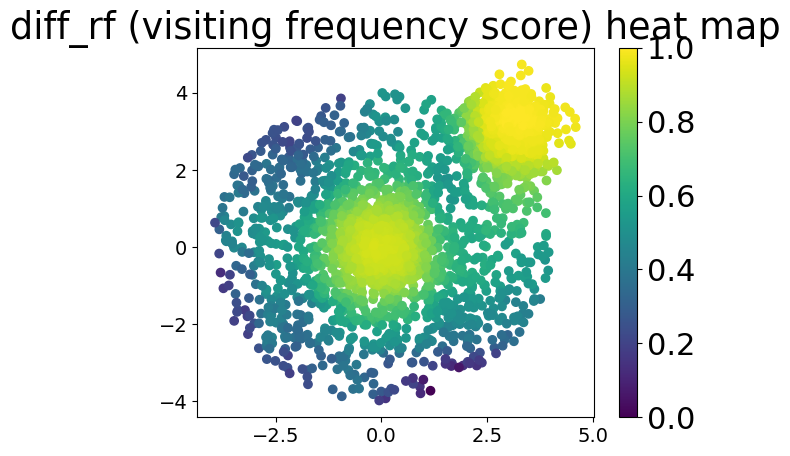

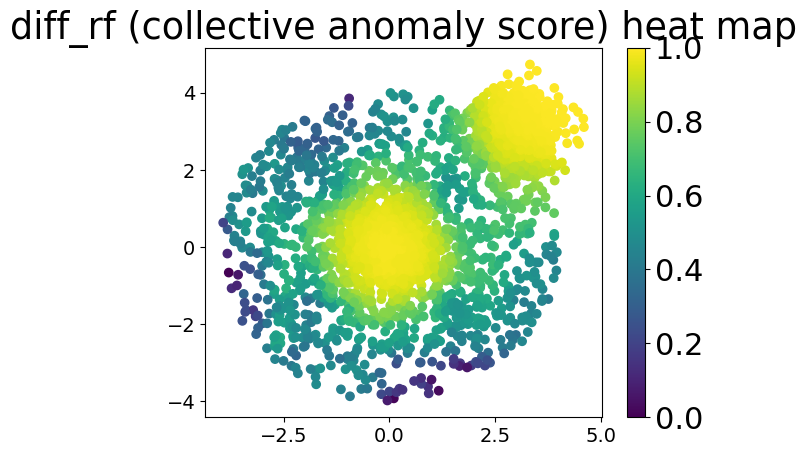

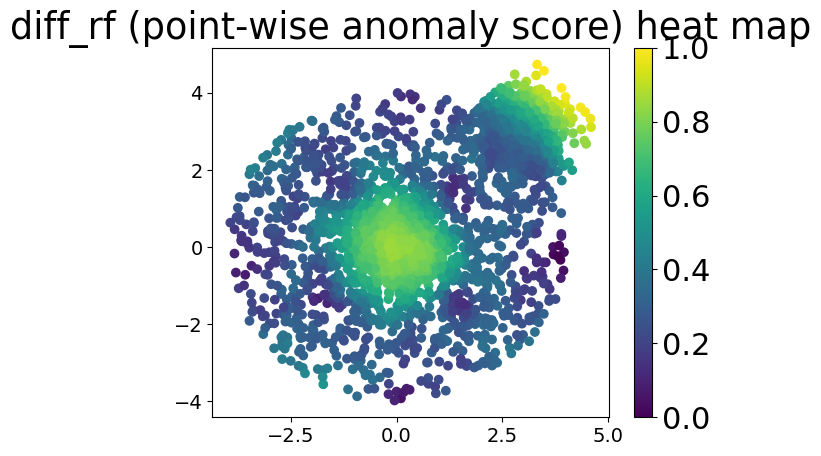

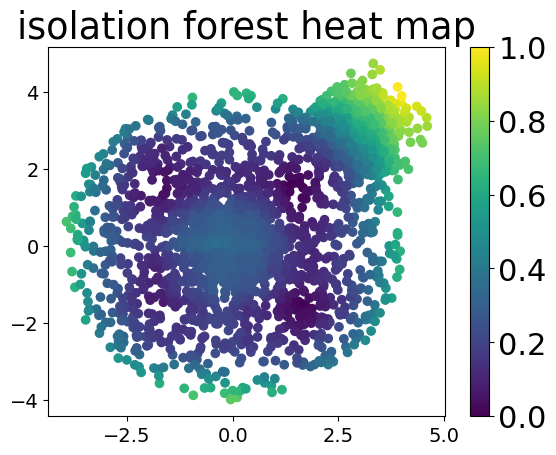

Isolation Forest AUC = 0.7810585
diff_rf (point-wise anomaly score) AUC = 0.9025434999999999
diff_rf (frequency of visit scoring only) AUC = 0.97572
diff_rf (collective anomaly score) AUC = 0.981116
Isolation Forest AP = 0.8648296235558027
diff_rf (point-wise anomaly score) AP = 0.9550889330186603
diff_rf (frequency of visit scoring only) AP = 0.9865747956479705
diff_rf (collective anomaly score) AP = 0.9908732839881338


In [14]:
if not os.path.exists(os.path.join(BASE_DIR, "pkl", PKL_FILENAME)):
        create_donut_data()

test_name = "donut"
n_trees = 256
sample_size_ratio = 0.25
alpha = 1

x_n, x_nt, x_a, x_b, x_ab = load_donut_data()

results_dir = get_results_dir(test_name)

plot_clusters(x_n, x_a, x_b, results_dir)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message="'force_all_finite' was renamed")
_, scores = compute_diff_rf_results(x_n, x_nt, x_ab, n_trees, sample_size_ratio, alpha, results_dir)

y_true = np.array([-1] * len(x_nt) + [1] * len(x_ab))
auc_results = compute_auc_scores(y_true, scores)
for method, auc_val in auc_results.items():
    print(f"{method} AUC = {auc_val}")

ap_results = compute_ap_scores(y_true, scores)
for method, ap_val in ap_results.items():
    print(f"{method} AP = {ap_val}")

## Datasets

### Código Geral de Execução

In [15]:
DATASET_DIRS = os.path.join(BASE_DIR, "data", "data_preprocessed")
PKL_DIR = os.path.join(BASE_DIR, "pkl")
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message="'force_all_finite' was renamed")

In [16]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, average_precision_score
from PIL import Image
import time

def get_results_dir(test_name="dataset"):
    date_str = time.strftime("%Y%m%d_%H%M%S")
    results_parent = os.path.join(BASE_DIR, "results")
    os.makedirs(results_parent, exist_ok=True)

    results_dir = os.path.join(results_parent, f"{test_name}_{date_str}")
    os.makedirs(results_dir, exist_ok=True)

    return results_dir

def get_overall_metrics(y_true, y_pred):
    # Check if y_true or y_pred contain only one class
    unique_true = np.unique(y_true)
    unique_pred = np.unique(y_pred)

    # Default values in case of all zeros or all ones
    auc_val = 0.5
    ap = np.mean(y_true)  # Proportion of positives
    acc = np.mean(y_true == y_pred)  # Accuracy still works
    tpr = 0.0
    fpr = 0.0
    precision = 0.0
    f1 = 0.0

    # Only compute CM-based metrics if both classes are present
    if len(unique_true) > 1 and len(unique_pred) > 1:
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

        # Compute standard metrics with safeguards
        acc = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        f1 = (2 * tpr * precision) / (tpr + precision) if (tpr + precision) > 0 else 0

        # Calculate AUC and AP with try-except to handle warnings
        try:
            fpr_list, tpr_list, _ = roc_curve(y_true, y_pred)
            auc_val = auc(fpr_list, tpr_list)
        except:
            auc_val = 0.5  # Default value when ROC curve can't be computed

        try:
            ap = average_precision_score(y_true, y_pred)
        except:
            ap = np.mean(y_true)  # Default to proportion of positives
    elif len(unique_true) == 1:
        # If all samples are of the same class
        if unique_true[0] == 1:
            # All samples are positive
            acc = np.mean(y_pred == 1)  # Proportion of correctly predicted positives
            tpr = 1.0 if np.any(y_pred == 1) else 0.0
            precision = np.mean(y_true)  # All true samples are positive
        else:
            # All samples are negative
            acc = np.mean(y_pred == 0)  # Proportion of correctly predicted negatives
            fpr = 1.0 if np.any(y_pred == 1) else 0.0

    return {'auc': auc_val, 'ap': ap, 'acc': acc, 'tpr': tpr, 'fpr': fpr, 'precision': precision, 'f1-score': f1}

def plot_confusion_matrix(y_true, y_pred, model_name, results_dir):
    # Check unique values
    unique_true = np.unique(y_true)
    unique_pred = np.unique(y_pred)

    # If we need to handle one-class case, use explicit labels
    all_labels = [0, 1]

    # Create confusion matrix with appropriate handling for edge cases
    try:
        cm = confusion_matrix(y_true, y_pred, labels=all_labels)
    except Exception as e:
        # Create a basic 2x2 matrix with zeros
        cm = np.zeros((2, 2), dtype=int)

        # Fill the appropriate cell based on the true class
        if len(unique_true) == 1:
            true_class = unique_true[0]
            if len(unique_pred) == 1:
                pred_class = unique_pred[0]
                cm[true_class, pred_class] = len(y_true)
            else:
                # Multiple predictions for single class
                for pred_class in unique_pred:
                    cm[true_class, pred_class] = np.sum(y_pred == pred_class)

    # Create labels with counts and percentages
    group_counts = [f'{value:.0f}' for value in cm.ravel()]

    # Calculate percentages safely
    if np.sum(cm) > 0:
        group_percentages = [f'{(value/np.sum(cm))*100:.2f}%' for value in cm.ravel()]
    else:
        group_percentages = ['0.00%' for _ in cm.ravel()]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.array(labels).reshape(cm.shape)

    # Plot and save
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(cm, annot=labels, cmap='Oranges',
                     xticklabels=['Predicted Benign', 'Predicted Malicious'],
                     yticklabels=['Actual Benign', 'Actual Malicious'], fmt='')
    plt.title(f'Confusion Matrix - {model_name}')

    # Save the heatmap
    filepath = os.path.join(results_dir, f"{model_name}_cm.png")
    plt.savefig(filepath, bbox_inches='tight')
    plt.close()

    # Open the .png and show
    img = Image.open(filepath)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    print(f"Confusion matrix saved to {filepath}")


In [17]:
def save_csv_results(results, out_dir):
    csv_file = os.path.join(out_dir, 'results.csv')
    with open(csv_file, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        # Headers
        writer.writerow(['model', 'metric_type', 'auc', 'accuracy', 'true positive rate', 'false positive rate', 'precision', 'f1-score'])

        # For each model
        for model, model_results in results.items():
            # Process the test results (pointwise and collective)
            if 'test_pointwise' in model_results:
                row = [model, 'pointwise']
                metrics = model_results['test_pointwise']
                row.extend([metrics['auc'], metrics['acc'], metrics['tpr'], metrics['fpr'], metrics['precision'], metrics['f1-score']])
                writer.writerow(row)

            if 'test_collective' in model_results:
                row = [model, 'collective']
                metrics = model_results['test_collective']
                row.extend([metrics['auc'], metrics['acc'], metrics['tpr'], metrics['fpr'], metrics['precision'], metrics['f1-score']])
                writer.writerow(row)

In [18]:
def get_best_threshold(y, anomaly_scores):
    fpr, tpr, thresholds = roc_curve(y, anomaly_scores)
    df_val_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds})
    df_val_roc['youden-index'] = df_val_roc['tpr'] - df_val_roc['fpr']
    df_val_roc = df_val_roc.sort_values('youden-index', ascending=False)
    # Remove np.inf, np.-inf and NaN values
    df_val_roc = df_val_roc[~df_val_roc['thresholds'].isin([np.inf, -np.inf, np.nan])]
    best_threshold = df_val_roc.iloc[0]['thresholds']

    return best_threshold

In [19]:
def execute_on_dataset(dataset_name,
                      x_train, x_test,
                      y_test,
                      recalculate_hyperparameters=False,
                      default_hyperparameters={"sample_size": 256, "n_trees": 128, "alpha": 1}):
    # Print information about the dataset
    print(f"\n{'='*50}")
    print(f"Dataset: {dataset_name}")
    print(f"{'='*50}")

    # Convert y_test to numpy array to avoid formatting issues
    if isinstance(y_test, pd.Series) or isinstance(y_test, pd.DataFrame):
        y_test_array = y_test.to_numpy().ravel()  # Ensure 1D array
    else:
        y_test_array = np.asarray(y_test).ravel()

    MAX_TEST_SIZE = 100000
    if len(x_test) > MAX_TEST_SIZE:
        # Get indices of positive and negative samples
        positive_indices = np.where(y_test_array == 1)[0]
        negative_indices = np.where(y_test_array == 0)[0]
        
        # Calculate the number of positives and negatives to include
        num_positives = min(int(MAX_TEST_SIZE * 0.2), len(positive_indices))
        num_negatives = min(MAX_TEST_SIZE - num_positives, len(negative_indices))
        
        # If we don't have enough negatives to reach the 80/20 ratio, adjust positive count
        if num_negatives < int(MAX_TEST_SIZE * 0.8) and len(positive_indices) > num_positives:
            num_positives = MAX_TEST_SIZE - num_negatives
        
        # Sample the required number of positives and negatives
        sampled_positive_indices = np.random.choice(positive_indices, num_positives, replace=False)
        sampled_negative_indices = np.random.choice(negative_indices, num_negatives, replace=False)
        
        # Combine and shuffle the selected indices
        test_indices = np.concatenate((sampled_positive_indices, sampled_negative_indices))
        np.random.shuffle(test_indices)  # Shuffle to avoid having all positives followed by all negatives
        
        # Select the data using the indices
        y_test_array = y_test_array[test_indices]
        x_test = x_test.iloc[test_indices]
        x_test.reset_index(drop=True, inplace=True)
            
    # Print test set information
    positive_count = int(np.sum(y_test_array))  # Force to int
    total_count = len(y_test_array)
    negative_count = total_count - positive_count

    print(f"Test set information:")
    print(f"  Total instances: {total_count}")
    print(f"  Positive instances (anomalies): {positive_count} ({(positive_count/total_count)*100:.2f}%)")
    print(f"  Negative instances (normal): {negative_count} ({(negative_count/total_count)*100:.2f}%)")

    # Print feature information
    print(f"Feature information:")
    print(f"  Number of features: {x_test.shape[1]}")

    # Handle feature names more safely
    if hasattr(x_test, 'columns'):
        feature_names = list(x_test.columns)
        if len(feature_names) > 5:
            feature_names_display = ", ".join(feature_names[:5]) + "..."
        else:
            feature_names_display = ", ".join(feature_names)
        print(f"  Feature names: {feature_names_display}")

    # Sample training data with a maximum size cap
    MAX_TRAIN_SIZE = 30000

    if len(x_train) > MAX_TRAIN_SIZE:
        train_size = MAX_TRAIN_SIZE
        train_indices = np.random.choice(len(x_train), train_size, replace=False)
        x_train_sample = x_train.iloc[train_indices]
        x_train_sample.reset_index(drop=True, inplace=True)
        train_percentage = (train_size / len(x_train)) * 100
        default_hyperparameters["sample_size"] *= train_size / len(x_train)
        default_hyperparameters["sample_size"] = int(default_hyperparameters["sample_size"])
    else:
        # Use all training data if less than max size
        x_train_sample = x_train.copy()
        train_percentage = 100.0

    print(f"Training set information:")
    print(f"  Original size: {len(x_train)} instances")
    print(f"  Used size: {len(x_train_sample)} instances ({train_percentage:.1f}% of original)")

    # Load or set hyperparameters
    hyperparameters = {}

    if recalculate_hyperparameters:
        print("Recalculating hyperparameters...")
        hyperparameters = calculateHyperparameters(x_train_sample)
        with open(os.path.join(PKL_DIR, f"{dataset_name}_hyp.pkl"), "wb") as f:
            pickle.dump(hyperparameters, f)
    else:
        hyperparameters_file = os.path.join(PKL_DIR, f"{dataset_name}_hyp.pkl")
        if os.path.exists(hyperparameters_file):
            with open(hyperparameters_file, "rb") as f:
                hyperparameters = pickle.load(f)
        else:
            print(f"Hyperparameters file not found for {dataset_name}. Using default parameters.")
            hyperparameters = default_hyperparameters

    print(f"Hyperparameters: {hyperparameters}")

    # Create and train the model
    print("\nTraining DiFF-RF model...")
    model = DiFF_RF_Plus(n_trees=hyperparameters["n_trees"],
                             sample_size=hyperparameters["sample_size"])

    model.fit(np.array(x_train_sample), n_jobs=16, optimize_clusters=True)
    
    # Get predictions
    print("Evaluating model on test data...")
    scores = model.anomaly_score(np.array(x_test), alpha=hyperparameters["alpha"])

    y_pred_pointwise = scores["pointwise"]
    y_pred_collective = scores["collective"]

    # Find optimal thresholds using ROC curve analysis
    from sklearn.metrics import roc_curve

    fpr_pointwise, tpr_pointwise, thresholds_pointwise = roc_curve(y_test_array, y_pred_pointwise)
    optimal_idx_pointwise = np.argmax(tpr_pointwise - fpr_pointwise)
    threshold_pointwise = thresholds_pointwise[optimal_idx_pointwise]

    fpr_collective, tpr_collective, thresholds_collective = roc_curve(y_test_array, y_pred_collective)
    optimal_idx_collective = np.argmax(tpr_collective - fpr_collective)
    threshold_collective = thresholds_collective[optimal_idx_collective]

    print(f"Optimal thresholds - Pointwise: {threshold_pointwise:.6f}, Collective: {threshold_collective:.6f}")

    # Create binary predictions
    y_pred_pointwise_binary = (y_pred_pointwise > threshold_pointwise).astype(int)
    y_pred_collective_binary = (y_pred_collective > threshold_collective).astype(int)

    # Calculate and display metrics
    metrics_pointwise = get_overall_metrics(y_test_array, y_pred_pointwise_binary)
    metrics_collective = get_overall_metrics(y_test_array, y_pred_collective_binary)

    print("\nTest Set Results:")
    print(f"Pointwise detection metrics:")
    for metric_name, metric_value in metrics_pointwise.items():
        print(f"  {metric_name}: {metric_value:.4f}")

    print(f"\nCollective detection metrics:")
    for metric_name, metric_value in metrics_collective.items():
        print(f"  {metric_name}: {metric_value:.4f}")

    # Create results directory and save
    results_dir = get_results_dir(dataset_name)

    # Plot confusion matrices
    plot_confusion_matrix(y_test_array, y_pred_pointwise_binary, "DiFF-RF_pointwise", results_dir)
    plot_confusion_matrix(y_test_array, y_pred_collective_binary, "DiFF-RF_collective", results_dir)

    # Save detailed results to CSV
    results = {
        "DiFF-RF": {
            "threshold_pointwise": float(threshold_pointwise),  # Convert to Python native type for JSON serialization
            "threshold_collective": float(threshold_collective),
            "test_pointwise": metrics_pointwise,
            "test_collective": metrics_collective,
        }
    }
    save_csv_results(results, results_dir)

    # Optionally, create and save ROC curves
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 8))

    # Pointwise ROC curve
    fpr, tpr, _ = roc_curve(y_test_array, y_pred_pointwise)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Pointwise ROC curve (AUC = {roc_auc:.3f})')

    # Collective ROC curve
    fpr, tpr, _ = roc_curve(y_test_array, y_pred_collective)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Collective ROC curve (AUC = {roc_auc:.3f})')

    # Plot settings
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves - {dataset_name}')
    plt.legend(loc="lower right")

    # Save the figure
    plt.savefig(os.path.join(results_dir, 'roc_curves.png'))
    plt.close()

    print(f"\nResults saved to: {results_dir}")

    return results

### UCI

#### BNA

In [20]:
# Load the dataset
dataset_name = "BNA"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))


Dataset: BNA
Test set information:
  Total instances: 763
  Positive instances (anomalies): 610 (79.95%)
  Negative instances (normal): 153 (20.05%)
Feature information:
  Number of features: 4
  Feature names: variance, skewness, curtosis, entropy
Training set information:
  Original size: 609 instances
  Used size: 609 instances (100.0% of original)
Hyperparameters file not found for BNA. Using default parameters.
Hyperparameters: {'sample_size': 152, 'n_trees': 128, 'alpha': 1}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.470195, Collective: -0.500710

Test Set Results:
Pointwise detection metrics:
  auc: 0.9526
  ap: 0.9780
  acc: 0.9633
  tpr: 0.9705
  fpr: 0.0654
  precision: 0.9834
  f1-score: 0.9769

Collective detection metrics:
  auc: 0.9984
  ap: 0.9993
  acc: 0.9974
  tpr: 0.9967
  fpr: 0.0000
  precision: 1.0000
  f1-score: 0.9984
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/BNA_20250329_174823/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/BNA_20250329_174823/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/BNA_20250329_174823


{'DiFF-RF': {'threshold_pointwise': -0.47019457908583806,
  'threshold_collective': -0.5007098583791694,
  'test_pointwise': {'auc': np.float64(0.9525661630772527),
   'ap': np.float64(0.9779617647896494),
   'acc': np.float64(0.963302752293578),
   'tpr': np.float64(0.9704918032786886),
   'fpr': np.float64(0.06535947712418301),
   'precision': np.float64(0.9833887043189369),
   'f1-score': np.float64(0.9768976897689768)},
  'test_collective': {'auc': np.float64(0.9983606557377049),
   'ap': np.float64(0.99934254345444),
   'acc': np.float64(0.9973787680209698),
   'tpr': np.float64(0.9967213114754099),
   'fpr': np.float64(0.0),
   'precision': np.float64(1.0),
   'f1-score': np.float64(0.9983579638752053)}}}

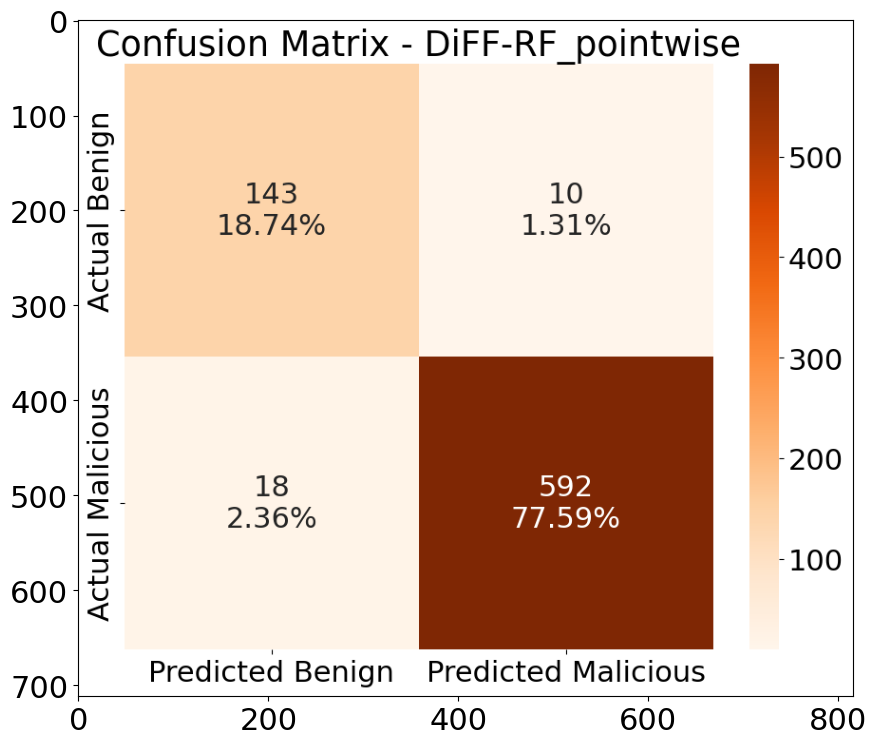

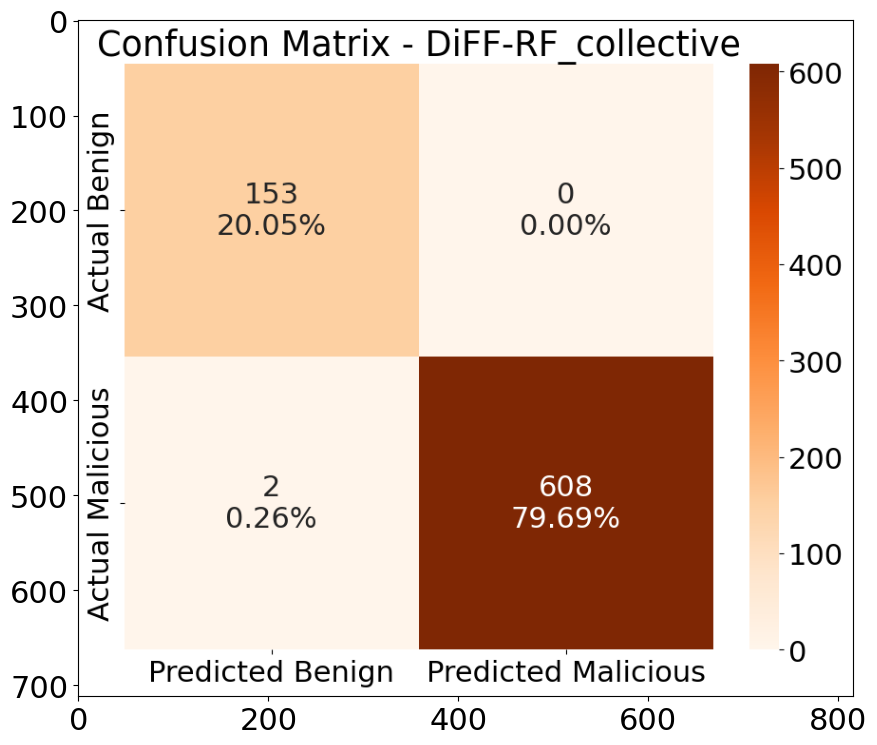

In [21]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test, default_hyperparameters= {"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 1 })

#### CTG

In [22]:
# Load the dataset
dataset_name = "CTG"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))


Dataset: CTG
Test set information:
  Total instances: 802
  Positive instances (anomalies): 471 (58.73%)
  Negative instances (normal): 331 (41.27%)
Feature information:
  Number of features: 21
  Feature names: LB, AC, FM, UC, DL...
Training set information:
  Original size: 1324 instances
  Used size: 1324 instances (100.0% of original)
Hyperparameters file not found for CTG. Using default parameters.
Hyperparameters: {'sample_size': 331, 'n_trees': 128, 'alpha': 2}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.167835, Collective: -0.175109

Test Set Results:
Pointwise detection metrics:
  auc: 0.7111
  ap: 0.7254
  acc: 0.7045
  tpr: 0.6730
  fpr: 0.2508
  precision: 0.7925
  f1-score: 0.7279

Collective detection metrics:
  auc: 0.8788
  ap: 0.8673
  acc: 0.8840
  tpr: 0.9087
  fpr: 0.1511
  precision: 0.8954
  f1-score: 0.9020
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/CTG_20250329_174824/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/CTG_20250329_174824/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/CTG_20250329_174824


{'DiFF-RF': {'threshold_pointwise': -0.16783507395613517,
  'threshold_collective': -0.175108767604358,
  'test_pointwise': {'auc': np.float64(0.7111404032045978),
   'ap': np.float64(0.7254010541586585),
   'acc': np.float64(0.7044887780548629),
   'tpr': np.float64(0.673036093418259),
   'fpr': np.float64(0.25075528700906347),
   'precision': np.float64(0.7925),
   'f1-score': np.float64(0.7278989667049367)},
  'test_collective': {'auc': np.float64(0.8788237407072438),
   'ap': np.float64(0.867268031273875),
   'acc': np.float64(0.8840399002493765),
   'tpr': np.float64(0.9087048832271762),
   'fpr': np.float64(0.1510574018126888),
   'precision': np.float64(0.895397489539749),
   'f1-score': np.float64(0.9020021074815595)}}}

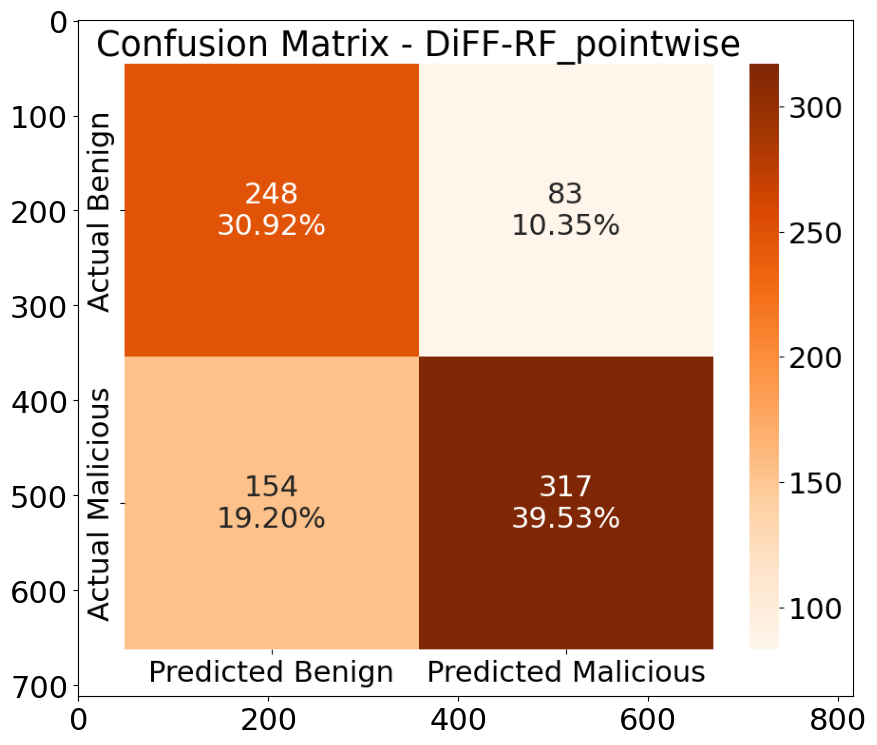

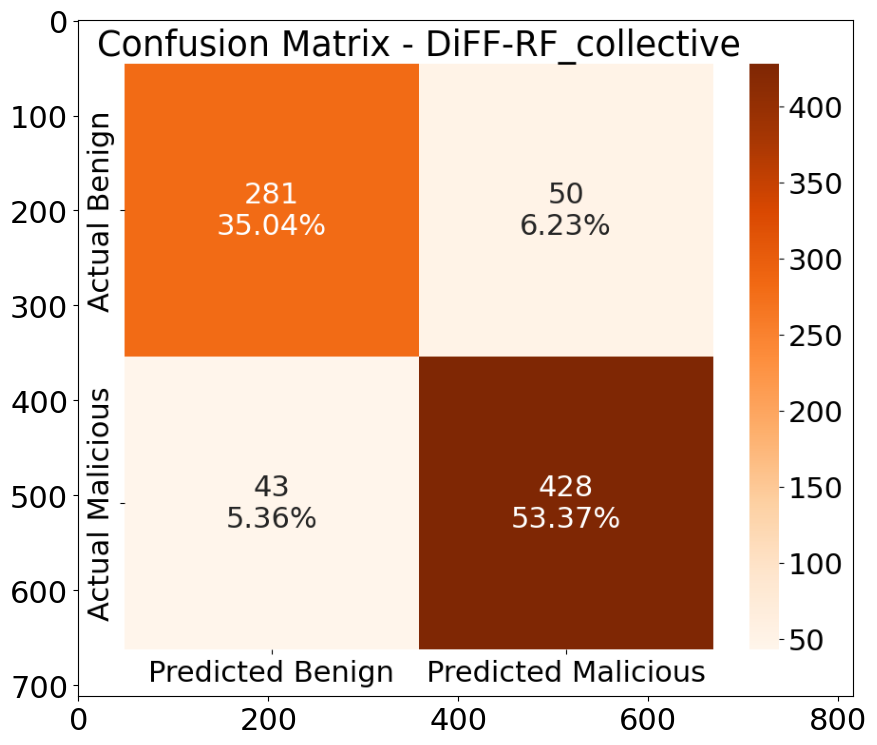

In [23]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test, default_hyperparameters= {"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 2 })

#### DCCC

In [24]:
# Load the dataset
dataset_name = "DCCC"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))


Dataset: DCCC
Test set information:
  Total instances: 11309
  Positive instances (anomalies): 6636 (58.68%)
  Negative instances (normal): 4673 (41.32%)
Feature information:
  Number of features: 23
  Feature names: X1, X2, X3, X4, X5...
Training set information:
  Original size: 18691 instances
  Used size: 18691 instances (100.0% of original)
Hyperparameters file not found for DCCC. Using default parameters.
Hyperparameters: {'sample_size': 4672, 'n_trees': 128, 'alpha': 0.0001}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.953314, Collective: -0.806921

Test Set Results:
Pointwise detection metrics:
  auc: 0.6244
  ap: 0.6569
  acc: 0.6434
  tpr: 0.7337
  fpr: 0.4849
  precision: 0.6824
  f1-score: 0.7071

Collective detection metrics:
  auc: 0.6576
  ap: 0.6820
  acc: 0.6583
  tpr: 0.6615
  fpr: 0.3462
  precision: 0.7307
  f1-score: 0.6944
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/DCCC_20250329_174833/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/DCCC_20250329_174833/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/DCCC_20250329_174833


{'DiFF-RF': {'threshold_pointwise': -0.9533135258007616,
  'threshold_collective': -0.8069213631356609,
  'test_pointwise': {'auc': np.float64(0.6244059018585859),
   'ap': np.float64(0.6569490846962689),
   'acc': np.float64(0.6433813776638075),
   'tpr': np.float64(0.7337251356238698),
   'fpr': np.float64(0.48491333190669805),
   'precision': np.float64(0.6824106517168885),
   'f1-score': np.float64(0.7071381889477887)},
  'test_collective': {'auc': np.float64(0.6576493578141884),
   'ap': np.float64(0.6819874035196987),
   'acc': np.float64(0.6583252276947564),
   'tpr': np.float64(0.661543098251959),
   'fpr': np.float64(0.34624438262358226),
   'precision': np.float64(0.7306924101198402),
   'f1-score': np.float64(0.6944005061689339)}}}

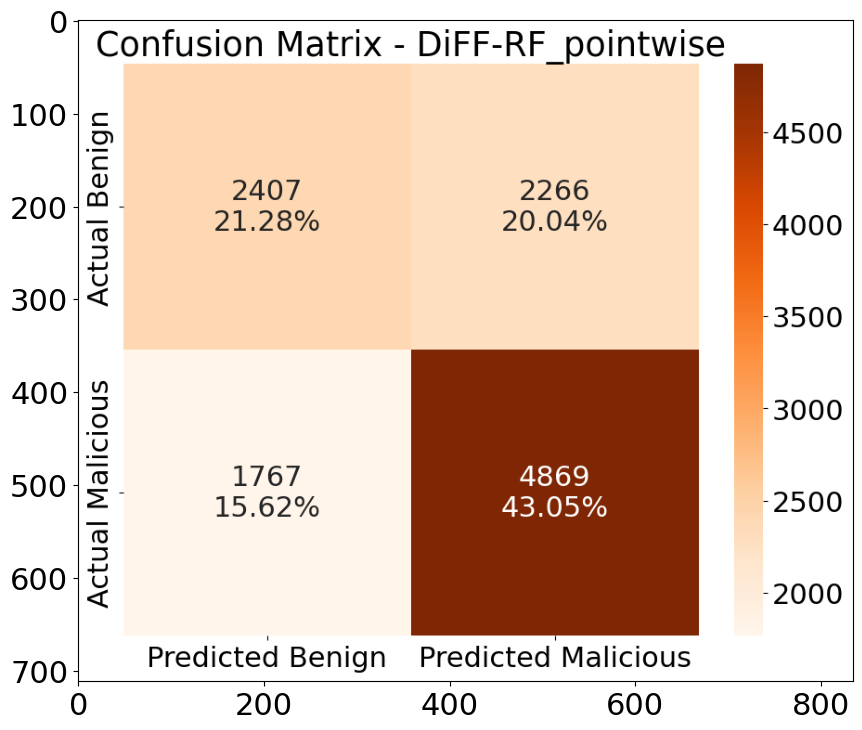

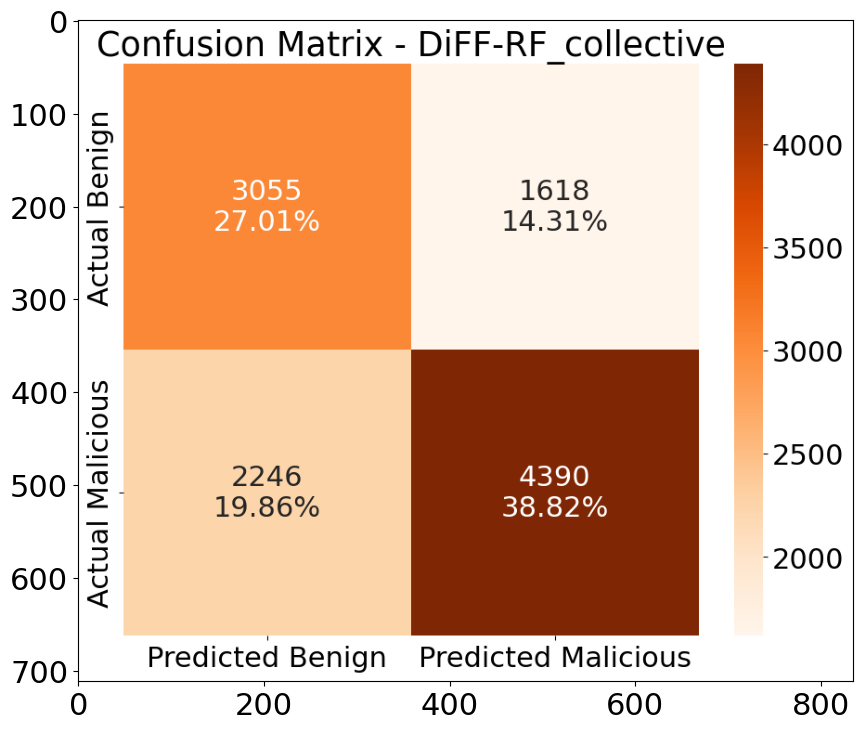

In [25]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test, default_hyperparameters= {"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 0.0001 })

#### HTRU2

In [26]:
# Load the dataset
dataset_name = "HTRU2"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))


Dataset: HTRU2
Test set information:
  Total instances: 4891
  Positive instances (anomalies): 1639 (33.51%)
  Negative instances (normal): 3252 (66.49%)
Feature information:
  Number of features: 8
  Feature names: Profile_mean, Profile_stdev, Profile_skewness, Profile_kurtosis, DM_mean...
Training set information:
  Original size: 13007 instances
  Used size: 13007 instances (100.0% of original)
Hyperparameters file not found for HTRU2. Using default parameters.
Hyperparameters: {'sample_size': 3251, 'n_trees': 128, 'alpha': 0.1}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.797959, Collective: -0.756976

Test Set Results:
Pointwise detection metrics:
  auc: 0.8302
  ap: 0.6354
  acc: 0.8201
  tpr: 0.8609
  fpr: 0.2005
  precision: 0.6840
  f1-score: 0.7623

Collective detection metrics:
  auc: 0.9403
  ap: 0.8875
  acc: 0.9509
  tpr: 0.9079
  fpr: 0.0274
  precision: 0.9436
  f1-score: 0.9254
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/HTRU2_20250329_174836/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/HTRU2_20250329_174836/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/HTRU2_20250329_174836


{'DiFF-RF': {'threshold_pointwise': -0.7979591178831476,
  'threshold_collective': -0.7569761149636749,
  'test_pointwise': {'auc': np.float64(0.8301993910726173),
   'ap': np.float64(0.6354271406120933),
   'acc': np.float64(0.820077693723165),
   'tpr': np.float64(0.8608907870652837),
   'fpr': np.float64(0.2004920049200492),
   'precision': np.float64(0.6839554047503635),
   'f1-score': np.float64(0.7622906537007024)},
  'test_collective': {'auc': np.float64(0.9402514395796795),
   'ap': np.float64(0.8875068503759949),
   'acc': np.float64(0.9509302801063177),
   'tpr': np.float64(0.9078706528370958),
   'fpr': np.float64(0.027367773677736778),
   'precision': np.float64(0.9435637285986049),
   'f1-score': np.float64(0.9253731343283583)}}}

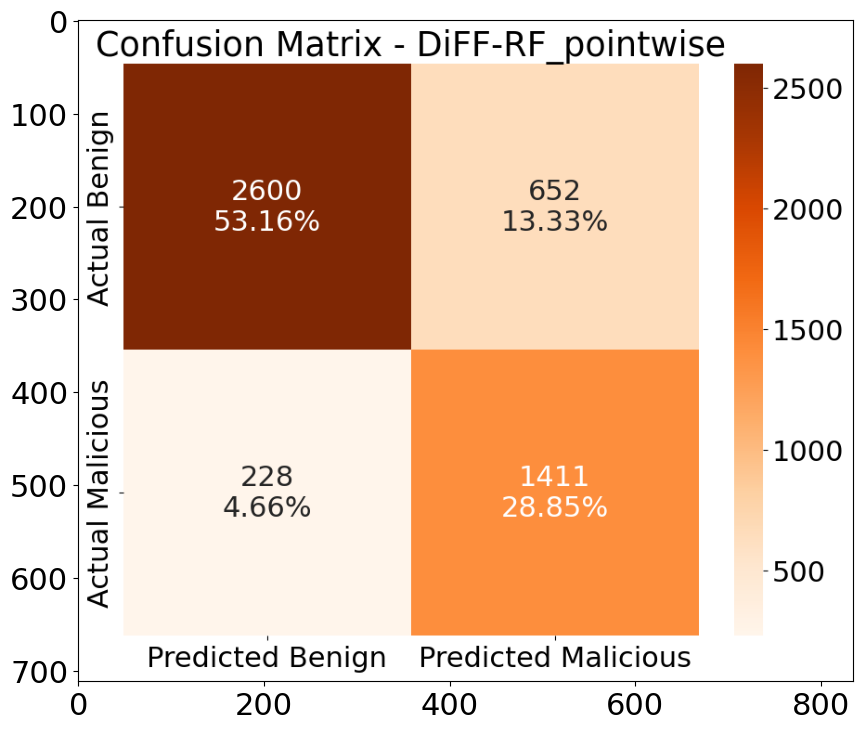

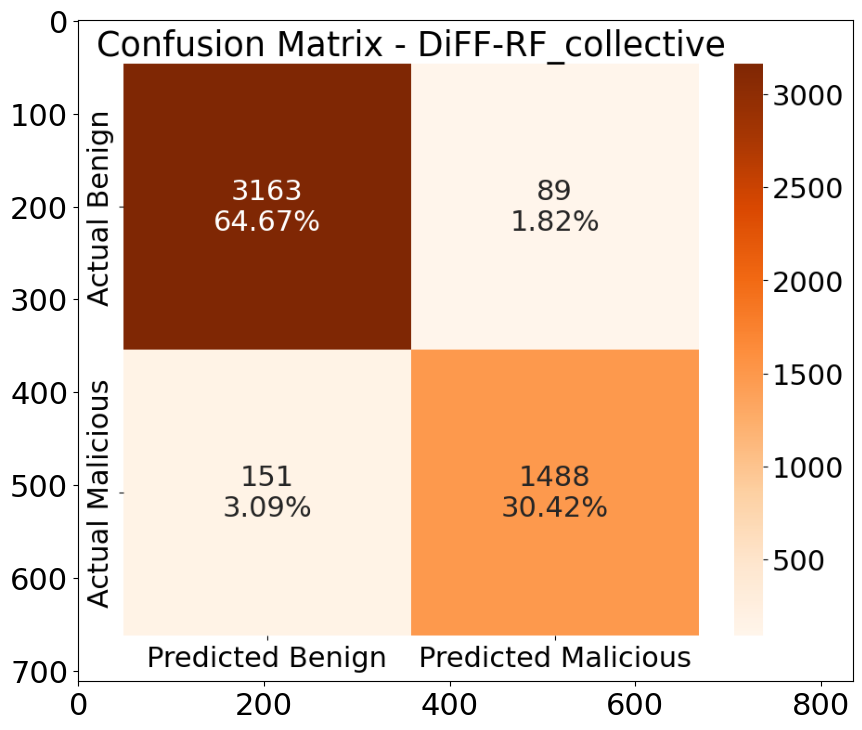

In [27]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test, default_hyperparameters= {"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 0.1 })

#### MAGIC

In [28]:
# Load the dataset
dataset_name = "MAGIC"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))


Dataset: MAGIC
Test set information:
  Total instances: 9155
  Positive instances (anomalies): 6688 (73.05%)
  Negative instances (normal): 2467 (26.95%)
Feature information:
  Number of features: 10
  Feature names: fLength, fWidth, fSize, fConc, fConc1...
Training set information:
  Original size: 9865 instances
  Used size: 9865 instances (100.0% of original)
Hyperparameters file not found for MAGIC. Using default parameters.
Hyperparameters: {'sample_size': 2466, 'n_trees': 128, 'alpha': 1}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.310845, Collective: -0.342677

Test Set Results:
Pointwise detection metrics:
  auc: 0.7761
  ap: 0.8648
  acc: 0.7780
  tpr: 0.7804
  fpr: 0.2282
  precision: 0.9026
  f1-score: 0.8370

Collective detection metrics:
  auc: 0.8138
  ap: 0.8876
  acc: 0.8043
  tpr: 0.7931
  fpr: 0.1654
  precision: 0.9286
  f1-score: 0.8555
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/MAGIC_20250329_174839/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/MAGIC_20250329_174839/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/MAGIC_20250329_174839


{'DiFF-RF': {'threshold_pointwise': -0.31084492486739584,
  'threshold_collective': -0.3426773695378164,
  'test_pointwise': {'auc': np.float64(0.7760702335420856),
   'ap': np.float64(0.8648277786341992),
   'acc': np.float64(0.7780447842708902),
   'tpr': np.float64(0.7803528708133971),
   'fpr': np.float64(0.22821240372922577),
   'precision': np.float64(0.9026288481494292),
   'f1-score': np.float64(0.8370489174017641)},
  'test_collective': {'auc': np.float64(0.8138395723066002),
   'ap': np.float64(0.887589122625341),
   'acc': np.float64(0.8042599672310213),
   'tpr': np.float64(0.7930622009569378),
   'fpr': np.float64(0.16538305634373734),
   'precision': np.float64(0.9285714285714286),
   'f1-score': np.float64(0.8554838709677418)}}}

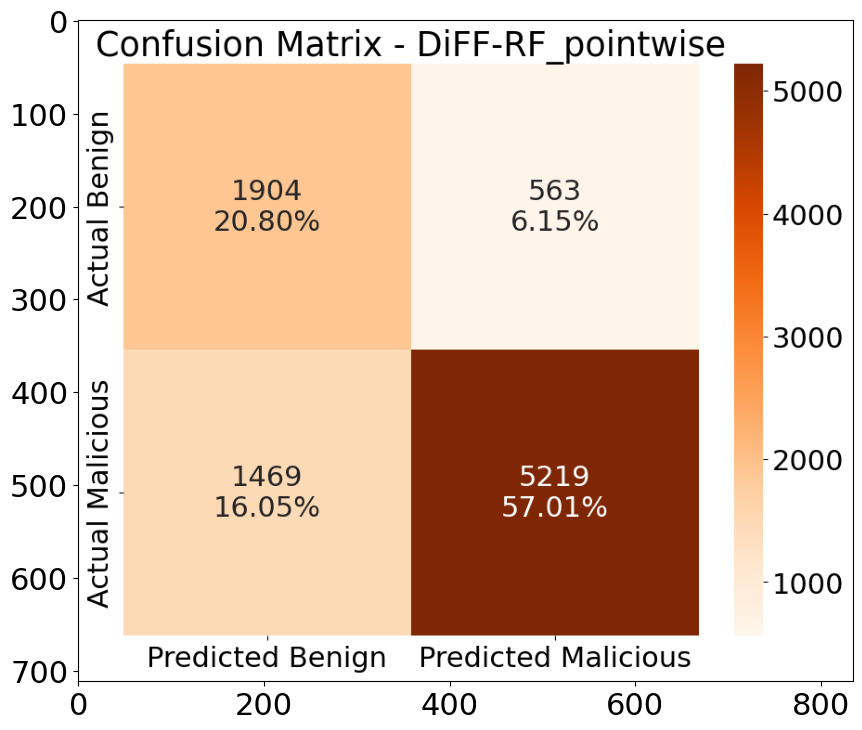

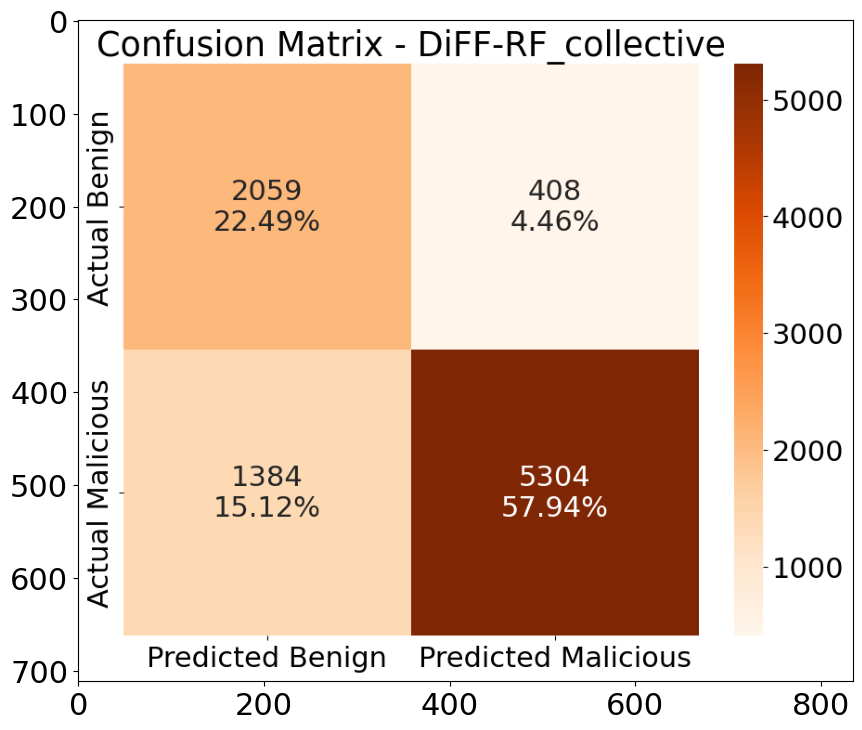

In [29]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test, default_hyperparameters= {"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 1 })

#### MUSK

In [30]:
# Load the dataset
dataset_name = "MUSK"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))


Dataset: MUSK
Test set information:
  Total instances: 2134
  Positive instances (anomalies): 1017 (47.66%)
  Negative instances (normal): 1117 (52.34%)
Feature information:
  Number of features: 166
  Feature names: f1, f2, f3, f4, f5...
Training set information:
  Original size: 4464 instances
  Used size: 4464 instances (100.0% of original)
Hyperparameters file not found for MUSK. Using default parameters.
Hyperparameters: {'sample_size': 1116, 'n_trees': 128, 'alpha': 0.5}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.436642, Collective: -0.472383

Test Set Results:
Pointwise detection metrics:
  auc: 0.7796
  ap: 0.7347
  acc: 0.7863
  tpr: 0.6372
  fpr: 0.0779
  precision: 0.8816
  f1-score: 0.7397

Collective detection metrics:
  auc: 0.8205
  ap: 0.7761
  acc: 0.8252
  tpr: 0.7198
  fpr: 0.0788
  precision: 0.8927
  f1-score: 0.7970
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/MUSK_20250329_174849/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/MUSK_20250329_174849/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/MUSK_20250329_174849


{'DiFF-RF': {'threshold_pointwise': -0.4366417438169789,
  'threshold_collective': -0.47238310230156255,
  'test_pointwise': {'auc': np.float64(0.7796404718707663),
   'ap': np.float64(0.7346629532704839),
   'acc': np.float64(0.7863167760074976),
   'tpr': np.float64(0.6371681415929203),
   'fpr': np.float64(0.07788719785138765),
   'precision': np.float64(0.8816326530612245),
   'f1-score': np.float64(0.7397260273972603)},
  'test_collective': {'auc': np.float64(0.8204907794001526),
   'ap': np.float64(0.7760730596747873),
   'acc': np.float64(0.8252108716026242),
   'tpr': np.float64(0.7197640117994101),
   'fpr': np.float64(0.07878245299910475),
   'precision': np.float64(0.8926829268292683),
   'f1-score': np.float64(0.7969515514425694)}}}

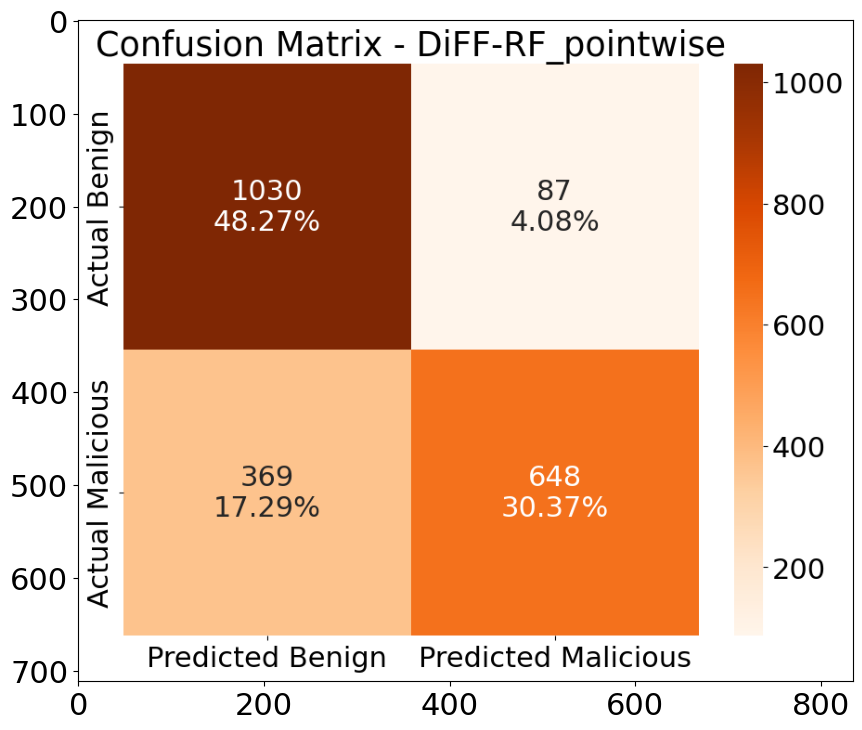

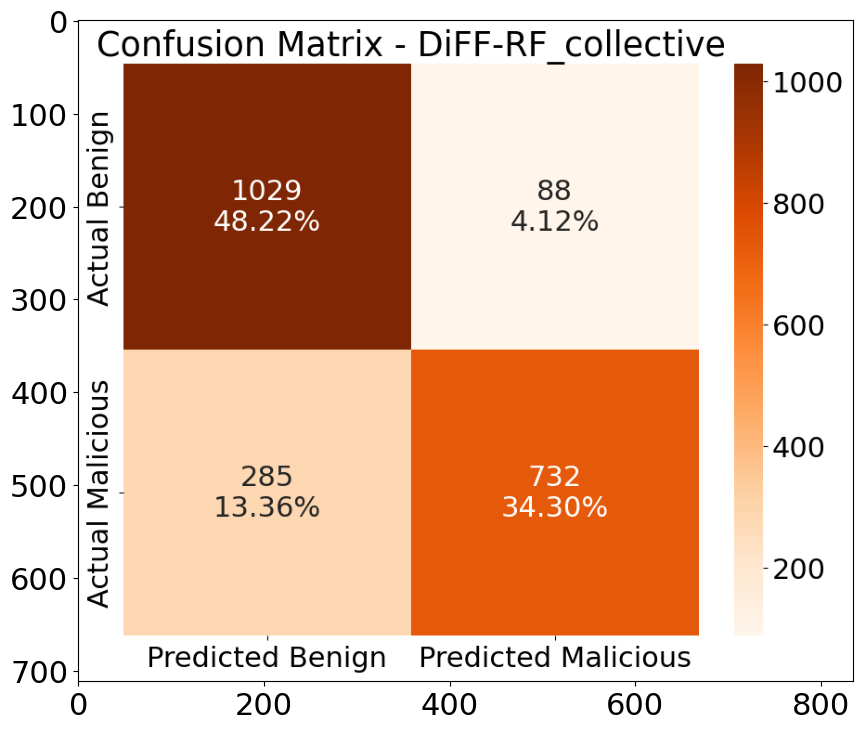

In [31]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test, default_hyperparameters= {"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 0.5 })

#### Occupancy

In [32]:
# Load the dataset
dataset_name = "Occupancy"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))


Dataset: Occupancy
Test set information:
  Total instances: 7912
  Positive instances (anomalies): 4750 (60.04%)
  Negative instances (normal): 3162 (39.96%)
Feature information:
  Number of features: 5
  Feature names: Temperature, Humidity, Light, CO2, HumidityRatio
Training set information:
  Original size: 12648 instances
  Used size: 12648 instances (100.0% of original)
Hyperparameters file not found for Occupancy. Using default parameters.
Hyperparameters: {'sample_size': 3162, 'n_trees': 128, 'alpha': 0.01}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.984249, Collective: -0.730627

Test Set Results:
Pointwise detection metrics:
  auc: 0.6646
  ap: 0.6936
  acc: 0.7039
  tpr: 0.8604
  fpr: 0.5313
  precision: 0.7087
  f1-score: 0.7772

Collective detection metrics:
  auc: 0.9932
  ap: 0.9919
  acc: 0.9938
  tpr: 0.9964
  fpr: 0.0101
  precision: 0.9933
  f1-score: 0.9949
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Occupancy_20250329_174852/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Occupancy_20250329_174852/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Occupancy_20250329_174852


{'DiFF-RF': {'threshold_pointwise': -0.984249087224759,
  'threshold_collective': -0.7306273383896249,
  'test_pointwise': {'auc': np.float64(0.6645558773594328),
   'ap': np.float64(0.6935662879224977),
   'acc': np.float64(0.7038675429726997),
   'tpr': np.float64(0.860421052631579),
   'fpr': np.float64(0.5313092979127134),
   'precision': np.float64(0.70868735911219),
   'f1-score': np.float64(0.777217837786441)},
  'test_collective': {'auc': np.float64(0.9931504377642398),
   'ap': np.float64(0.9918780876826849),
   'acc': np.float64(0.9938068756319515),
   'tpr': np.float64(0.996421052631579),
   'fpr': np.float64(0.010120177103099304),
   'precision': np.float64(0.9932843651626443),
   'f1-score': np.float64(0.9948502364687336)}}}

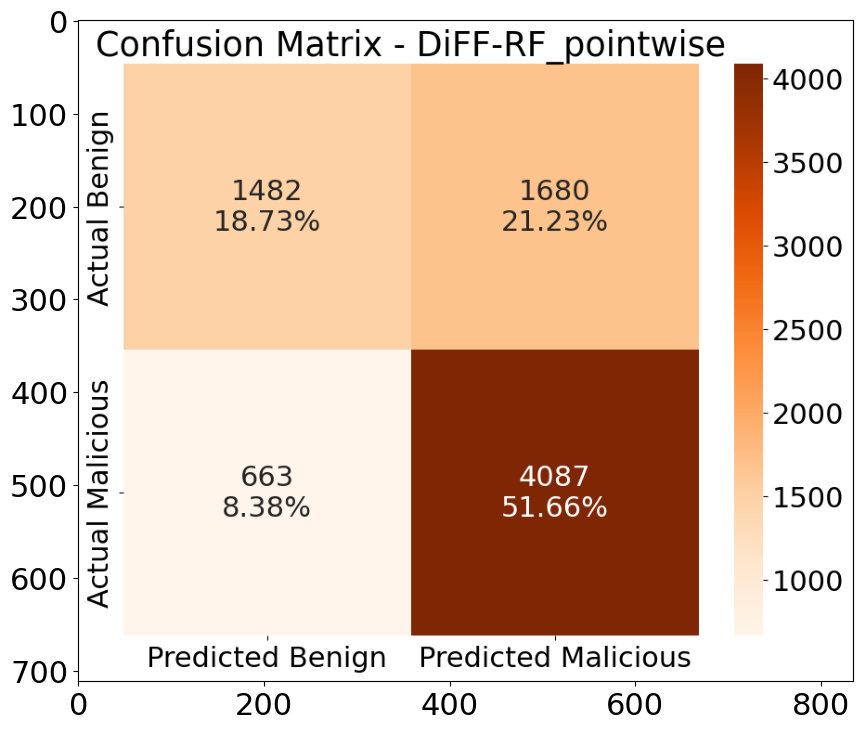

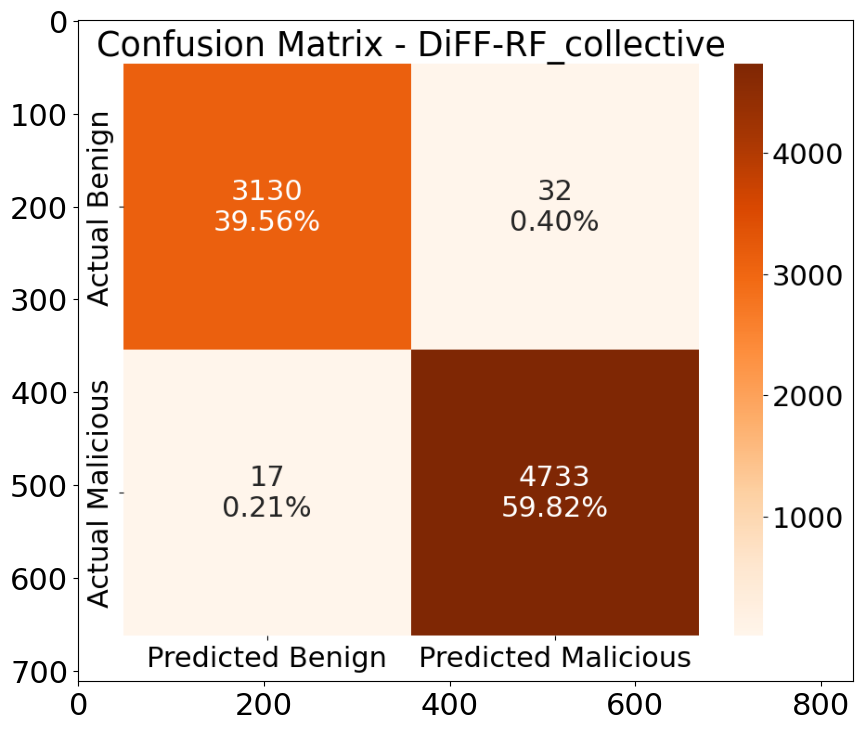

In [33]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test, default_hyperparameters= {"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 0.01 })

#### SPAM

In [34]:
# Load the dataset
dataset_name = "SPAM"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))


Dataset: SPAM
Test set information:
  Total instances: 2371
  Positive instances (anomalies): 1813 (76.47%)
  Negative instances (normal): 558 (23.53%)
Feature information:
  Number of features: 57
  Feature names: word_freq_make, word_freq_address, word_freq_all, word_freq_3d, word_freq_our...
Training set information:
  Original size: 2230 instances
  Used size: 2230 instances (100.0% of original)
Hyperparameters file not found for SPAM. Using default parameters.
Hyperparameters: {'sample_size': 557, 'n_trees': 128, 'alpha': 0.01}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.319858, Collective: -0.215504

Test Set Results:
Pointwise detection metrics:
  auc: 0.6441
  ap: 0.8236
  acc: 0.6027
  tpr: 0.5659
  fpr: 0.2778
  precision: 0.8688
  f1-score: 0.6854

Collective detection metrics:
  auc: 0.8563
  ap: 0.9285
  acc: 0.8115
  tpr: 0.7716
  fpr: 0.0591
  precision: 0.9770
  f1-score: 0.8622
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/SPAM_20250329_174854/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/SPAM_20250329_174854/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/SPAM_20250329_174854


{'DiFF-RF': {'threshold_pointwise': -0.31985846879285107,
  'threshold_collective': -0.21550388354558764,
  'test_pointwise': {'auc': np.float64(0.6440675369246798),
   'ap': np.float64(0.8235672415021009),
   'acc': np.float64(0.6026992830029524),
   'tpr': np.float64(0.5659128516271373),
   'fpr': np.float64(0.2777777777777778),
   'precision': np.float64(0.8687552921253175),
   'f1-score': np.float64(0.685370741482966)},
  'test_collective': {'auc': np.float64(0.8562547076371961),
   'ap': np.float64(0.9284766507539403),
   'acc': np.float64(0.8114719527625475),
   'tpr': np.float64(0.7716492002206288),
   'fpr': np.float64(0.05913978494623656),
   'precision': np.float64(0.9769553072625698),
   'f1-score': np.float64(0.8622496147919877)}}}

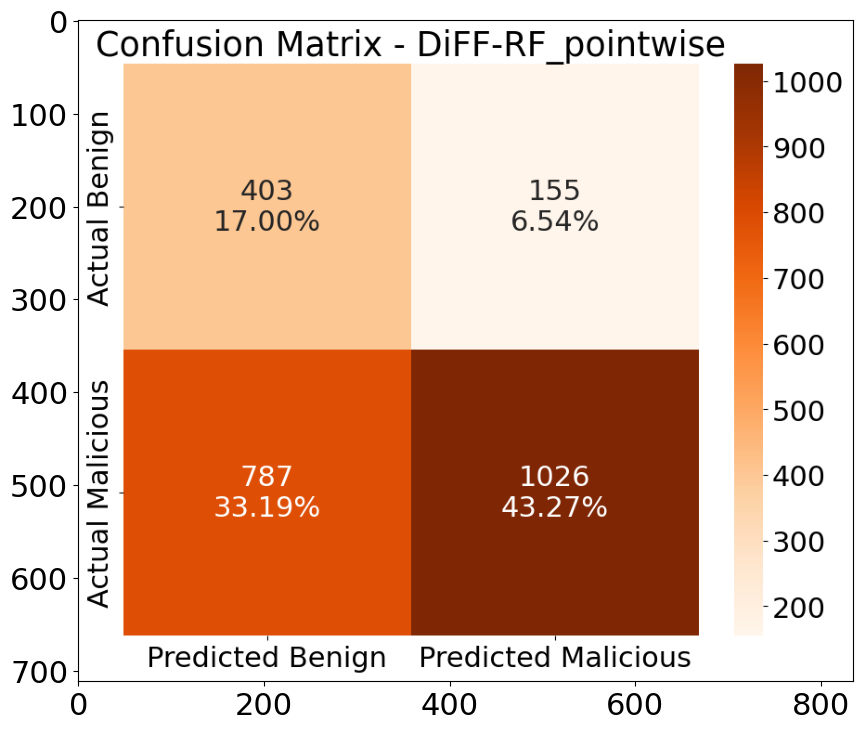

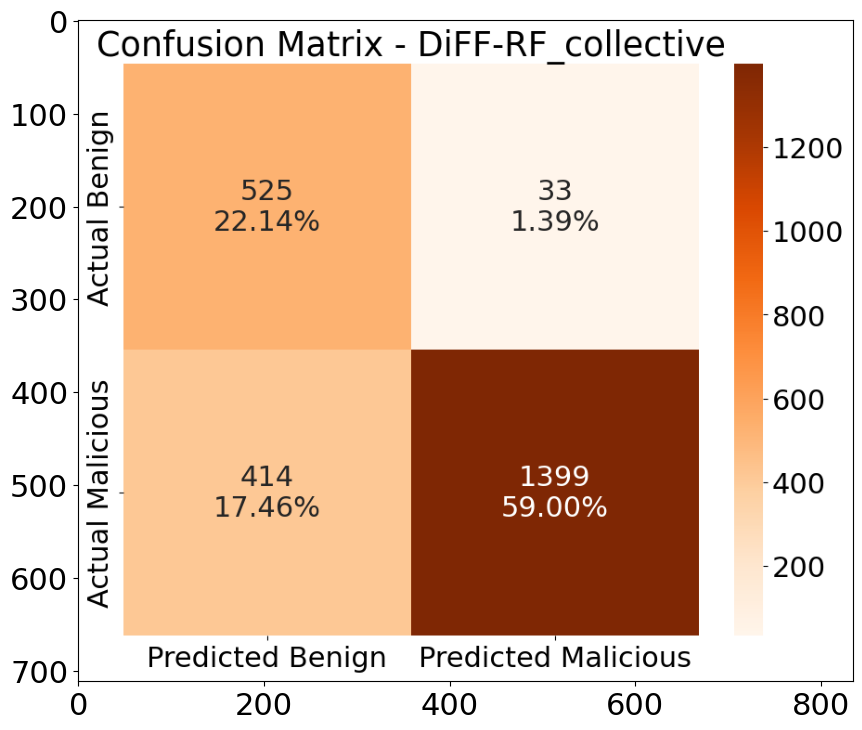

In [35]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test, default_hyperparameters= {"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 0.01 })

#### SPF

In [36]:
# Load the dataset
dataset_name = "SPF"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))


Dataset: SPF
Test set information:
  Total instances: 927
  Positive instances (anomalies): 673 (72.60%)
  Negative instances (normal): 254 (27.40%)
Feature information:
  Number of features: 27
  Feature names: X_Minimum, X_Maximum, Y_Minimum, Y_Maximum, Pixels_Areas...
Training set information:
  Original size: 1014 instances
  Used size: 1014 instances (100.0% of original)
Hyperparameters file not found for SPF. Using default parameters.
Hyperparameters: {'sample_size': 253, 'n_trees': 128, 'alpha': 0.5}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.579581, Collective: -0.511005

Test Set Results:
Pointwise detection metrics:
  auc: 0.7080
  ap: 0.8246
  acc: 0.7077
  tpr: 0.7073
  fpr: 0.2913
  precision: 0.8655
  f1-score: 0.7784

Collective detection metrics:
  auc: 0.7564
  ap: 0.8545
  acc: 0.7228
  tpr: 0.6820
  fpr: 0.1693
  precision: 0.9143
  f1-score: 0.7813
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/SPF_20250329_174856/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/SPF_20250329_174856/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/SPF_20250329_174856


{'DiFF-RF': {'threshold_pointwise': -0.5795807592628899,
  'threshold_collective': -0.5110046808789648,
  'test_pointwise': {'auc': np.float64(0.7079711247089657),
   'ap': np.float64(0.8246328954077191),
   'acc': np.float64(0.7076591154261057),
   'tpr': np.float64(0.7072808320950966),
   'fpr': np.float64(0.29133858267716534),
   'precision': np.float64(0.8654545454545455),
   'f1-score': np.float64(0.778413736713001)},
  'test_collective': {'auc': np.float64(0.7563647318973686),
   'ap': np.float64(0.8544529052419733),
   'acc': np.float64(0.7227615965480043),
   'tpr': np.float64(0.6820208023774146),
   'fpr': np.float64(0.16929133858267717),
   'precision': np.float64(0.9143426294820717),
   'f1-score': np.float64(0.7812765957446809)}}}

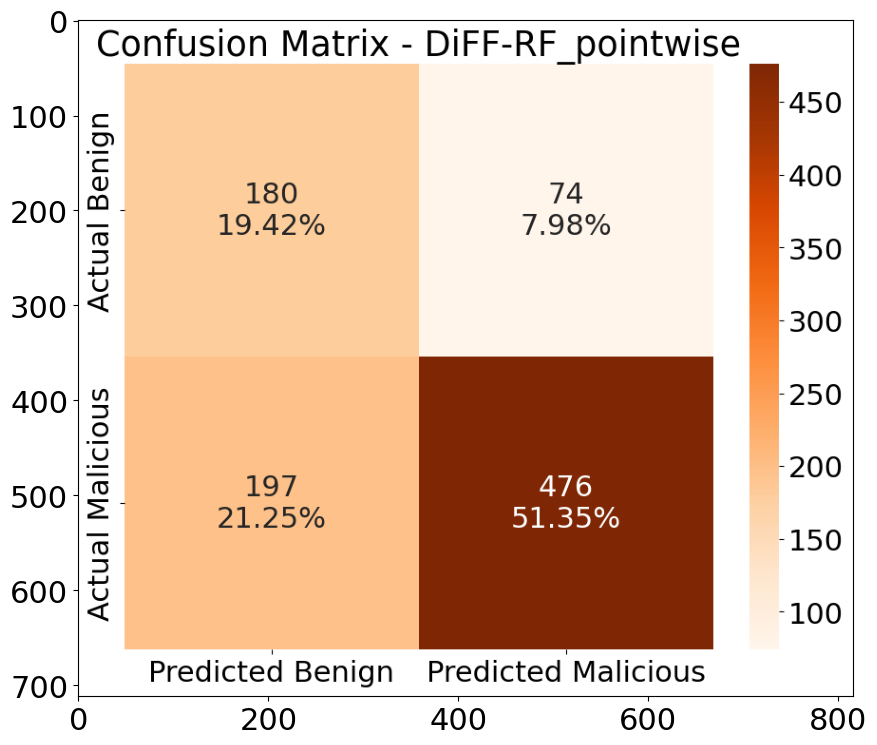

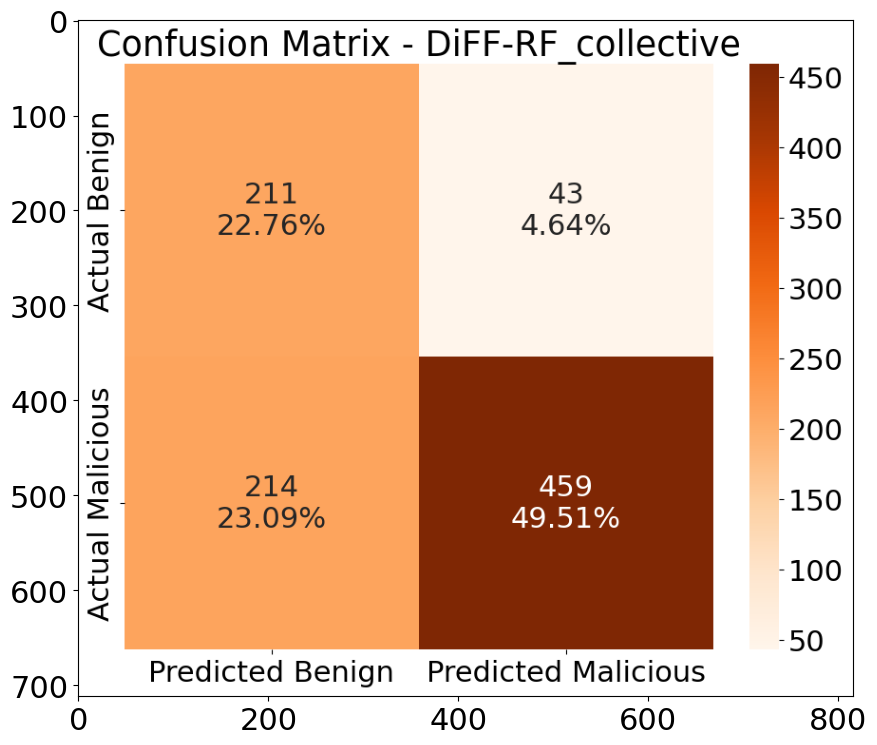

In [37]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test, default_hyperparameters= {"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 0.5 })

### UNSW

#### SSH

In [38]:
# Load the dataset
dataset_name = "UNSW_ssh"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))


Dataset: UNSW_ssh
Test set information:
  Total instances: 9448
  Positive instances (anomalies): 19 (0.20%)
  Negative instances (normal): 9429 (99.80%)
Feature information:
  Number of features: 40
  Feature names: dur, sbytes, dbytes, sttl, dttl...
Training set information:
  Original size: 37712 instances
  Used size: 30000 instances (79.6% of original)
Hyperparameters file not found for UNSW_ssh. Using default parameters.
Hyperparameters: {'sample_size': 7500, 'n_trees': 128, 'alpha': 0.0001}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.873297, Collective: -0.408885

Test Set Results:
Pointwise detection metrics:
  auc: 0.9433
  ap: 0.0290
  acc: 0.9392
  tpr: 0.9474
  fpr: 0.0608
  precision: 0.0305
  f1-score: 0.0590

Collective detection metrics:
  auc: 0.9708
  ap: 0.2337
  acc: 0.9941
  tpr: 0.9474
  fpr: 0.0058
  precision: 0.2466
  f1-score: 0.3913
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/UNSW_ssh_20250329_174913/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/UNSW_ssh_20250329_174913/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/UNSW_ssh_20250329_174913


{'DiFF-RF': {'threshold_pointwise': -0.8732966594983483,
  'threshold_collective': -0.40888469096056285,
  'test_pointwise': {'auc': np.float64(0.9432992280255204),
   'ap': np.float64(0.028959703046024608),
   'acc': np.float64(0.9392464013547841),
   'tpr': np.float64(0.9473684210526315),
   'fpr': np.float64(0.060769965001590834),
   'precision': np.float64(0.030456852791878174),
   'f1-score': np.float64(0.05901639344262295)},
  'test_collective': {'auc': np.float64(0.9707676764293807),
   'ap': np.float64(0.23370353536864324),
   'acc': np.float64(0.9940728196443692),
   'tpr': np.float64(0.9473684210526315),
   'fpr': np.float64(0.005833068193869976),
   'precision': np.float64(0.2465753424657534),
   'f1-score': np.float64(0.391304347826087)}}}

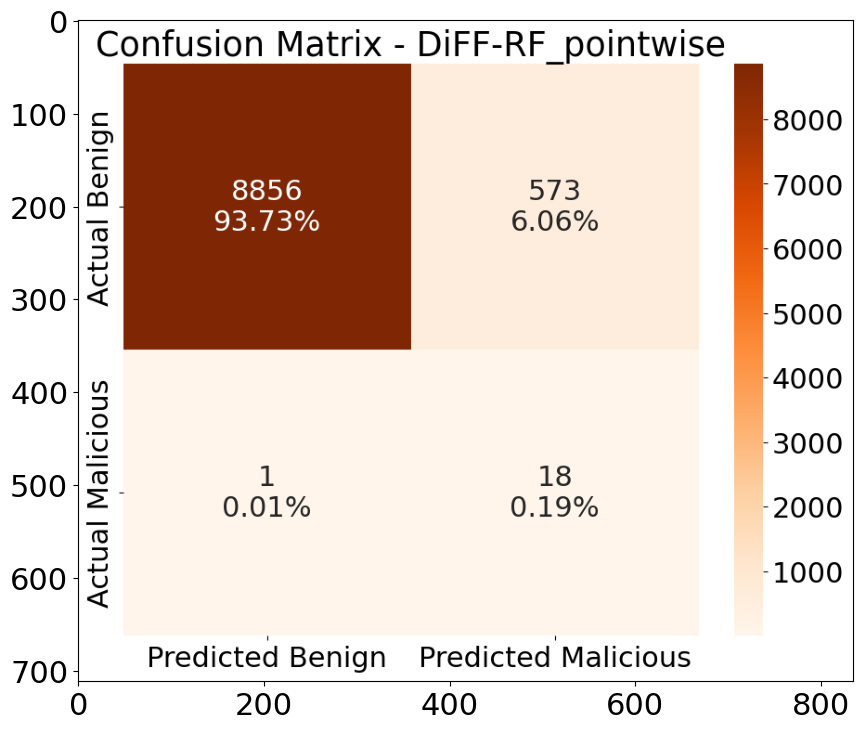

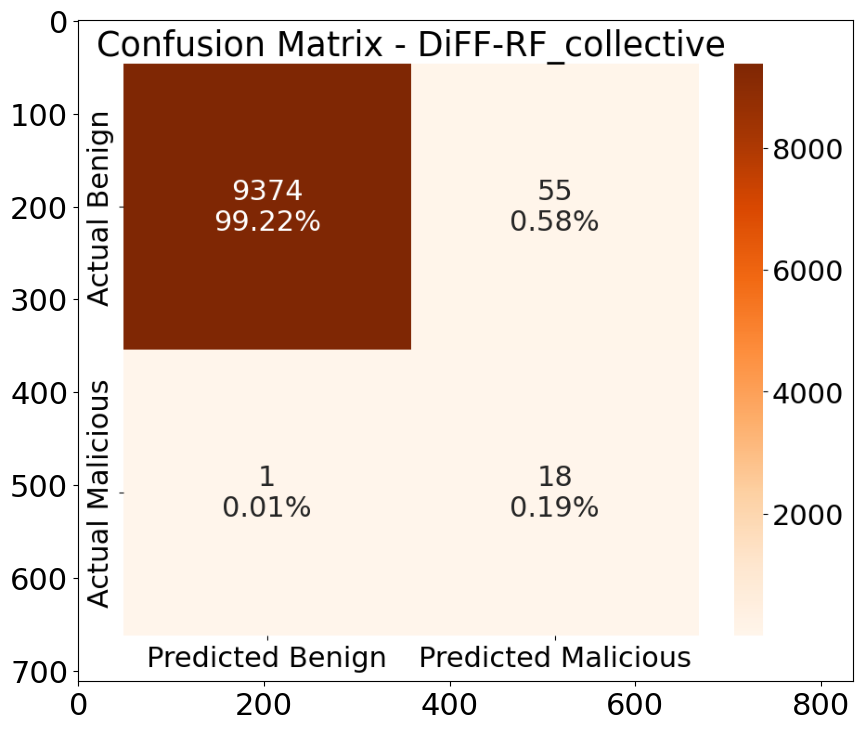

In [39]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test, default_hyperparameters= {"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 0.0001 })

#### FTP

In [40]:
# Load the dataset
dataset_name = "UNSW_ftp"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))


Dataset: UNSW_ftp
Test set information:
  Total instances: 12230
  Positive instances (anomalies): 3015 (24.65%)
  Negative instances (normal): 9215 (75.35%)
Feature information:
  Number of features: 40
  Feature names: dur, sbytes, dbytes, sttl, dttl...
Training set information:
  Original size: 36860 instances
  Used size: 30000 instances (81.4% of original)
Hyperparameters file not found for UNSW_ftp. Using default parameters.
Hyperparameters: {'sample_size': 7500, 'n_trees': 128, 'alpha': 0.001}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.933786, Collective: -0.463462

Test Set Results:
Pointwise detection metrics:
  auc: 0.9737
  ap: 0.8919
  acc: 0.9697
  tpr: 0.9814
  fpr: 0.0341
  precision: 0.9041
  f1-score: 0.9412

Collective detection metrics:
  auc: 0.9915
  ap: 0.9515
  acc: 0.9874
  tpr: 0.9997
  fpr: 0.0166
  precision: 0.9517
  f1-score: 0.9751
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/UNSW_ftp_20250329_174935/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/UNSW_ftp_20250329_174935/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/UNSW_ftp_20250329_174935


{'DiFF-RF': {'threshold_pointwise': -0.9337862037399618,
  'threshold_collective': -0.4634616698966238,
  'test_pointwise': {'auc': np.float64(0.973675662202642),
   'ap': np.float64(0.8918505611224795),
   'acc': np.float64(0.9697465249386754),
   'tpr': np.float64(0.9814262023217247),
   'fpr': np.float64(0.03407487791644059),
   'precision': np.float64(0.9040635502597005),
   'f1-score': np.float64(0.9411577608142493)},
  'test_collective': {'auc': np.float64(0.9915324804805777),
   'ap': np.float64(0.9514554105046586),
   'acc': np.float64(0.9874080130825839),
   'tpr': np.float64(0.9996683250414594),
   'fpr': np.float64(0.016603364080303853),
   'precision': np.float64(0.9516892958635933),
   'f1-score': np.float64(0.9750889679715303)}}}

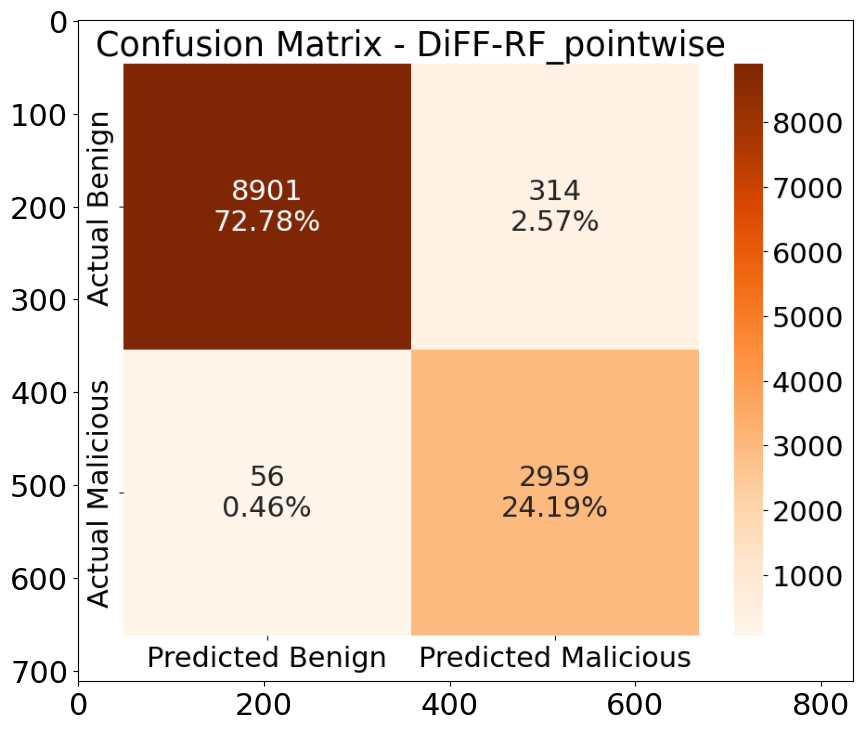

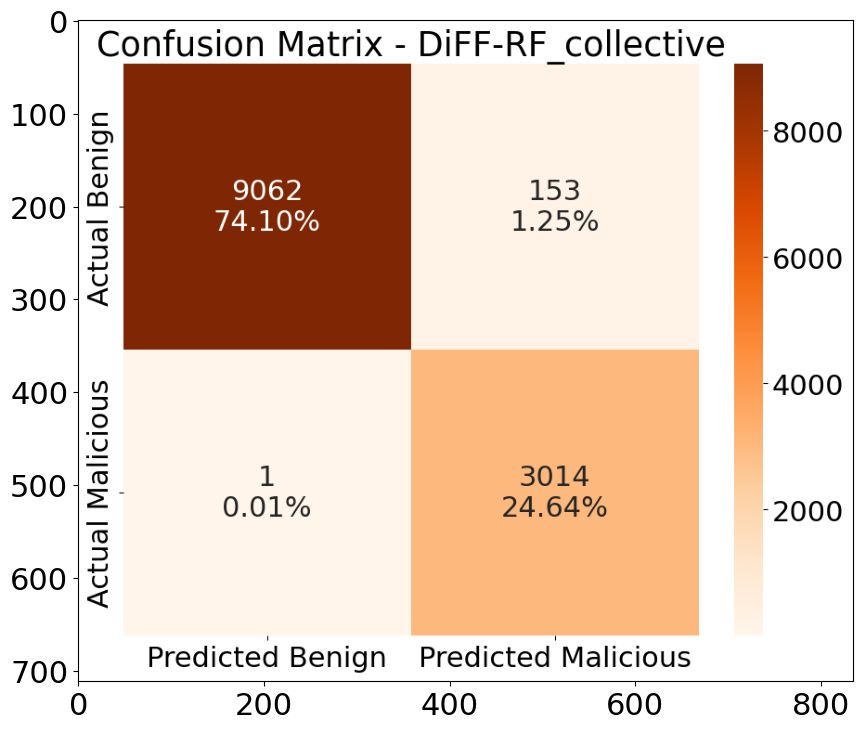

In [41]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test, default_hyperparameters= {"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 0.001 })

#### HTTP

In [42]:
# Load the dataset
dataset_name = "UNSW_http"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))


Dataset: UNSW_http
Test set information:
  Total instances: 56333
  Positive instances (anomalies): 18847 (33.46%)
  Negative instances (normal): 37486 (66.54%)
Feature information:
  Number of features: 40
  Feature names: dur, sbytes, dbytes, sttl, dttl...
Training set information:
  Original size: 149940 instances
  Used size: 30000 instances (20.0% of original)
Hyperparameters file not found for UNSW_http. Using default parameters.
Hyperparameters: {'sample_size': 7499, 'n_trees': 128, 'alpha': 0.01}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.838333, Collective: -0.275470

Test Set Results:
Pointwise detection metrics:
  auc: 0.9648
  ap: 0.9034
  acc: 0.9623
  tpr: 0.9724
  fpr: 0.0427
  precision: 0.9196
  f1-score: 0.9452

Collective detection metrics:
  auc: 0.9931
  ap: 0.9812
  acc: 0.9929
  tpr: 0.9936
  fpr: 0.0074
  precision: 0.9853
  f1-score: 0.9895
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/UNSW_http_20250329_175009/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/UNSW_http_20250329_175009/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/UNSW_http_20250329_175009


{'DiFF-RF': {'threshold_pointwise': -0.8383330300161165,
  'threshold_collective': -0.2754703674375093,
  'test_pointwise': {'auc': np.float64(0.9648101942140747),
   'ap': np.float64(0.9034377738095462),
   'acc': np.float64(0.9623133864697424),
   'tpr': np.float64(0.9723563431845917),
   'fpr': np.float64(0.04273595475644241),
   'precision': np.float64(0.9196105981533521),
   'f1-score': np.float64(0.9452482269503546)},
  'test_collective': {'auc': np.float64(0.9930950801459572),
   'ap': np.float64(0.9811770199273439),
   'acc': np.float64(0.9929171178527684),
   'tpr': np.float64(0.9936329389292725),
   'fpr': np.float64(0.007442778637357947),
   'precision': np.float64(0.9853204251289066),
   'f1-score': np.float64(0.98945922383959)}}}

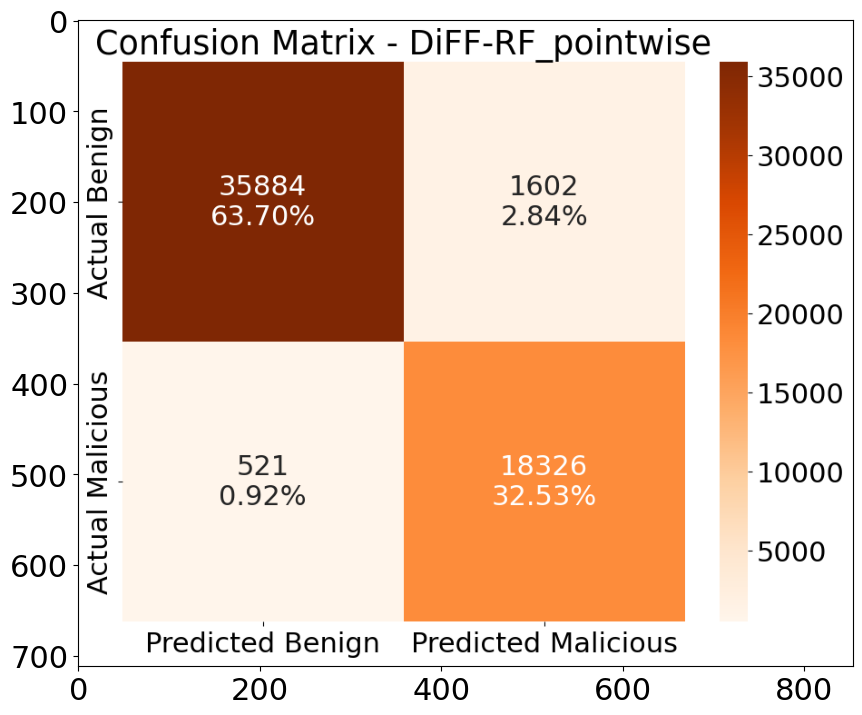

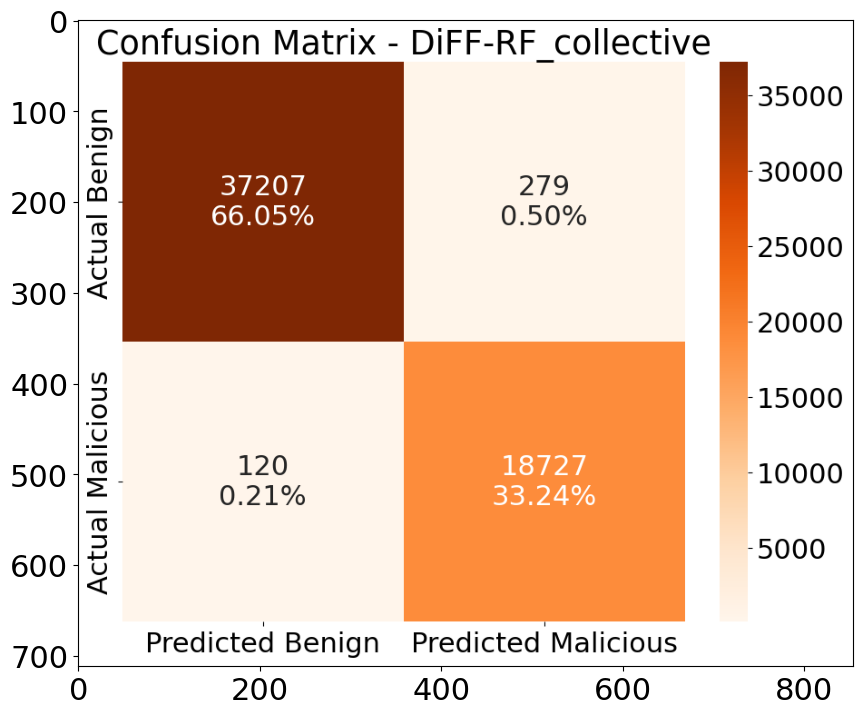

In [43]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test, default_hyperparameters= {"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 0.01 })

#### SMTP

In [44]:
# Load the dataset
dataset_name = "UNSW_smtp"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))


Dataset: UNSW_smtp
Test set information:
  Total instances: 20320
  Positive instances (anomalies): 4989 (24.55%)
  Negative instances (normal): 15331 (75.45%)
Feature information:
  Number of features: 40
  Feature names: dur, sbytes, dbytes, sttl, dttl...
Training set information:
  Original size: 61324 instances
  Used size: 30000 instances (48.9% of original)
Hyperparameters file not found for UNSW_smtp. Using default parameters.
Hyperparameters: {'sample_size': 7500, 'n_trees': 128, 'alpha': 0.01}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.444865, Collective: -0.009260

Test Set Results:
Pointwise detection metrics:
  auc: 0.9989
  ap: 0.9935
  acc: 0.9984
  tpr: 0.9998
  fpr: 0.0021
  precision: 0.9936
  f1-score: 0.9967

Collective detection metrics:
  auc: 0.9998
  ap: 0.9992
  acc: 0.9998
  tpr: 0.9998
  fpr: 0.0002
  precision: 0.9994
  f1-score: 0.9996
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/UNSW_smtp_20250329_175044/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/UNSW_smtp_20250329_175044/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/UNSW_smtp_20250329_175044


{'DiFF-RF': {'threshold_pointwise': -0.44486487485770065,
  'threshold_collective': -0.009260111610704832,
  'test_pointwise': {'auc': np.float64(0.9988561424397258),
   'ap': np.float64(0.9934755473476224),
   'acc': np.float64(0.9983759842519685),
   'tpr': np.float64(0.9997995590298657),
   'fpr': np.float64(0.0020872741504141933),
   'precision': np.float64(0.9936254980079682),
   'f1-score': np.float64(0.9967029673294036)},
  'test_collective': {'auc': np.float64(0.9998019385391322),
   'ap': np.float64(0.9992478101622341),
   'acc': np.float64(0.9998031496062992),
   'tpr': np.float64(0.9997995590298657),
   'fpr': np.float64(0.00019568195160133062),
   'precision': np.float64(0.9993989180524945),
   'f1-score': np.float64(0.9995991983967937)}}}

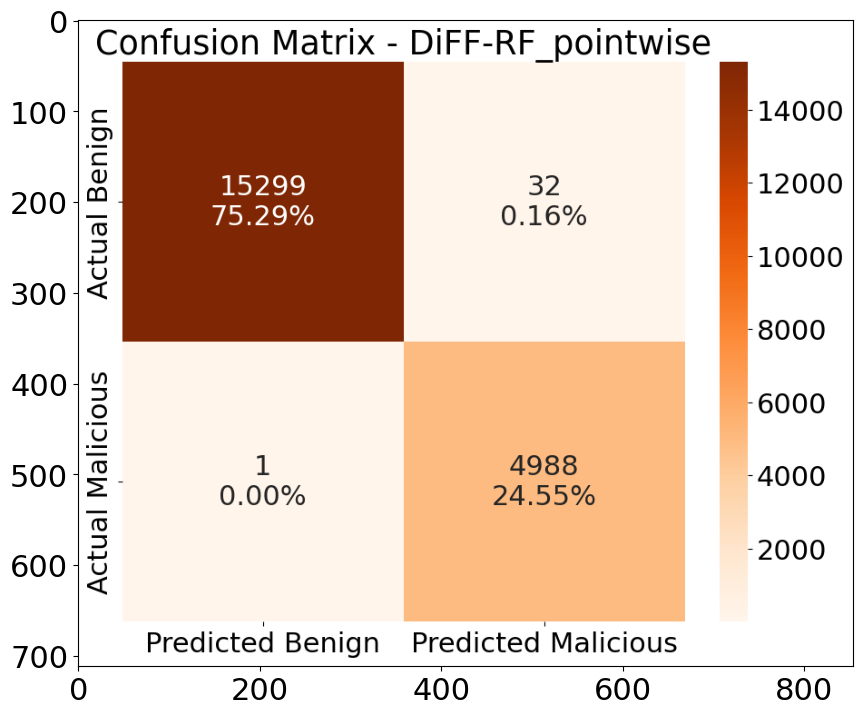

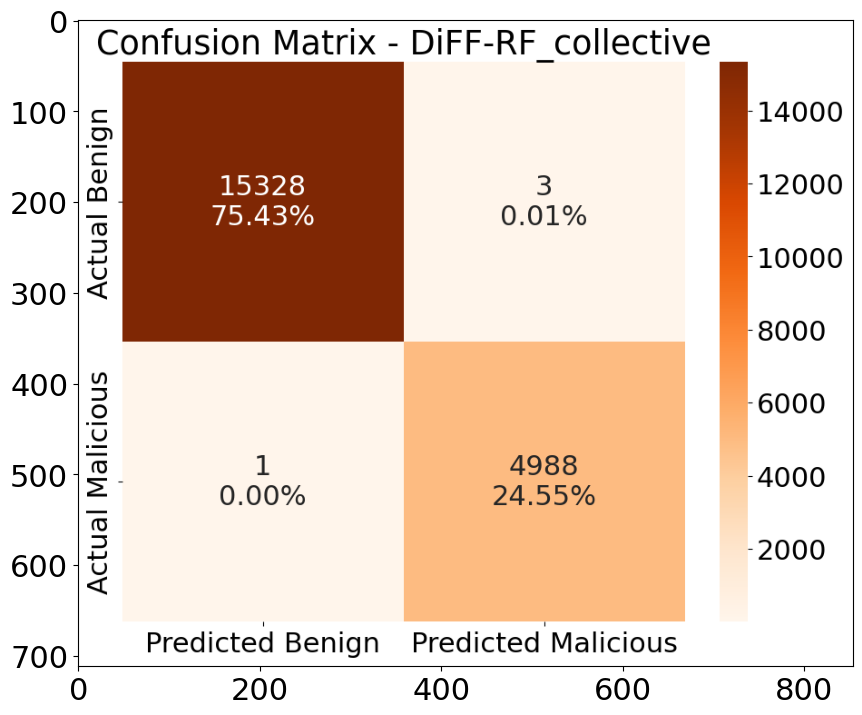

In [45]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test, default_hyperparameters= {"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 0.01 })

#### DNS

In [46]:
# Load the dataset
dataset_name = "UNSW_dns"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))


Dataset: UNSW_dns
Test set information:
  Total instances: 100000
  Positive instances (anomalies): 20000 (20.00%)
  Negative instances (normal): 80000 (80.00%)
Feature information:
  Number of features: 40
  Feature names: dur, sbytes, dbytes, sttl, dttl...
Training set information:
  Original size: 456828 instances
  Used size: 30000 instances (6.6% of original)
Hyperparameters file not found for UNSW_dns. Using default parameters.
Hyperparameters: {'sample_size': 7500, 'n_trees': 128, 'alpha': 0.01}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.000000, Collective: -0.000000

Test Set Results:
Pointwise detection metrics:
  auc: 0.9999
  ap: 0.9999
  acc: 1.0000
  tpr: 0.9999
  fpr: 0.0000
  precision: 1.0000
  f1-score: 0.9999

Collective detection metrics:
  auc: 0.9999
  ap: 0.9999
  acc: 1.0000
  tpr: 0.9999
  fpr: 0.0000
  precision: 1.0000
  f1-score: 0.9999
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/UNSW_dns_20250329_175136/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/UNSW_dns_20250329_175136/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/UNSW_dns_20250329_175136


{'DiFF-RF': {'threshold_pointwise': -2.3333017986163533e-11,
  'threshold_collective': -3.822442884332172e-11,
  'test_pointwise': {'auc': np.float64(0.999925),
   'ap': np.float64(0.99988),
   'acc': np.float64(0.99997),
   'tpr': np.float64(0.99985),
   'fpr': np.float64(0.0),
   'precision': np.float64(1.0),
   'f1-score': np.float64(0.9999249943745782)},
  'test_collective': {'auc': np.float64(0.999925),
   'ap': np.float64(0.99988),
   'acc': np.float64(0.99997),
   'tpr': np.float64(0.99985),
   'fpr': np.float64(0.0),
   'precision': np.float64(1.0),
   'f1-score': np.float64(0.9999249943745782)}}}

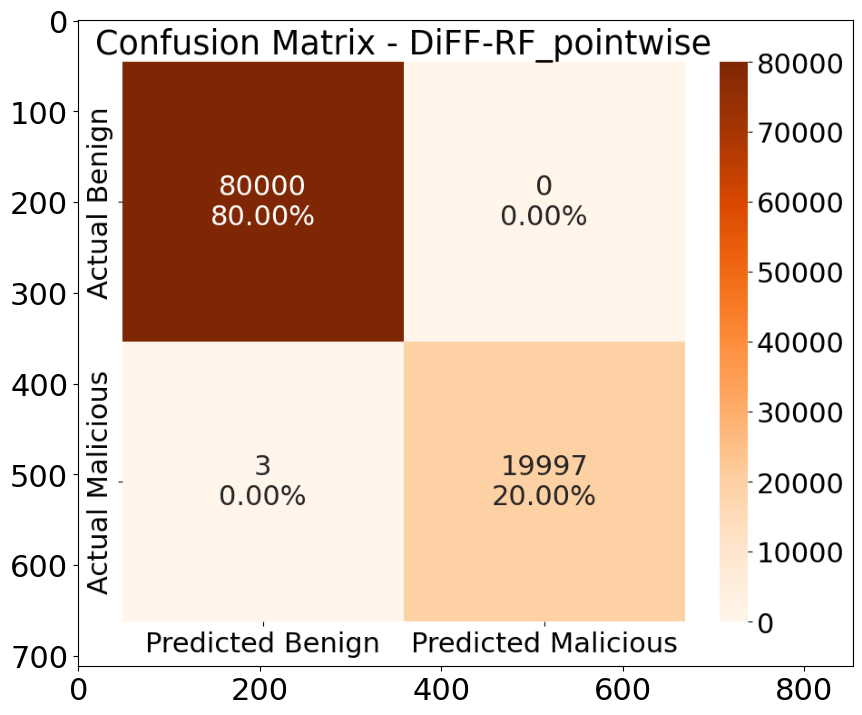

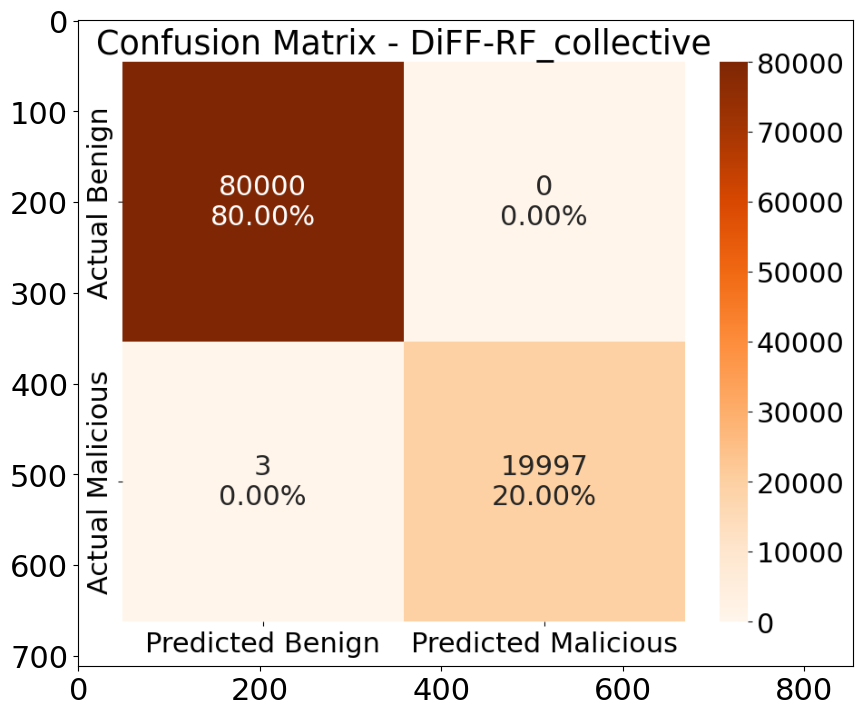

In [47]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test, default_hyperparameters= {"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 0.01 })

### CICIDS-2017

In [48]:
# Load the dataset
dataset_name = "CICIDS_2017"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))

In [49]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017607 entries, 0 to 2017606
Data columns (total 56 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Fwd Packet Length Min    float64
 1   Fwd Packet Length Std    float64
 2   Bwd Packet Length Min    float64
 3   Bwd Packet Length Std    float64
 4   Flow Bytes/s             float64
 5   Flow Packets/s           float64
 6   Flow IAT Mean            float64
 7   Flow IAT Std             float64
 8   Flow IAT Min             float64
 9   Fwd IAT Total            float64
 10  Fwd IAT Mean             float64
 11  Fwd IAT Std              float64
 12  Fwd IAT Min              float64
 13  Bwd IAT Total            float64
 14  Bwd IAT Mean             float64
 15  Bwd IAT Std              float64
 16  Bwd IAT Max              float64
 17  Bwd IAT Min              float64
 18  Bwd PSH Flags            float64
 19  Bwd URG Flags            float64
 20  Bwd Header Length        float64
 21  Fwd Pack


Dataset: CICIDS_2017
Test set information:
  Total instances: 100000
  Positive instances (anomalies): 20000 (20.00%)
  Negative instances (normal): 80000 (80.00%)
Feature information:
  Number of features: 56
  Feature names: Fwd Packet Length Min, Fwd Packet Length Std, Bwd Packet Length Min, Bwd Packet Length Std, Flow Bytes/s...
Training set information:
  Original size: 2017607 instances
  Used size: 30000 instances (1.5% of original)
Hyperparameters file not found for CICIDS_2017. Using default parameters.
Hyperparameters: {'sample_size': 7499, 'n_trees': 128, 'alpha': 2}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.874058, Collective: -0.878459

Test Set Results:
Pointwise detection metrics:
  auc: 0.5192
  ap: 0.2063
  acc: 0.2407
  tpr: 0.9832
  fpr: 0.9449
  precision: 0.2064
  f1-score: 0.3412

Collective detection metrics:
  auc: 0.5249
  ap: 0.2083
  acc: 0.2467
  tpr: 0.9886
  fpr: 0.9387
  precision: 0.2084
  f1-score: 0.3442
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/CICIDS_2017_20250329_180424/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/CICIDS_2017_20250329_180424/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/CICIDS_2017_20250329_180424


{'DiFF-RF': {'threshold_pointwise': -0.8740584988689627,
  'threshold_collective': -0.8784592700629791,
  'test_pointwise': {'auc': np.float64(0.51915625),
   'ap': np.float64(0.20632724371424072),
   'acc': np.float64(0.24073),
   'tpr': np.float64(0.9832),
   'fpr': np.float64(0.9448875),
   'precision': np.float64(0.20643535772400398),
   'f1-score': np.float64(0.34122597718103337)},
  'test_collective': {'auc': np.float64(0.5249125),
   'ap': np.float64(0.20830695021556042),
   'acc': np.float64(0.24673),
   'tpr': np.float64(0.98855),
   'fpr': np.float64(0.938725),
   'precision': np.float64(0.20840316647166093),
   'f1-score': np.float64(0.34423560751812937)}}}

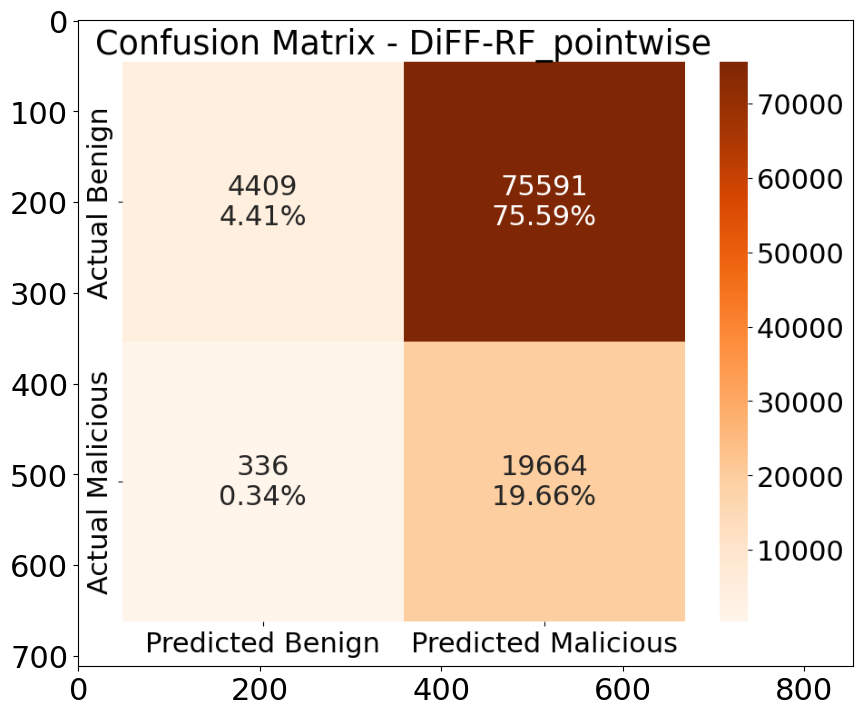

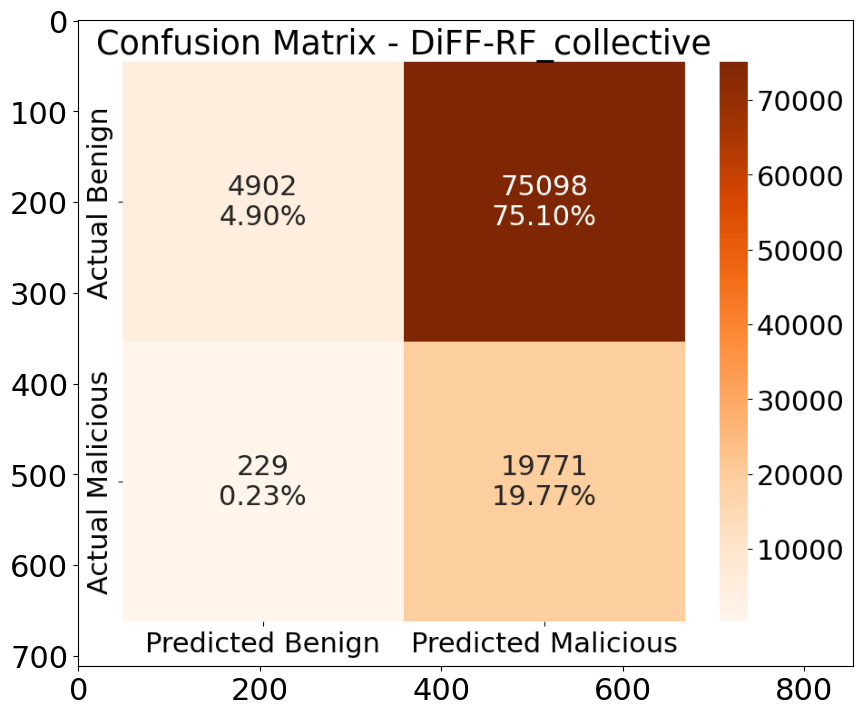

In [50]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test, default_hyperparameters= {"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 2 })

### CIDDS-001

#### CIDDS-001_ICMP

In [51]:
# Load the dataset
dataset_name = "CIDDS-001_ICMP"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))

In [52]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Duration       527 non-null    float64
 1   Packets        527 non-null    float64
 2   Flows          527 non-null    float64
 3   Bytes Numeric  527 non-null    float64
 4   flag_bit_0     527 non-null    float64
 5   flag_bit_1     527 non-null    float64
 6   flag_bit_2     527 non-null    float64
 7   flag_bit_3     527 non-null    float64
 8   flag_bit_4     527 non-null    float64
 9   flag_bit_5     527 non-null    float64
 10  flag_bit_6     527 non-null    float64
 11  flag_bit_7     527 non-null    float64
 12  Tos_0          527 non-null    float64
 13  Tos_12         527 non-null    float64
 14  Tos_16         527 non-null    float64
 15  Tos_192        527 non-null    float64
dtypes: float64(16)
memory usage: 66.0 KB



Dataset: CIDDS-001_ICMP
Test set information:
  Total instances: 1380
  Positive instances (anomalies): 722 (52.32%)
  Negative instances (normal): 658 (47.68%)
Feature information:
  Number of features: 16
  Feature names: Duration, Packets, Flows, Bytes Numeric, flag_bit_0...
Training set information:
  Original size: 527 instances
  Used size: 527 instances (100.0% of original)
Hyperparameters file not found for CIDDS-001_ICMP. Using default parameters.
Hyperparameters: {'sample_size': 131, 'n_trees': 128, 'alpha': 0.1}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.933975, Collective: -0.399838

Test Set Results:
Pointwise detection metrics:
  auc: 0.8501
  ap: 0.7890
  acc: 0.8558
  tpr: 0.9737
  fpr: 0.2736
  precision: 0.7961
  f1-score: 0.8760

Collective detection metrics:
  auc: 0.9910
  ap: 0.9850
  acc: 0.9913
  tpr: 0.9972
  fpr: 0.0152
  precision: 0.9863
  f1-score: 0.9917
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/CIDDS-001_ICMP_20250329_180425/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/CIDDS-001_ICMP_20250329_180425/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/CIDDS-001_ICMP_20250329_180425


{'DiFF-RF': {'threshold_pointwise': -0.9339751068833173,
  'threshold_collective': -0.3998384810443829,
  'test_pointwise': {'auc': np.float64(0.8500639897616382),
   'ap': np.float64(0.788966303937499),
   'acc': np.float64(0.8557971014492753),
   'tpr': np.float64(0.9736842105263158),
   'fpr': np.float64(0.2735562310030395),
   'precision': np.float64(0.796149490373726),
   'f1-score': np.float64(0.8760124610591901)},
  'test_collective': {'auc': np.float64(0.9910161742542246),
   'ap': np.float64(0.9850185084667092),
   'acc': np.float64(0.991304347826087),
   'tpr': np.float64(0.997229916897507),
   'fpr': np.float64(0.015197568389057751),
   'precision': np.float64(0.9863013698630136),
   'f1-score': np.float64(0.9917355371900827)}}}

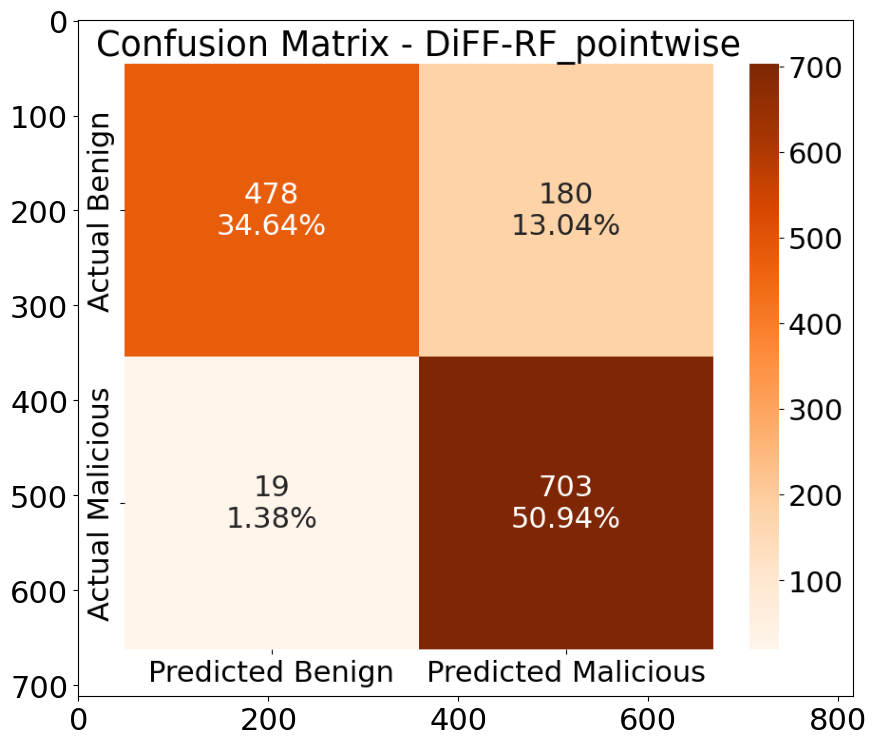

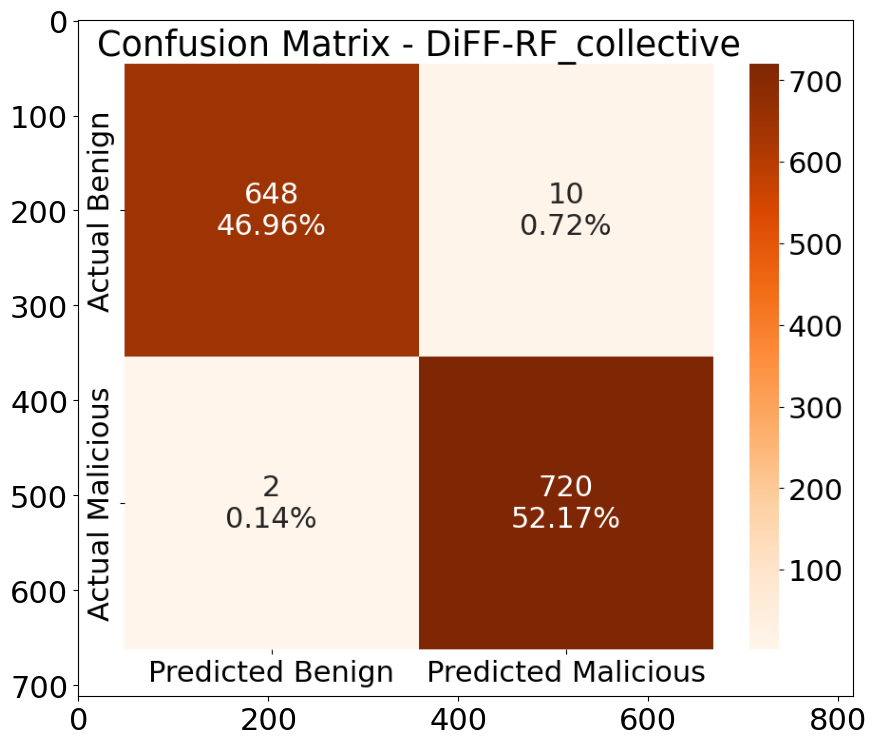

In [53]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test, default_hyperparameters={"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 0.1 })

#### CIDDS-001_TCP

In [54]:
# Load the dataset
dataset_name = "CIDDS-001_TCP"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))

In [55]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295774 entries, 0 to 3295773
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Duration       float64
 1   Packets        float64
 2   Flows          float64
 3   Bytes Numeric  float64
 4   flag_bit_0     float64
 5   flag_bit_1     float64
 6   flag_bit_2     float64
 7   flag_bit_3     float64
 8   flag_bit_4     float64
 9   flag_bit_5     float64
 10  flag_bit_6     float64
 11  flag_bit_7     float64
 12  Tos_12         float64
 13  Tos_16         float64
 14  Tos_32         float64
 15  Tos_192        float64
dtypes: float64(16)
memory usage: 402.3 MB



Dataset: CIDDS-001_TCP
Test set information:
  Total instances: 100000
  Positive instances (anomalies): 0 (0.00%)
  Negative instances (normal): 100000 (100.00%)
Feature information:
  Number of features: 16
  Feature names: Duration, Packets, Flows, Bytes Numeric, flag_bit_0...
Training set information:
  Original size: 3295774 instances
  Used size: 30000 instances (0.9% of original)
Hyperparameters file not found for CIDDS-001_TCP. Using default parameters.
Hyperparameters: {'sample_size': 7499, 'n_trees': 128, 'alpha': 1}

Training DiFF-RF model...


Evaluating model on test data...


/home/davi/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/davi/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Optimal thresholds - Pointwise: inf, Collective: inf

Test Set Results:
Pointwise detection metrics:
  auc: 0.5000
  ap: 0.0000
  acc: 1.0000
  tpr: 0.0000
  fpr: 0.0000
  precision: 0.0000
  f1-score: 0.0000

Collective detection metrics:
  auc: 0.5000
  ap: 0.0000
  acc: 1.0000
  tpr: 0.0000
  fpr: 0.0000
  precision: 0.0000
  f1-score: 0.0000
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/CIDDS-001_TCP_20250329_180542/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/CIDDS-001_TCP_20250329_180542/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/CIDDS-001_TCP_20250329_180542


/home/davi/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/davi/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


{'DiFF-RF': {'threshold_pointwise': inf,
  'threshold_collective': inf,
  'test_pointwise': {'auc': 0.5,
   'ap': np.float64(0.0),
   'acc': np.float64(1.0),
   'tpr': 0.0,
   'fpr': 0.0,
   'precision': 0.0,
   'f1-score': 0.0},
  'test_collective': {'auc': 0.5,
   'ap': np.float64(0.0),
   'acc': np.float64(1.0),
   'tpr': 0.0,
   'fpr': 0.0,
   'precision': 0.0,
   'f1-score': 0.0}}}

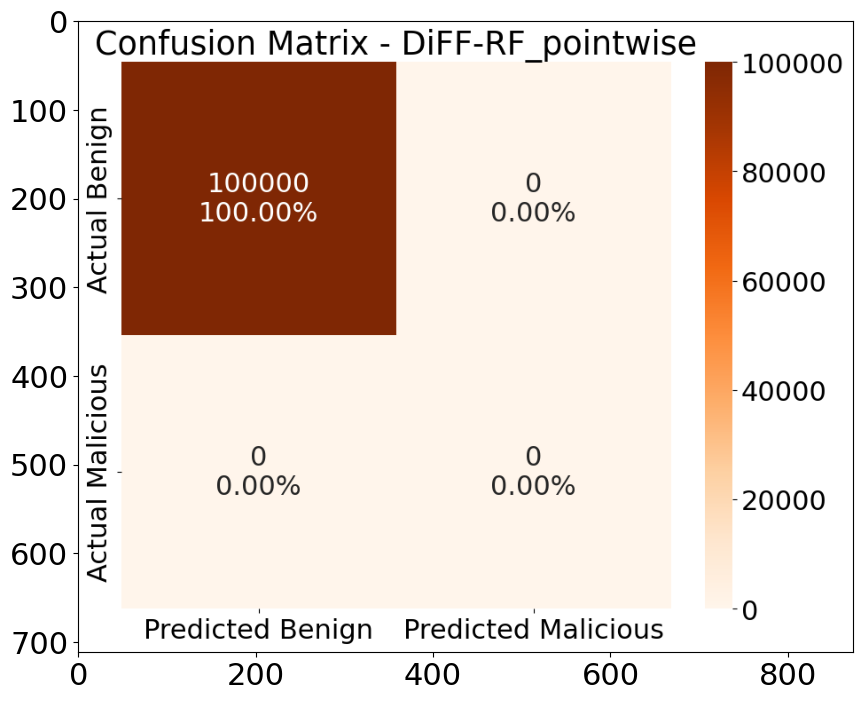

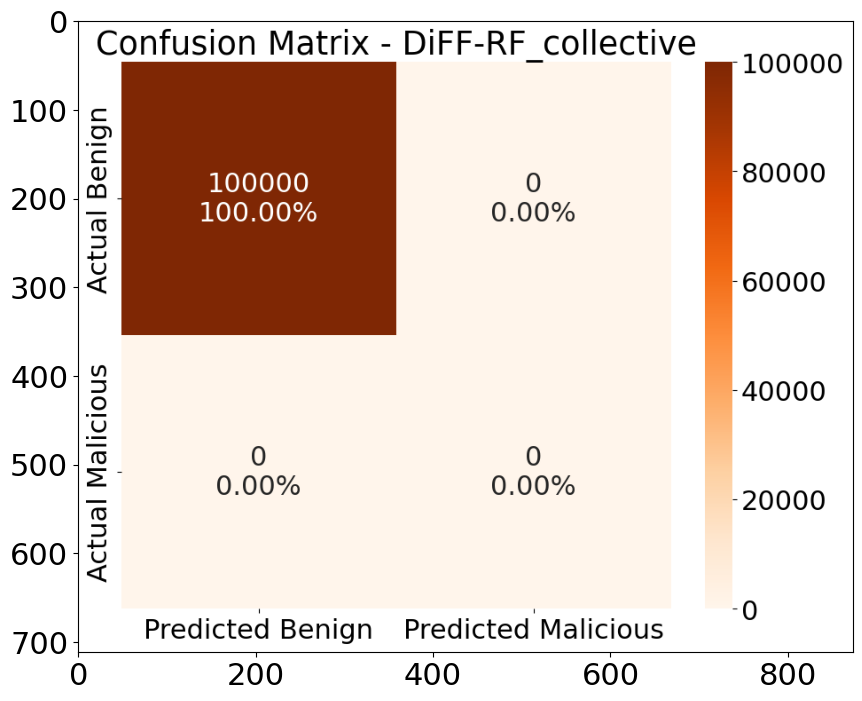

In [56]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test, default_hyperparameters={"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 1 })

#### CIDDS-001_UDP

In [57]:
# Load the dataset
dataset_name = "CIDDS-001_UDP"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))

In [58]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29702 entries, 0 to 29701
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Duration       29702 non-null  float64
 1   Packets        29702 non-null  float64
 2   Flows          29702 non-null  float64
 3   Bytes Numeric  29702 non-null  float64
 4   flag_bit_0     29702 non-null  float64
 5   flag_bit_1     29702 non-null  float64
 6   flag_bit_2     29702 non-null  float64
 7   flag_bit_3     29702 non-null  float64
 8   flag_bit_4     29702 non-null  float64
 9   flag_bit_5     29702 non-null  float64
 10  flag_bit_6     29702 non-null  float64
 11  flag_bit_7     29702 non-null  float64
 12  Tos_0          29702 non-null  float64
 13  Tos_12         29702 non-null  float64
 14  Tos_16         29702 non-null  float64
 15  Tos_32         29702 non-null  float64
 16  Tos_192        29702 non-null  float64
dtypes: float64(17)
memory usage: 3.9 MB



Dataset: CIDDS-001_UDP
Test set information:
  Total instances: 8043
  Positive instances (anomalies): 0 (0.00%)
  Negative instances (normal): 8043 (100.00%)
Feature information:
  Number of features: 17
  Feature names: Duration, Packets, Flows, Bytes Numeric, flag_bit_0...
Training set information:
  Original size: 29702 instances
  Used size: 29702 instances (100.0% of original)
Hyperparameters file not found for CIDDS-001_UDP. Using default parameters.
Hyperparameters: {'sample_size': 7425, 'n_trees': 128, 'alpha': 0.001}

Training DiFF-RF model...


Evaluating model on test data...


/home/davi/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/davi/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/davi/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Optimal thresholds - Pointwise: inf, Collective: inf

Test Set Results:
Pointwise detection metrics:
  auc: 0.5000
  ap: 0.0000
  acc: 1.0000
  tpr: 0.0000
  fpr: 0.0000
  precision: 0.0000
  f1-score: 0.0000

Collective detection metrics:
  auc: 0.5000
  ap: 0.0000
  acc: 1.0000
  tpr: 0.0000
  fpr: 0.0000
  precision: 0.0000
  f1-score: 0.0000
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/CIDDS-001_UDP_20250329_180602/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/CIDDS-001_UDP_20250329_180602/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/CIDDS-001_UDP_20250329_180602


/home/davi/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


{'DiFF-RF': {'threshold_pointwise': inf,
  'threshold_collective': inf,
  'test_pointwise': {'auc': 0.5,
   'ap': np.float64(0.0),
   'acc': np.float64(1.0),
   'tpr': 0.0,
   'fpr': 0.0,
   'precision': 0.0,
   'f1-score': 0.0},
  'test_collective': {'auc': 0.5,
   'ap': np.float64(0.0),
   'acc': np.float64(1.0),
   'tpr': 0.0,
   'fpr': 0.0,
   'precision': 0.0,
   'f1-score': 0.0}}}

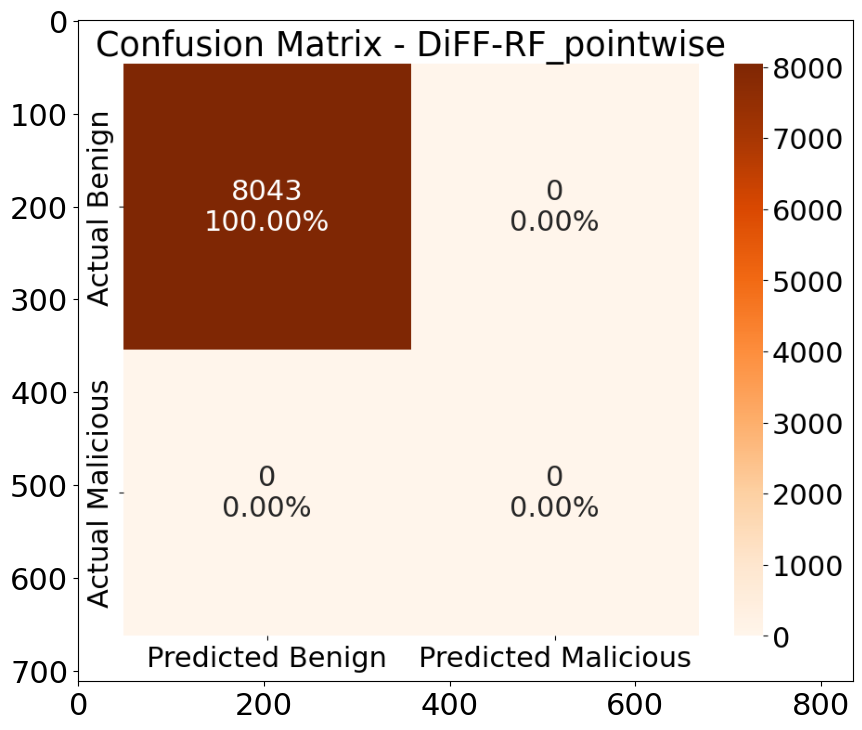

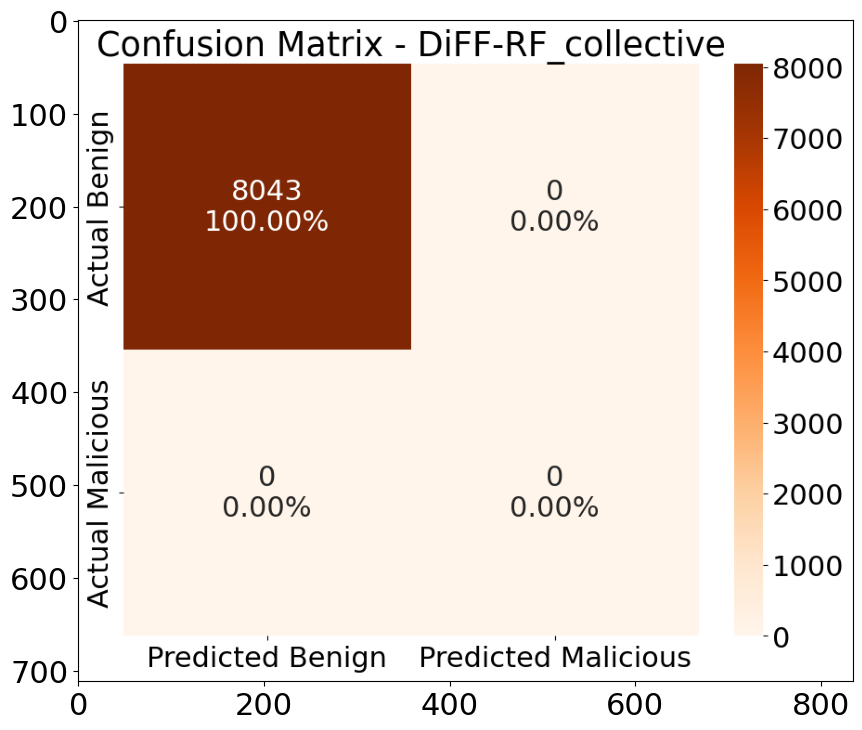

In [59]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test, default_hyperparameters={"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 0.001 })

### Kitsune
O Kitsune é composto por vários datasets diferentes e disjuntos.

São eles:
- Kitsune_Active_Wiretap  
- Kitsune_Fuzzing  
- Kitsune_SSDP_Flood         
- Kitsune_SYN_DoS
- Kitsune_ARP_MitM        
- Kitsune_Mirai    
- Kitsune_OS_Scan        
- Kitsune_SSL_Renegotiation  
- Kitsune_Video_Injection

#### Kitsune_Active_Wiretap

In [60]:
# Load the dataset
dataset_name = "Kitsune_Active_Wiretap"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))

In [61]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344839 entries, 0 to 344838
Data columns (total 34 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   feat21   344839 non-null  float64
 1   feat36   344839 non-null  float64
 2   feat42   344839 non-null  float64
 3   feat43   344839 non-null  float64
 4   feat44   344839 non-null  float64
 5   feat50   344839 non-null  float64
 6   feat51   344839 non-null  float64
 7   feat57   344839 non-null  float64
 8   feat58   344839 non-null  float64
 9   feat62   344839 non-null  float64
 10  feat63   344839 non-null  float64
 11  feat64   344839 non-null  float64
 12  feat65   344839 non-null  float64
 13  feat74   344839 non-null  float64
 14  feat75   344839 non-null  float64
 15  feat78   344839 non-null  float64
 16  feat79   344839 non-null  float64
 17  feat80   344839 non-null  float64
 18  feat86   344839 non-null  float64
 19  feat88   344839 non-null  float64
 20  feat93   344839 non-null  


Dataset: Kitsune_Active_Wiretap
Test set information:
  Total instances: 100000
  Positive instances (anomalies): 20000 (20.00%)
  Negative instances (normal): 80000 (80.00%)
Feature information:
  Number of features: 34
  Feature names: feat21, feat36, feat42, feat43, feat44...
Training set information:
  Original size: 344839 instances
  Used size: 30000 instances (8.7% of original)
Hyperparameters file not found for Kitsune_Active_Wiretap. Using default parameters.
Hyperparameters: {'sample_size': 7499, 'n_trees': 128, 'alpha': 0.001}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.993851, Collective: -0.956540

Test Set Results:
Pointwise detection metrics:
  auc: 0.8638
  ap: 0.6133
  acc: 0.8959
  tpr: 0.8102
  fpr: 0.0827
  precision: 0.7101
  f1-score: 0.7568

Collective detection metrics:
  auc: 0.9526
  ap: 0.8453
  acc: 0.9639
  tpr: 0.9336
  fpr: 0.0285
  precision: 0.8912
  f1-score: 0.9119
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_Active_Wiretap_20250329_180637/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_Active_Wiretap_20250329_180637/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_Active_Wiretap_20250329_180637


{'DiFF-RF': {'threshold_pointwise': -0.9938508483096198,
  'threshold_collective': -0.9565397824100468,
  'test_pointwise': {'auc': np.float64(0.86375),
   'ap': np.float64(0.613265907099036),
   'acc': np.float64(0.89588),
   'tpr': np.float64(0.8102),
   'fpr': np.float64(0.0827),
   'precision': np.float64(0.7100788781770376),
   'f1-score': np.float64(0.7568425969173285)},
  'test_collective': {'auc': np.float64(0.9525750000000001),
   'ap': np.float64(0.8453249062186798),
   'acc': np.float64(0.96393),
   'tpr': np.float64(0.93365),
   'fpr': np.float64(0.0285),
   'precision': np.float64(0.8911850331694745),
   'f1-score': np.float64(0.9119234244133518)}}}

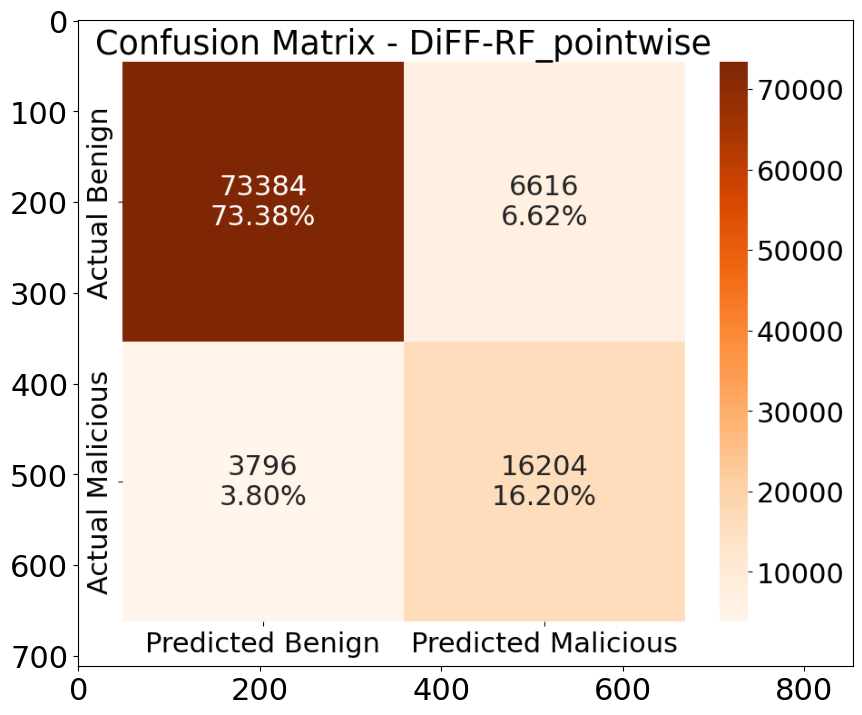

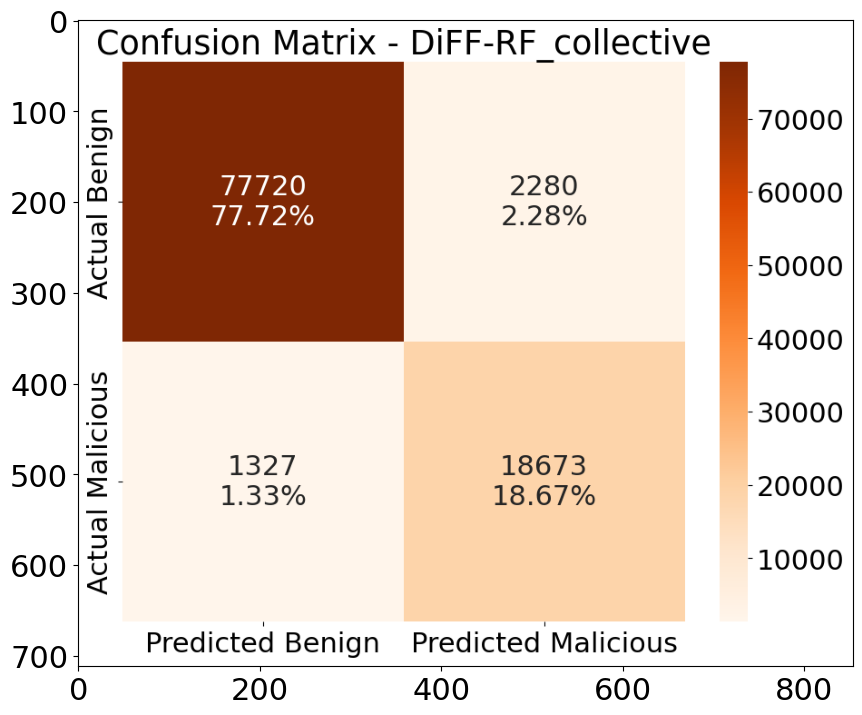

In [62]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test,default_hyperparameters={"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 0.001 })

#### Kitsune_Fuzzing

In [63]:
# Load the dataset
dataset_name = "Kitsune_Fuzzing"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))

In [64]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467559 entries, 0 to 467558
Data columns (total 34 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   feat43   467559 non-null  float64
 1   feat44   467559 non-null  float64
 2   feat50   467559 non-null  float64
 3   feat51   467559 non-null  float64
 4   feat57   467559 non-null  float64
 5   feat58   467559 non-null  float64
 6   feat62   467559 non-null  float64
 7   feat63   467559 non-null  float64
 8   feat64   467559 non-null  float64
 9   feat65   467559 non-null  float64
 10  feat69   467559 non-null  float64
 11  feat73   467559 non-null  float64
 12  feat74   467559 non-null  float64
 13  feat77   467559 non-null  float64
 14  feat79   467559 non-null  float64
 15  feat80   467559 non-null  float64
 16  feat86   467559 non-null  float64
 17  feat87   467559 non-null  float64
 18  feat88   467559 non-null  float64
 19  feat93   467559 non-null  float64
 20  feat94   467559 non-null  


Dataset: Kitsune_Fuzzing
Test set information:
  Total instances: 100000
  Positive instances (anomalies): 20000 (20.00%)
  Negative instances (normal): 80000 (80.00%)
Feature information:
  Number of features: 34
  Feature names: feat43, feat44, feat50, feat51, feat57...
Training set information:
  Original size: 467559 instances
  Used size: 30000 instances (6.4% of original)
Hyperparameters file not found for Kitsune_Fuzzing. Using default parameters.
Hyperparameters: {'sample_size': 7499, 'n_trees': 128, 'alpha': 0.001}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.999003, Collective: -0.882221

Test Set Results:
Pointwise detection metrics:
  auc: 0.5522
  ap: 0.2205
  acc: 0.6139
  tpr: 0.4495
  fpr: 0.3450
  precision: 0.2457
  f1-score: 0.3177

Collective detection metrics:
  auc: 0.8971
  ap: 0.5508
  acc: 0.8376
  tpr: 0.9961
  fpr: 0.2020
  precision: 0.5521
  f1-score: 0.7105
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_Fuzzing_20250329_180741/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_Fuzzing_20250329_180741/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_Fuzzing_20250329_180741


{'DiFF-RF': {'threshold_pointwise': -0.9990033810512322,
  'threshold_collective': -0.8822206540773665,
  'test_pointwise': {'auc': np.float64(0.55220625),
   'ap': np.float64(0.2205195444359423),
   'acc': np.float64(0.61386),
   'tpr': np.float64(0.44945),
   'fpr': np.float64(0.3450375),
   'precision': np.float64(0.24565478793178838),
   'f1-score': np.float64(0.31767741023466217)},
  'test_collective': {'auc': np.float64(0.89705),
   'ap': np.float64(0.5507579446815587),
   'acc': np.float64(0.83762),
   'tpr': np.float64(0.9961),
   'fpr': np.float64(0.202),
   'precision': np.float64(0.5521312565822294),
   'f1-score': np.float64(0.710459684034093)}}}

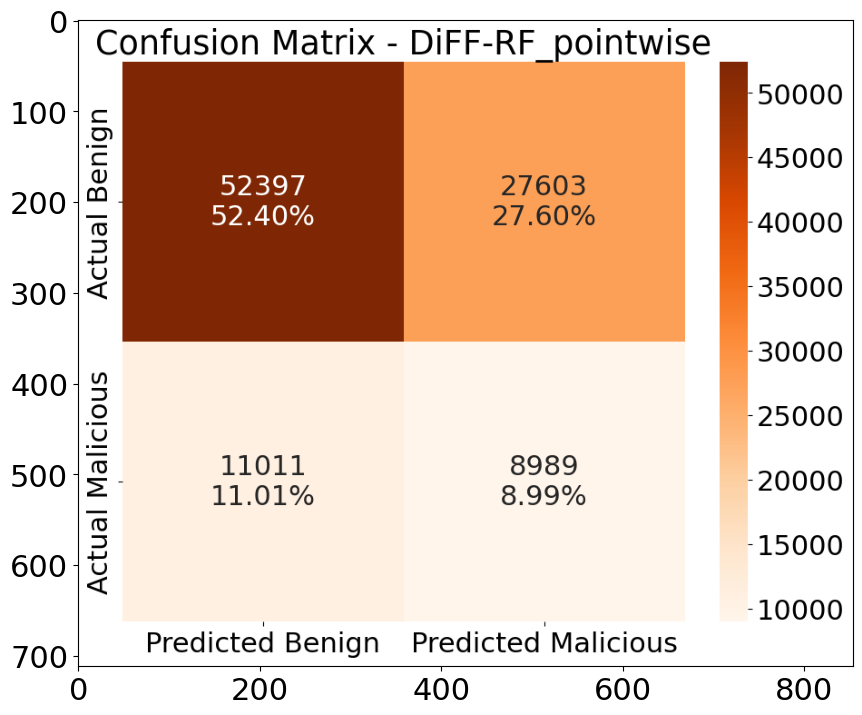

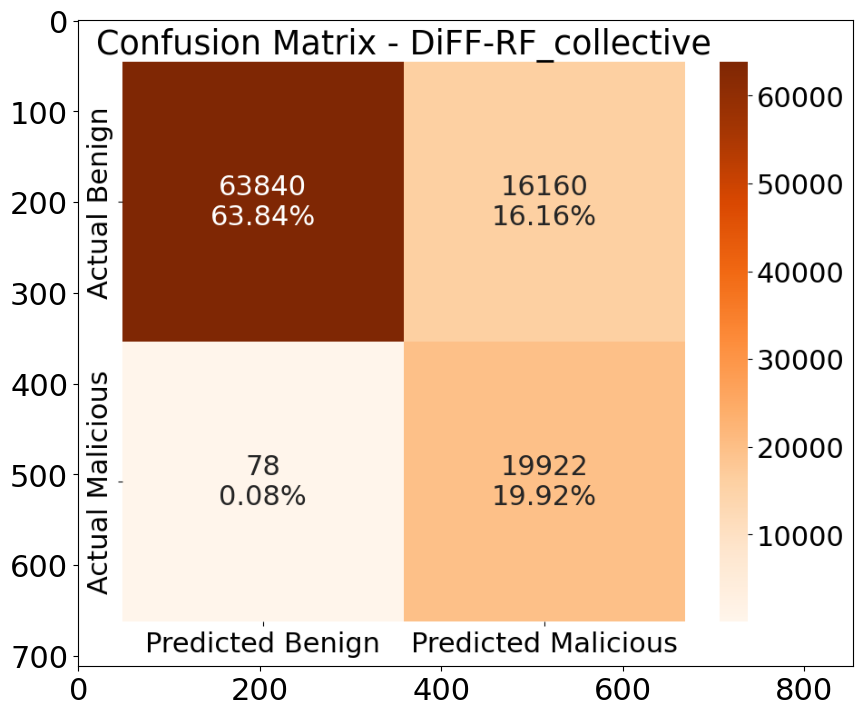

In [65]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test,default_hyperparameters={"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 0.001 })

#### Kitsune_SSDP_Flood

In [66]:
# Load the dataset
dataset_name = "Kitsune_SSDP_Flood"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))

In [67]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374788 entries, 0 to 374787
Data columns (total 36 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   feat10   374788 non-null  float64
 1   feat36   374788 non-null  float64
 2   feat37   374788 non-null  float64
 3   feat43   374788 non-null  float64
 4   feat44   374788 non-null  float64
 5   feat50   374788 non-null  float64
 6   feat51   374788 non-null  float64
 7   feat57   374788 non-null  float64
 8   feat58   374788 non-null  float64
 9   feat60   374788 non-null  float64
 10  feat63   374788 non-null  float64
 11  feat65   374788 non-null  float64
 12  feat74   374788 non-null  float64
 13  feat75   374788 non-null  float64
 14  feat77   374788 non-null  float64
 15  feat78   374788 non-null  float64
 16  feat79   374788 non-null  float64
 17  feat80   374788 non-null  float64
 18  feat86   374788 non-null  float64
 19  feat87   374788 non-null  float64
 20  feat93   374788 non-null  


Dataset: Kitsune_SSDP_Flood
Test set information:
  Total instances: 100000
  Positive instances (anomalies): 20000 (20.00%)
  Negative instances (normal): 80000 (80.00%)
Feature information:
  Number of features: 36
  Feature names: feat10, feat36, feat37, feat43, feat44...
Training set information:
  Original size: 374788 instances
  Used size: 30000 instances (8.0% of original)
Hyperparameters file not found for Kitsune_SSDP_Flood. Using default parameters.
Hyperparameters: {'sample_size': 7500, 'n_trees': 128, 'alpha': 0.1}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.136269, Collective: -0.054155

Test Set Results:
Pointwise detection metrics:
  auc: 0.9966
  ap: 0.9742
  acc: 0.9947
  tpr: 0.9998
  fpr: 0.0066
  precision: 0.9743
  f1-score: 0.9869

Collective detection metrics:
  auc: 0.9997
  ap: 0.9984
  acc: 0.9997
  tpr: 0.9997
  fpr: 0.0003
  precision: 0.9986
  f1-score: 0.9992
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_SSDP_Flood_20250329_180953/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_SSDP_Flood_20250329_180953/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_SSDP_Flood_20250329_180953


{'DiFF-RF': {'threshold_pointwise': -0.1362688044525272,
  'threshold_collective': -0.05415467958386139,
  'test_pointwise': {'auc': np.float64(0.99660625),
   'ap': np.float64(0.9741666286605273),
   'acc': np.float64(0.99469),
   'tpr': np.float64(0.9998),
   'fpr': np.float64(0.0065875),
   'precision': np.float64(0.9743214929591191),
   'f1-score': np.float64(0.9868963304789873)},
  'test_collective': {'auc': np.float64(0.9996750000000001),
   'ap': np.float64(0.9983619578463689),
   'acc': np.float64(0.99966),
   'tpr': np.float64(0.9997),
   'fpr': np.float64(0.00035),
   'precision': np.float64(0.9986015383078614),
   'f1-score': np.float64(0.9991504672430163)}}}

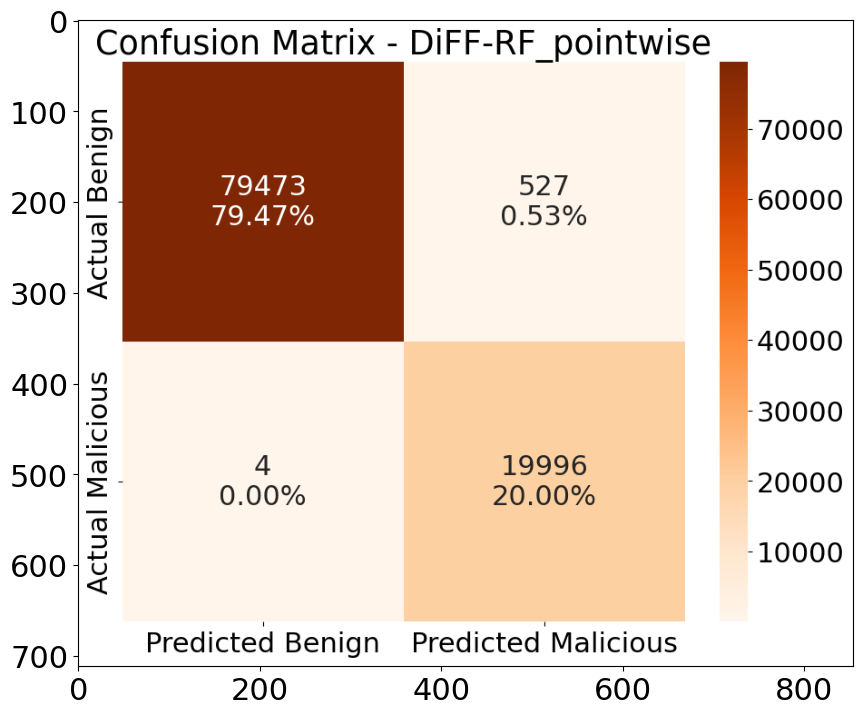

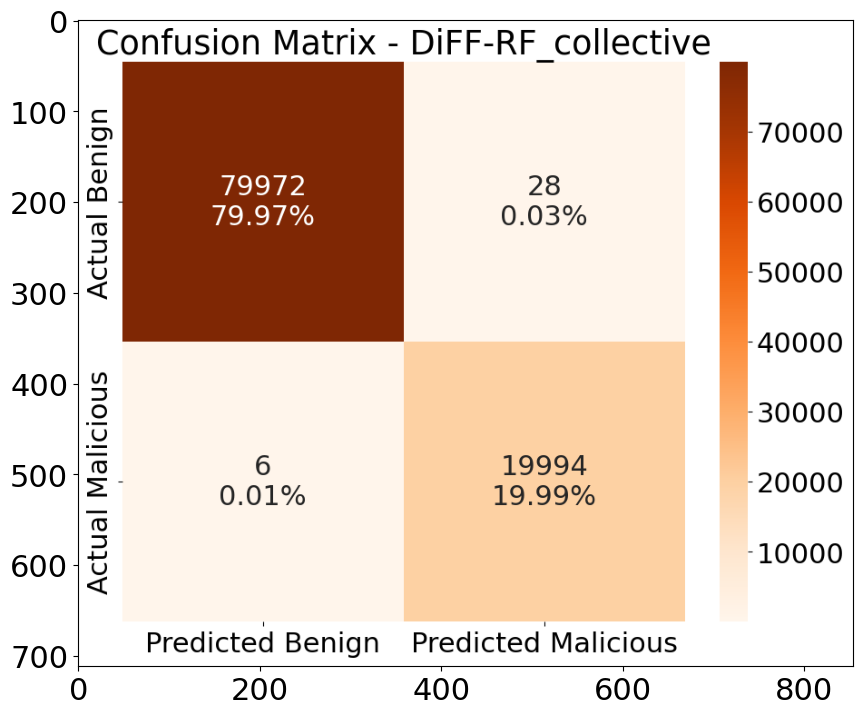

In [68]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test,default_hyperparameters={"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 0.1 })

#### Kitsune_SYN_DoS

In [69]:
# Load the dataset
dataset_name = "Kitsune_SYN_DoS"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))

In [70]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578299 entries, 0 to 578298
Data columns (total 26 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   feat37   578299 non-null  float64
 1   feat44   578299 non-null  float64
 2   feat51   578299 non-null  float64
 3   feat58   578299 non-null  float64
 4   feat60   578299 non-null  float64
 5   feat63   578299 non-null  float64
 6   feat65   578299 non-null  float64
 7   feat69   578299 non-null  float64
 8   feat74   578299 non-null  float64
 9   feat75   578299 non-null  float64
 10  feat76   578299 non-null  float64
 11  feat77   578299 non-null  float64
 12  feat78   578299 non-null  float64
 13  feat79   578299 non-null  float64
 14  feat80   578299 non-null  float64
 15  feat88   578299 non-null  float64
 16  feat94   578299 non-null  float64
 17  feat99   578299 non-null  float64
 18  feat102  578299 non-null  float64
 19  feat109  578299 non-null  float64
 20  feat110  578299 non-null  


Dataset: Kitsune_SYN_DoS
Test set information:
  Total instances: 100000
  Positive instances (anomalies): 1831 (1.83%)
  Negative instances (normal): 98169 (98.17%)
Feature information:
  Number of features: 26
  Feature names: feat37, feat44, feat51, feat58, feat60...
Training set information:
  Original size: 578299 instances
  Used size: 30000 instances (5.2% of original)
Hyperparameters file not found for Kitsune_SYN_DoS. Using default parameters.
Hyperparameters: {'sample_size': 7499, 'n_trees': 128, 'alpha': 0.1}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.965788, Collective: -0.847951

Test Set Results:
Pointwise detection metrics:
  auc: 0.6166
  ap: 0.0239
  acc: 0.3383
  tpr: 0.9055
  fpr: 0.6723
  precision: 0.0245
  f1-score: 0.0477

Collective detection metrics:
  auc: 0.9059
  ap: 0.0924
  acc: 0.8225
  tpr: 0.9924
  fpr: 0.1806
  precision: 0.0929
  f1-score: 0.1700
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_SYN_DoS_20250329_181055/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_SYN_DoS_20250329_181055/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_SYN_DoS_20250329_181055


{'DiFF-RF': {'threshold_pointwise': -0.9657876656196676,
  'threshold_collective': -0.8479509711748558,
  'test_pointwise': {'auc': np.float64(0.6166132442087255),
   'ap': np.float64(0.023920873133577016),
   'acc': np.float64(0.33829),
   'tpr': np.float64(0.9055161114145276),
   'fpr': np.float64(0.6722896229970765),
   'precision': np.float64(0.024506326120373654),
   'f1-score': np.float64(0.04772115647531193)},
  'test_collective': {'auc': np.float64(0.9058531231702277),
   'ap': np.float64(0.09236582196974173),
   'acc': np.float64(0.82252),
   'tpr': np.float64(0.9923539049699618),
   'fpr': np.float64(0.18064765862950627),
   'precision': np.float64(0.0929364226893765),
   'f1-score': np.float64(0.16995603778879434)}}}

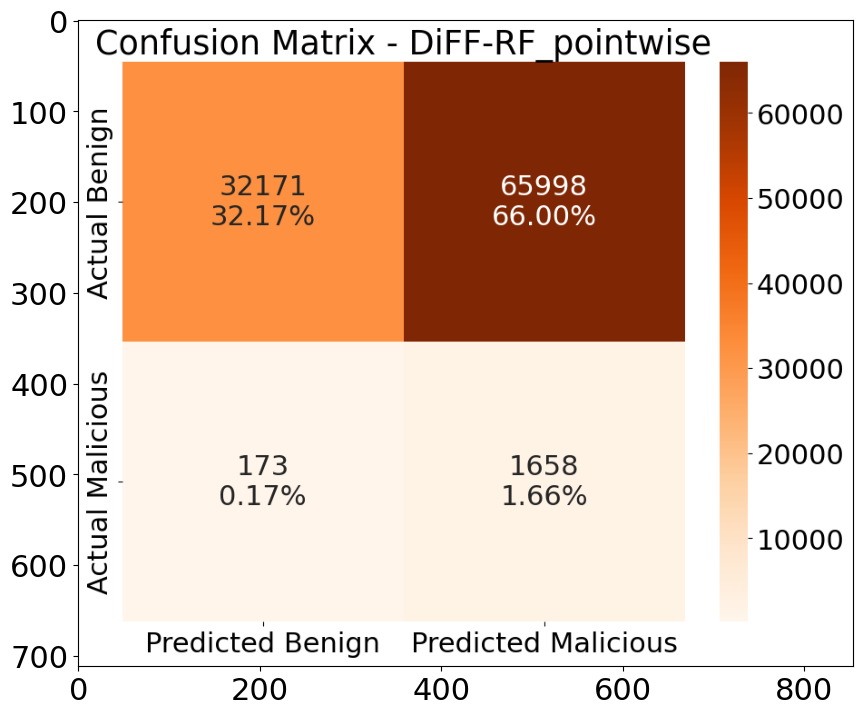

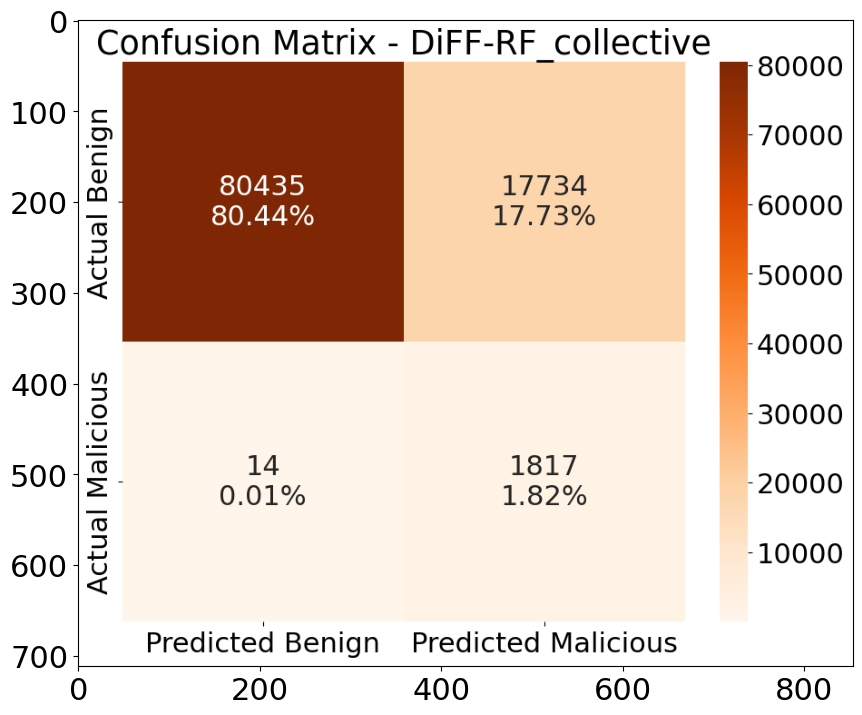

In [71]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test,default_hyperparameters={"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 0.1 })

#### Kitsune_ARP_MitM

In [72]:
# Load the dataset
dataset_name = "Kitsune_ARP_MitM"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))

In [73]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314493 entries, 0 to 314492
Data columns (total 28 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   feat21   314493 non-null  float64
 1   feat36   314493 non-null  float64
 2   feat42   314493 non-null  float64
 3   feat43   314493 non-null  float64
 4   feat44   314493 non-null  float64
 5   feat50   314493 non-null  float64
 6   feat51   314493 non-null  float64
 7   feat57   314493 non-null  float64
 8   feat58   314493 non-null  float64
 9   feat62   314493 non-null  float64
 10  feat63   314493 non-null  float64
 11  feat64   314493 non-null  float64
 12  feat65   314493 non-null  float64
 13  feat73   314493 non-null  float64
 14  feat74   314493 non-null  float64
 15  feat75   314493 non-null  float64
 16  feat78   314493 non-null  float64
 17  feat79   314493 non-null  float64
 18  feat80   314493 non-null  float64
 19  feat88   314493 non-null  float64
 20  feat95   314493 non-null  


Dataset: Kitsune_ARP_MitM
Test set information:
  Total instances: 100000
  Positive instances (anomalies): 21377 (21.38%)
  Negative instances (normal): 78623 (78.62%)
Feature information:
  Number of features: 28
  Feature names: feat21, feat36, feat42, feat43, feat44...
Training set information:
  Original size: 314493 instances
  Used size: 30000 instances (9.5% of original)
Hyperparameters file not found for Kitsune_ARP_MitM. Using default parameters.
Hyperparameters: {'sample_size': 7499, 'n_trees': 128, 'alpha': 0.1}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.912288, Collective: -0.884158

Test Set Results:
Pointwise detection metrics:
  auc: 0.7189
  ap: 0.3430
  acc: 0.6727
  tpr: 0.7997
  fpr: 0.3619
  precision: 0.3753
  f1-score: 0.5109

Collective detection metrics:
  auc: 0.8334
  ap: 0.5035
  acc: 0.8211
  tpr: 0.8549
  fpr: 0.1881
  precision: 0.5527
  f1-score: 0.6713
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_ARP_MitM_20250329_181127/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_ARP_MitM_20250329_181127/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_ARP_MitM_20250329_181127


{'DiFF-RF': {'threshold_pointwise': -0.9122876641549261,
  'threshold_collective': -0.8841575269553429,
  'test_pointwise': {'auc': np.float64(0.7189062087165418),
   'ap': np.float64(0.34296538910804386),
   'acc': np.float64(0.67266),
   'tpr': np.float64(0.7996912569584133),
   'fpr': np.float64(0.36187883952532973),
   'precision': np.float64(0.37532658572463606),
   'f1-score': np.float64(0.5108780108780108)},
  'test_collective': {'auc': np.float64(0.8333825791779926),
   'ap': np.float64(0.5035031800051711),
   'acc': np.float64(0.82107),
   'tpr': np.float64(0.8548907704542265),
   'fpr': np.float64(0.18812561209824097),
   'precision': np.float64(0.552682513760358),
   'f1-score': np.float64(0.6713443417886596)}}}

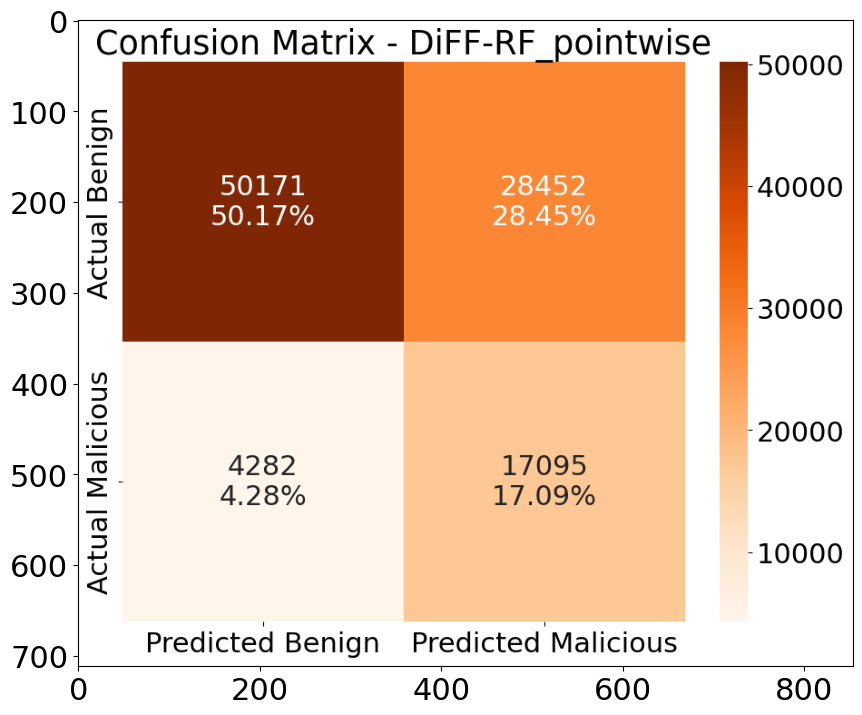

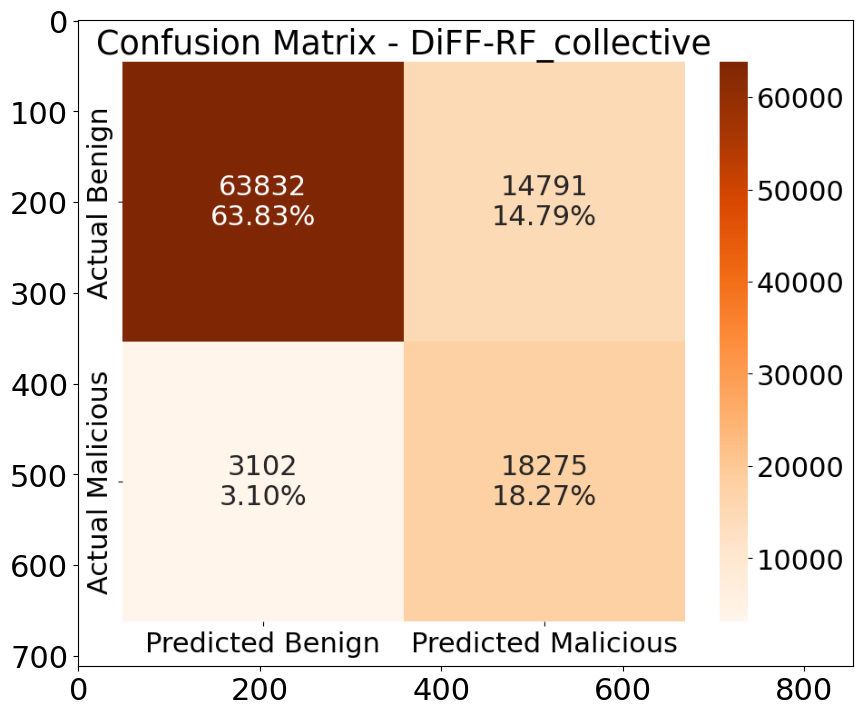

In [74]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test,default_hyperparameters={"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 0.1 })

#### Kitsune_Mirai

In [75]:
# Load the dataset
dataset_name = "Kitsune_Mirai"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))

In [76]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97297 entries, 0 to 97296
Data columns (total 53 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   feat1    97297 non-null  float64
 1   feat20   97297 non-null  float64
 2   feat21   97297 non-null  float64
 3   feat22   97297 non-null  float64
 4   feat23   97297 non-null  float64
 5   feat24   97297 non-null  float64
 6   feat25   97297 non-null  float64
 7   feat28   97297 non-null  float64
 8   feat29   97297 non-null  float64
 9   feat30   97297 non-null  float64
 10  feat31   97297 non-null  float64
 11  feat37   97297 non-null  float64
 12  feat38   97297 non-null  float64
 13  feat41   97297 non-null  float64
 14  feat44   97297 non-null  float64
 15  feat45   97297 non-null  float64
 16  feat48   97297 non-null  float64
 17  feat51   97297 non-null  float64
 18  feat52   97297 non-null  float64
 19  feat55   97297 non-null  float64
 20  feat57   97297 non-null  float64
 21  feat58   972


Dataset: Kitsune_Mirai
Test set information:
  Total instances: 100000
  Positive instances (anomalies): 75676 (75.68%)
  Negative instances (normal): 24324 (24.32%)
Feature information:
  Number of features: 53
  Feature names: feat1, feat20, feat21, feat22, feat23...
Training set information:
  Original size: 97297 instances
  Used size: 30000 instances (30.8% of original)
Hyperparameters file not found for Kitsune_Mirai. Using default parameters.
Hyperparameters: {'sample_size': 7499, 'n_trees': 128, 'alpha': 0.01}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.150674, Collective: -0.344484

Test Set Results:
Pointwise detection metrics:
  auc: 0.9414
  ap: 0.9715
  acc: 0.9115
  tpr: 0.8831
  fpr: 0.0003
  precision: 0.9999
  f1-score: 0.9379

Collective detection metrics:
  auc: 0.9427
  ap: 0.9721
  acc: 0.9133
  tpr: 0.8854
  fpr: 0.0000
  precision: 1.0000
  f1-score: 0.9392
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_Mirai_20250329_181441/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_Mirai_20250329_181441/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_Mirai_20250329_181441


{'DiFF-RF': {'threshold_pointwise': -0.1506739540050661,
  'threshold_collective': -0.3444835771813153,
  'test_pointwise': {'auc': np.float64(0.9414095739634323),
   'ap': np.float64(0.9714744396258637),
   'acc': np.float64(0.91147),
   'tpr': np.float64(0.8831069295417305),
   'fpr': np.float64(0.000287781614865976),
   'precision': np.float64(0.9998952675913042),
   'f1-score': np.float64(0.9378793513574201)},
  'test_collective': {'auc': np.float64(0.942695761100437),
   'ap': np.float64(0.9721194198282654),
   'acc': np.float64(0.91329),
   'tpr': np.float64(0.8854326338601406),
   'fpr': np.float64(4.1111659266568e-05),
   'precision': np.float64(0.9999850761860701),
   'f1-score': np.float64(0.9392289200535453)}}}

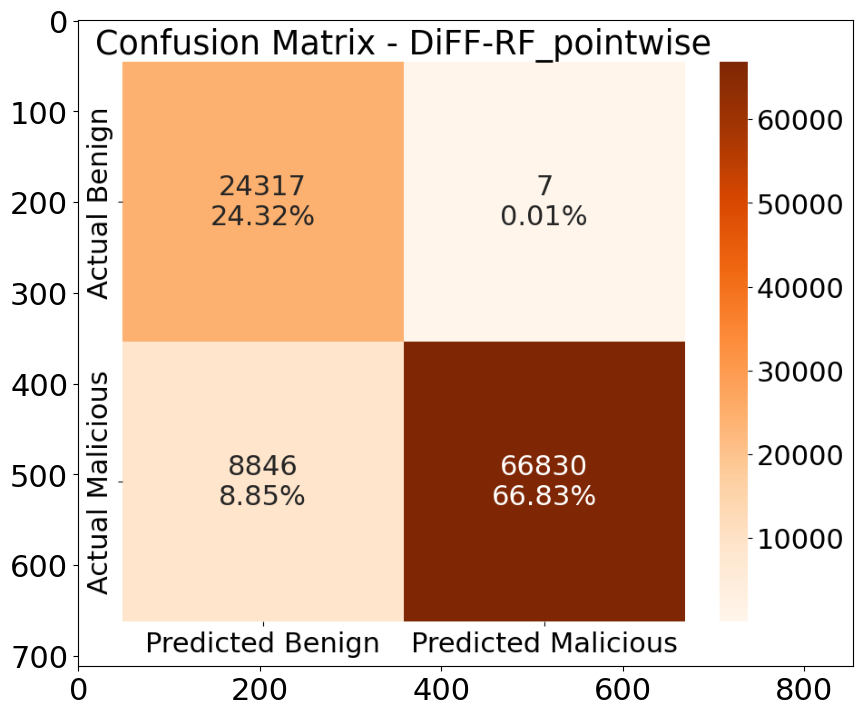

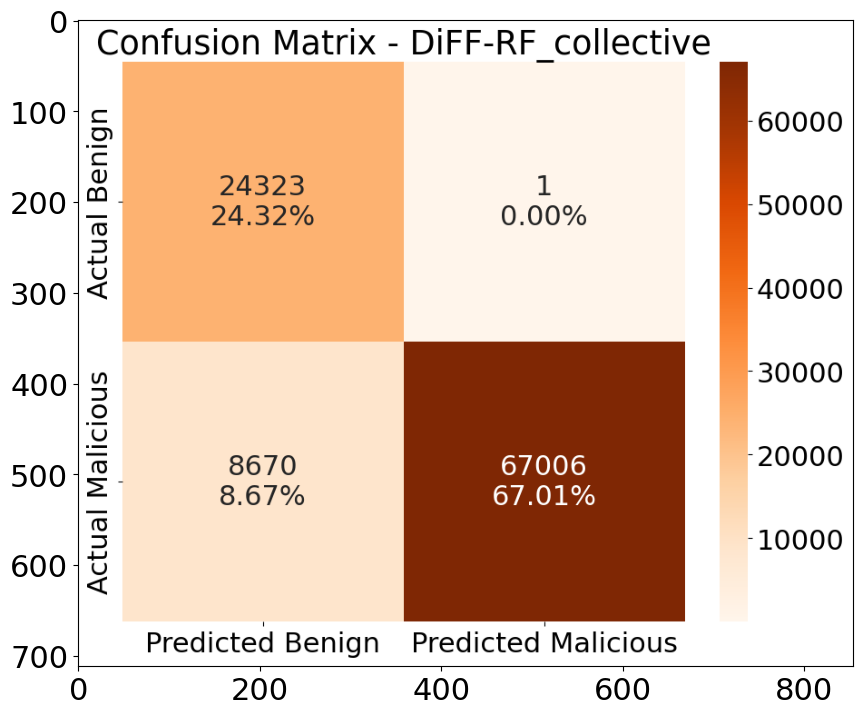

In [77]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test,default_hyperparameters={"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 0.01 })

#### Kitsune_OS_Scan

In [78]:
# Load the dataset
dataset_name = "Kitsune_OS_Scan"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))

In [79]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557324 entries, 0 to 557323
Data columns (total 24 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   feat64   557324 non-null  float64
 1   feat65   557324 non-null  float64
 2   feat72   557324 non-null  float64
 3   feat75   557324 non-null  float64
 4   feat78   557324 non-null  float64
 5   feat79   557324 non-null  float64
 6   feat80   557324 non-null  float64
 7   feat86   557324 non-null  float64
 8   feat87   557324 non-null  float64
 9   feat88   557324 non-null  float64
 10  feat93   557324 non-null  float64
 11  feat94   557324 non-null  float64
 12  feat100  557324 non-null  float64
 13  feat101  557324 non-null  float64
 14  feat102  557324 non-null  float64
 15  feat107  557324 non-null  float64
 16  feat108  557324 non-null  float64
 17  feat109  557324 non-null  float64
 18  feat110  557324 non-null  float64
 19  feat111  557324 non-null  float64
 20  feat112  557324 non-null  


Dataset: Kitsune_OS_Scan
Test set information:
  Total instances: 100000
  Positive instances (anomalies): 20000 (20.00%)
  Negative instances (normal): 80000 (80.00%)
Feature information:
  Number of features: 24
  Feature names: feat64, feat65, feat72, feat75, feat78...
Training set information:
  Original size: 557324 instances
  Used size: 30000 instances (5.4% of original)
Hyperparameters file not found for Kitsune_OS_Scan. Using default parameters.
Hyperparameters: {'sample_size': 7500, 'n_trees': 128, 'alpha': 0.01}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.882274, Collective: -0.195900

Test Set Results:
Pointwise detection metrics:
  auc: 0.9970
  ap: 0.9903
  acc: 0.9979
  tpr: 0.9957
  fpr: 0.0016
  precision: 0.9938
  f1-score: 0.9947

Collective detection metrics:
  auc: 0.9918
  ap: 0.9794
  acc: 0.9953
  tpr: 0.9860
  fpr: 0.0024
  precision: 0.9905
  f1-score: 0.9882
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_OS_Scan_20250329_181520/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_OS_Scan_20250329_181520/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_OS_Scan_20250329_181520


{'DiFF-RF': {'threshold_pointwise': -0.8822740064709971,
  'threshold_collective': -0.19589994380993092,
  'test_pointwise': {'auc': np.float64(0.9970437499999999),
   'ap': np.float64(0.9903089884219983),
   'acc': np.float64(0.99788),
   'tpr': np.float64(0.99565),
   'fpr': np.float64(0.0015625),
   'precision': np.float64(0.9937618524802875),
   'f1-score': np.float64(0.9947050302212899)},
  'test_collective': {'auc': np.float64(0.99181875),
   'ap': np.float64(0.9794397106836105),
   'acc': np.float64(0.99531),
   'tpr': np.float64(0.986),
   'fpr': np.float64(0.0023625),
   'precision': np.float64(0.9905068059671506),
   'f1-score': np.float64(0.9882482648024256)}}}

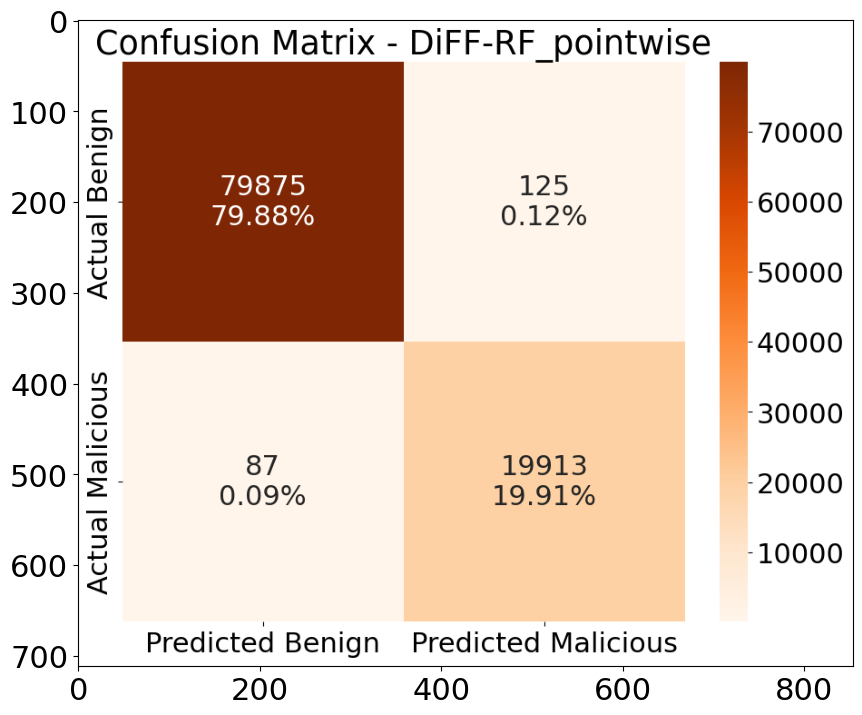

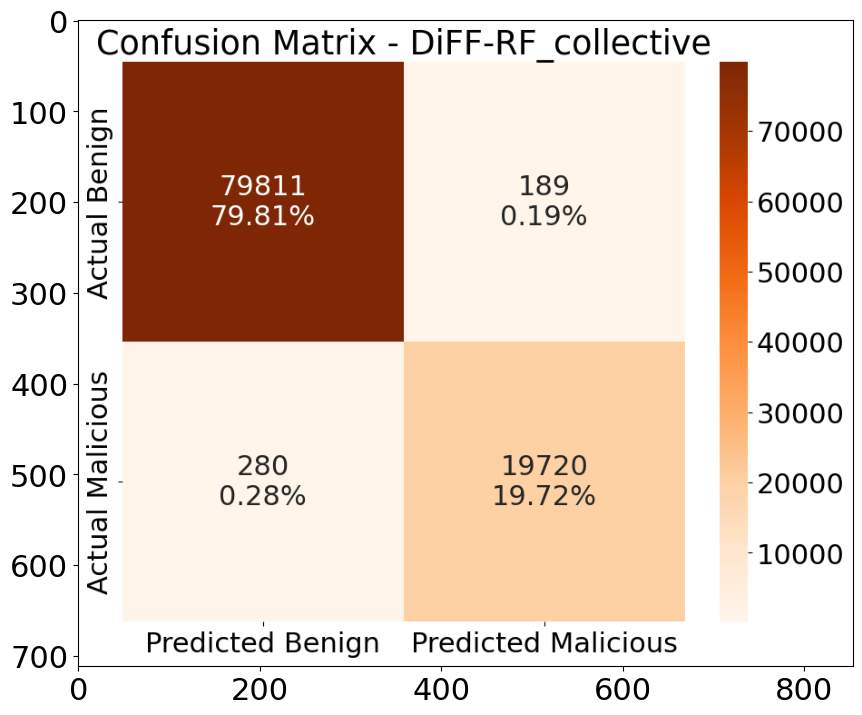

In [80]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test,default_hyperparameters={"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 0.01 })

#### Kitsune_SSL_Renegotiation

In [81]:
# Load the dataset
dataset_name = "Kitsune_SSL_Renegotiation"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))

In [82]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555252 entries, 0 to 555251
Data columns (total 36 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   feat36   555252 non-null  float64
 1   feat37   555252 non-null  float64
 2   feat43   555252 non-null  float64
 3   feat44   555252 non-null  float64
 4   feat50   555252 non-null  float64
 5   feat51   555252 non-null  float64
 6   feat57   555252 non-null  float64
 7   feat58   555252 non-null  float64
 8   feat60   555252 non-null  float64
 9   feat63   555252 non-null  float64
 10  feat64   555252 non-null  float64
 11  feat65   555252 non-null  float64
 12  feat74   555252 non-null  float64
 13  feat75   555252 non-null  float64
 14  feat77   555252 non-null  float64
 15  feat78   555252 non-null  float64
 16  feat79   555252 non-null  float64
 17  feat80   555252 non-null  float64
 18  feat86   555252 non-null  float64
 19  feat87   555252 non-null  float64
 20  feat88   555252 non-null  


Dataset: Kitsune_SSL_Renegotiation
Test set information:
  Total instances: 100000
  Positive instances (anomalies): 20000 (20.00%)
  Negative instances (normal): 80000 (80.00%)
Feature information:
  Number of features: 36
  Feature names: feat36, feat37, feat43, feat44, feat50...
Training set information:
  Original size: 555252 instances
  Used size: 30000 instances (5.4% of original)
Hyperparameters file not found for Kitsune_SSL_Renegotiation. Using default parameters.
Hyperparameters: {'sample_size': 7499, 'n_trees': 128, 'alpha': 0.1}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.823632, Collective: -0.670308

Test Set Results:
Pointwise detection metrics:
  auc: 0.9198
  ap: 0.6416
  acc: 0.8925
  tpr: 0.9655
  fpr: 0.1258
  precision: 0.6574
  f1-score: 0.7822

Collective detection metrics:
  auc: 0.9758
  ap: 0.8414
  acc: 0.9624
  tpr: 0.9981
  fpr: 0.0466
  precision: 0.8427
  f1-score: 0.9138
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_SSL_Renegotiation_20250329_181637/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_SSL_Renegotiation_20250329_181637/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_SSL_Renegotiation_20250329_181637


{'DiFF-RF': {'threshold_pointwise': -0.8236315191310992,
  'threshold_collective': -0.6703076146305291,
  'test_pointwise': {'auc': np.float64(0.9198437500000001),
   'ap': np.float64(0.6416350272386789),
   'acc': np.float64(0.89248),
   'tpr': np.float64(0.96545),
   'fpr': np.float64(0.1257625),
   'precision': np.float64(0.6574395641811372),
   'f1-score': np.float64(0.7822159205995545)},
  'test_collective': {'auc': np.float64(0.97575625),
   'ap': np.float64(0.8414485212545908),
   'acc': np.float64(0.96235),
   'tpr': np.float64(0.9981),
   'fpr': np.float64(0.0465875),
   'precision': np.float64(0.8426695934822069),
   'f1-score': np.float64(0.9138227013664768)}}}

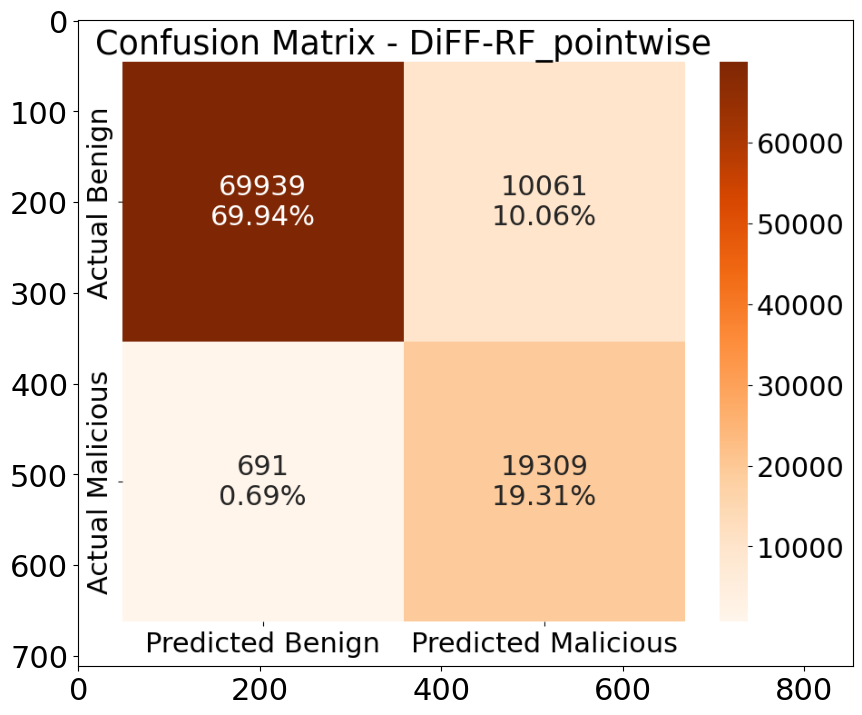

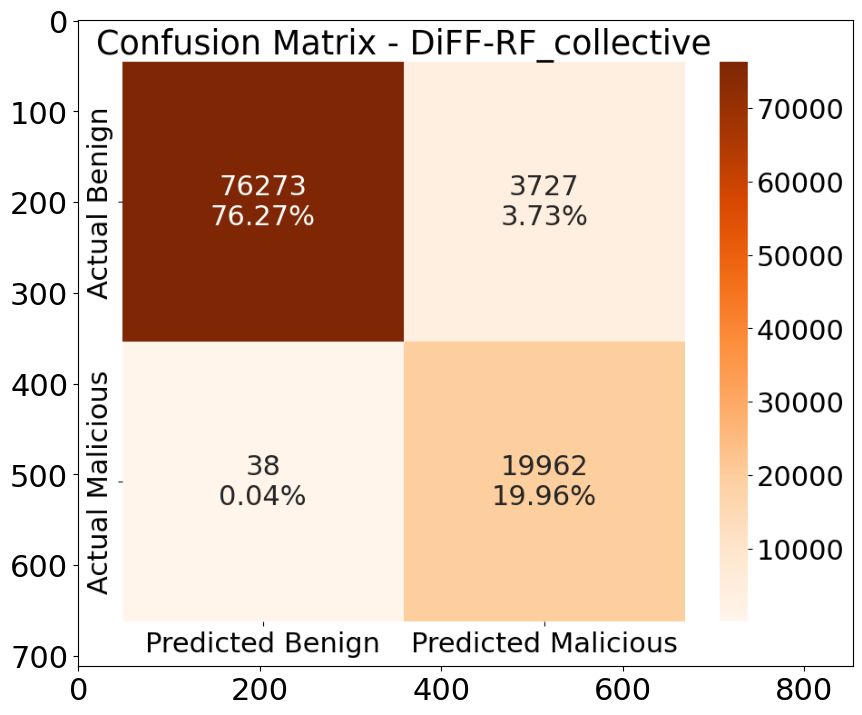

In [83]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test,default_hyperparameters={"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 0.1 })

#### Kitsune_Video_Injection

In [84]:
# Load the dataset
dataset_name = "Kitsune_Video_Injection"
x_train = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_train.csv"))
x_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATASET_DIRS, dataset_name, "y_test.csv"))

In [85]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555927 entries, 0 to 555926
Data columns (total 49 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   feat21   555927 non-null  float64
 1   feat24   555927 non-null  float64
 2   feat30   555927 non-null  float64
 3   feat36   555927 non-null  float64
 4   feat37   555927 non-null  float64
 5   feat39   555927 non-null  float64
 6   feat40   555927 non-null  float64
 7   feat42   555927 non-null  float64
 8   feat43   555927 non-null  float64
 9   feat44   555927 non-null  float64
 10  feat47   555927 non-null  float64
 11  feat48   555927 non-null  float64
 12  feat49   555927 non-null  float64
 13  feat50   555927 non-null  float64
 14  feat51   555927 non-null  float64
 15  feat56   555927 non-null  float64
 16  feat57   555927 non-null  float64
 17  feat58   555927 non-null  float64
 18  feat60   555927 non-null  float64
 19  feat61   555927 non-null  float64
 20  feat62   555927 non-null  


Dataset: Kitsune_Video_Injection
Test set information:
  Total instances: 100000
  Positive instances (anomalies): 20000 (20.00%)
  Negative instances (normal): 80000 (80.00%)
Feature information:
  Number of features: 49
  Feature names: feat21, feat24, feat30, feat36, feat37...
Training set information:
  Original size: 555927 instances
  Used size: 30000 instances (5.4% of original)
Hyperparameters file not found for Kitsune_Video_Injection. Using default parameters.
Hyperparameters: {'sample_size': 7499, 'n_trees': 128, 'alpha': 0.1}

Training DiFF-RF model...


Evaluating model on test data...
Optimal thresholds - Pointwise: -0.718750, Collective: -0.880580

Test Set Results:
Pointwise detection metrics:
  auc: 0.7527
  ap: 0.4409
  acc: 0.8392
  tpr: 0.6085
  fpr: 0.1031
  precision: 0.5959
  f1-score: 0.6021

Collective detection metrics:
  auc: 0.7927
  ap: 0.4461
  acc: 0.8146
  tpr: 0.7562
  fpr: 0.1708
  precision: 0.5254
  f1-score: 0.6200
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_Video_Injection_20250329_181739/DiFF-RF_pointwise_cm.png
Confusion matrix saved to /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_Video_Injection_20250329_181739/DiFF-RF_collective_cm.png

Results saved to: /mnt/F02E8D3A2E8CFABC/SharedDocs/DETEC-INVASAO/Projeto/DiFF-RF-Plus/tests/results/Kitsune_Video_Injection_20250329_181739


{'DiFF-RF': {'threshold_pointwise': -0.7187499301134226,
  'threshold_collective': -0.880580161589712,
  'test_pointwise': {'auc': np.float64(0.75265625),
   'ap': np.float64(0.4409068682664055),
   'acc': np.float64(0.83918),
   'tpr': np.float64(0.60845),
   'fpr': np.float64(0.1031375),
   'precision': np.float64(0.5959353574926542),
   'f1-score': np.float64(0.6021276595744681)},
  'test_collective': {'auc': np.float64(0.7927249999999999),
   'ap': np.float64(0.44606429539060055),
   'acc': np.float64(0.81461),
   'tpr': np.float64(0.75625),
   'fpr': np.float64(0.1708),
   'precision': np.float64(0.5253742748966619),
   'f1-score': np.float64(0.6200168070671668)}}}

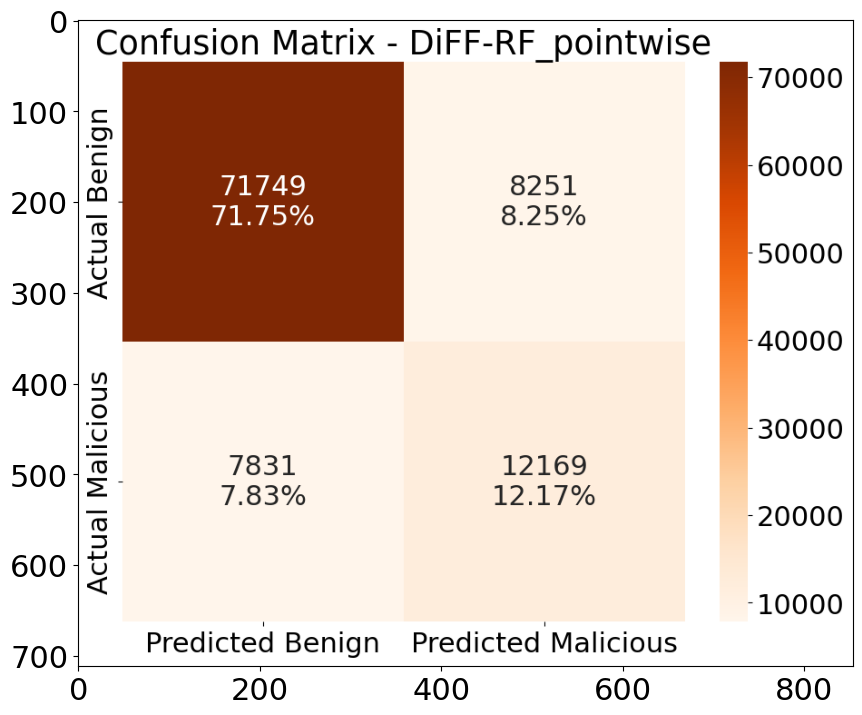

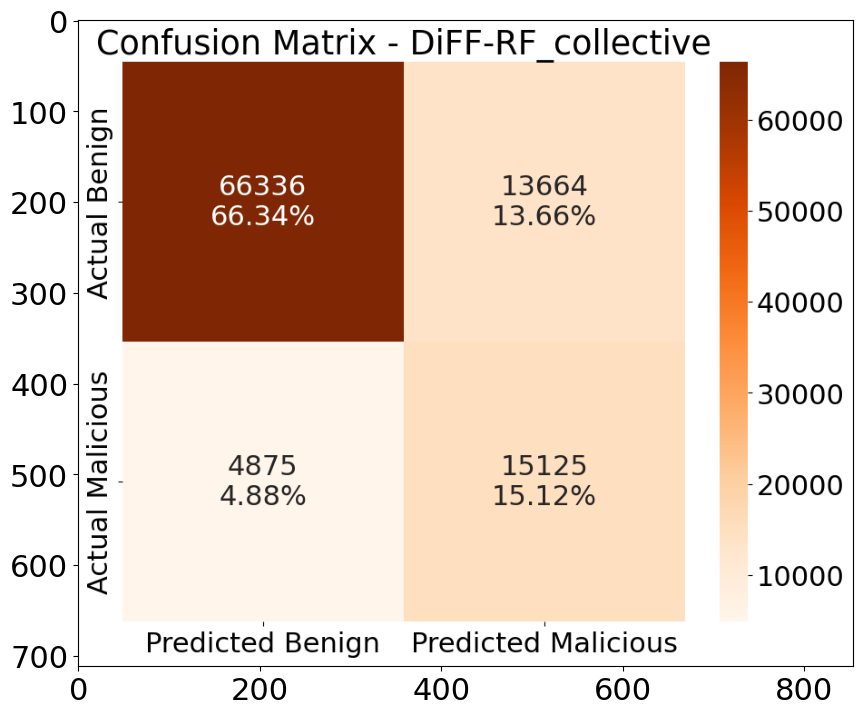

In [86]:
execute_on_dataset(dataset_name,
                   x_train, x_test,
                   y_test,default_hyperparameters={"sample_size": int(0.25 * len(x_train)),
                                      "n_trees": 128,
                                      "alpha": 0.1 })